# Complementarity analysys

In [126]:
import pandas as pd
import math
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
import os
import numpy as np
import seaborn as sns
from tqdm import tqdm
import warnings
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [128]:
SUBDIR = "human_mane_raw"
RUN = "run_2024-04-24_05-19-48"
# lst_methods = ["o3d", "hotmaps", "clustl", "smreg", "cbase", "seismic", "dndscv", "mutpan", "fml", "random"]
# lst_methods = ["o3d", "hotmaps", "clustl", "random"]

datasets = f"/workspace/projects/clustering_3d/o3d_analysys/datasets/"
input_path = f"{datasets}/input/cancer_202404"
cohort_df = pd.read_csv(f"{input_path}/cohorts.tsv", sep="\t")
intogen_output = f"{datasets}/output/cancer_202404/intogen_output"
genetable_path = f"/workspace/projects/clustering_3d/o3d_analysys/o3d_paper/data/results/{SUBDIR}/{RUN}.genetable.tsv"

genetable = pd.read_csv(genetable_path, sep="\t", dtype={1 : str, 2 : str, 3 : int})
genetable_subset = genetable[genetable["Cohort"].str.startswith("TCGA")]

In [129]:
### Clean plots
# !rm plots/bar_plots/all_methods/*.png
# !rm plots/bar_plots/clustering_methods/*.png
# !rm plots/number_detected/*.png
# !rm plots/venn_diagrams/all_methods/*.png
# !rm plots/venn_diagrams/clustering_methods/*.png

# Comparison No-MANE vs MANE

In [2]:
# Names and colors

colors_dic = {"Oncodrive3D" : "#ffad48", 
              "HotMAPS" : "#024b79", 
              "OncodriveCLUSTL" : "#43b7c2", 
              "smRegions" : "lightgray", 
              "CBaSE" : "lightgray", 
              "SEISMIC" : "lightgray", 
              "dNdScv" : "lightgray", 
              "MutPanning" : "lightgray", 
              "OncodriveFML" : "lightgray",
              "Random" : "pink"}

names_dic = {"o3d" : "Oncodrive3D", 
             "hotmaps" : "HotMAPS", 
             "clustl" : "OncodriveCLUSTL", 
             "smreg" : "smRegions", 
             "cbase" : "CBaSE", 
             "seismic" : "SEISMIC", 
             "dndscv" : "dNdScv", 
             "mutpan" : "MutPanning", 
             "fml" : "OncodriveFML",
             "random" : "Random"}

In [52]:
SUBDIR = "human_mane_raw"
RUN = "run_2024-04-24_05-19-48"
# lst_methods = ["o3d", "hotmaps", "clustl", "smreg", "cbase", "seismic", "dndscv", "mutpan", "fml", "random"]
# lst_methods = ["o3d", "hotmaps", "clustl", "random"]

datasets = f"/workspace/projects/clustering_3d/o3d_analysys/datasets/"
input_path = f"{datasets}/input/cancer_202404"
cohort_df = pd.read_csv(f"{input_path}/cohorts.tsv", sep="\t")
intogen_output = f"{datasets}/output/cancer_202404/intogen_output"
genetable_path = f"/workspace/projects/clustering_3d/o3d_analysys/analysys/FINAL_2024/data/results/{SUBDIR}/{RUN}.genetable.tsv"

genetable = pd.read_csv(genetable_path, sep="\t", dtype={1 : str, 2 : str, 3 : int})
genetable_noicgc = genetable[[not cohort.startswith("ICGC") for cohort in genetable["Cohort"]]].reset_index(drop=True)
genetable_subset = genetable[genetable["Cohort"].str.startswith("TCGA")]

In [50]:
SUBDIR = "human_raw"
RUN = "run_2024-06-20_15-43-10"
# lst_methods = ["o3d", "hotmaps", "clustl", "smreg", "cbase", "seismic", "dndscv", "mutpan", "fml", "random"]
# lst_methods = ["o3d", "hotmaps", "clustl", "random"]

datasets = f"/workspace/projects/clustering_3d/o3d_analysys/datasets/"
input_path = f"{datasets}/input/cancer_202404"
cohort_df = pd.read_csv(f"{input_path}/cohorts.tsv", sep="\t")
intogen_output = f"{datasets}/output/cancer_202404/intogen_output"
genetable_path = f"/workspace/projects/clustering_3d/o3d_analysys/analysys/FINAL_2024/data/results/{SUBDIR}/{RUN}.genetable.tsv"

genetable = pd.read_csv(genetable_path, sep="\t", dtype={1 : str, 2 : str, 3 : int})
genetable_noicgc = genetable[[not cohort.startswith("ICGC") for cohort in genetable["Cohort"]]].reset_index(drop=True)
genetable_subset = genetable[genetable["Cohort"].str.startswith("TCGA")]

In [272]:
gene_cohorts_old = genetable_subset_old[(genetable_subset_old["CGC"] == 1) & (genetable_subset_old["o3d_qval"] < 0.01)].apply(lambda x: f"{x['Gene']}-{x['Cohort']}", axis=1)
gene_cohorts_mane = genetable_mane_subset[(genetable_mane_subset["CGC"] == 1) & (genetable_mane_subset["o3d_qval"] < 0.01)].apply(lambda x: f"{x['Gene']}-{x['Cohort']}", axis=1)
gene_cohorts_mane_vep = genetable_mane_vep_subset[(genetable_mane_vep_subset["CGC"] == 1) & (genetable_mane_vep_subset["o3d_qval"] < 0.01)].apply(lambda x: f"{x['Gene']}-{x['Cohort']}", axis=1)

In [226]:
len(gene_cohorts_old)

150

In [273]:
len(gene_cohorts_mane)

142

In [274]:
len(gene_cohorts_mane_vep)

142

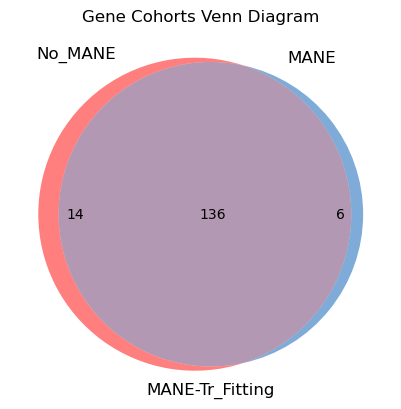

In [229]:
import pandas as pd
import os
import numpy as np
from matplotlib_venn import venn3, venn2

venn = venn3([set(gene_cohorts_old) , set(gene_cohorts_mane), set(gene_cohorts_mane_vep)], ('No_MANE', 'MANE', 'MANE-Tr_Fitting'), alpha=0.5)

# Display the plot
plt.title("Gene Cohorts Venn Diagram")
plt.show()

In [230]:
genetable_subset_old[(genetable_subset_old["Cohort"] == "TCGA_WXS_HNSC") & (genetable_subset_old["Gene"] == "MAPK1")]

Gene Uniprot_ID o3d_status  CGC  Fish  o3d_rank  o3d_pval  o3d_qval  \
5068052  MAPK1     P28482  Processed    1     0       5.0       0.0       0.0   

         cbase_rank  cbase_pval  ...  clustl_pval  clustl_qval  fml_rank  \
5068052       120.0    0.001167  ...     0.000012     0.005914      13.0   

         fml_pval  fml_qval  smreg_rank  smreg_pval  smreg_qval  Cancer  \
5068052  0.000007  0.006507         NaN         NaN         NaN    HNSC   

                Cohort  
5068052  TCGA_WXS_HNSC  

[1 rows x 31 columns]

In [231]:
genetable_subset[(genetable_subset["Cohort"] == "TCGA_WXS_HNSC") & (genetable_subset["Gene"] == "MAPK1")]

Gene Uniprot_ID o3d_status  CGC  Fish  o3d_rank  o3d_pval  o3d_qval  \
4449545  MAPK1     P28482  Processed    1     0       8.0    0.0001  0.119417   

         cbase_rank  cbase_pval  ...  clustl_pval  clustl_qval  fml_rank  \
4449545       121.0    0.001063  ...     0.000012     0.005913      13.0   

         fml_pval  fml_qval  smreg_rank  smreg_pval  smreg_qval  Cancer  \
4449545  0.000006   0.00551         NaN         NaN         NaN    HNSC   

                Cohort  
4449545  TCGA_WXS_HNSC  

[1 rows x 31 columns]

In [232]:
genetable_subset_old[(genetable_subset_old["Cohort"] == "TCGA_WXS_HNSC") & (genetable_subset_old["Gene"] == "KIF5B")]

Gene Uniprot_ID o3d_status  CGC  Fish  o3d_rank  o3d_pval  o3d_qval  \
5068055  KIF5B     P33176  Processed    1     0       8.0       0.0       0.0   

         cbase_rank  cbase_pval  ...  clustl_pval  clustl_qval  fml_rank  \
5068055      8496.0    0.469703  ...      0.05807     0.355626   13484.0   

         fml_pval  fml_qval  smreg_rank  smreg_pval  smreg_qval  Cancer  \
5068055   0.84051  0.995192        22.0    0.000625     0.24332    HNSC   

                Cohort  
5068055  TCGA_WXS_HNSC  

[1 rows x 31 columns]

In [233]:
genetable_subset[(genetable_subset["Cohort"] == "TCGA_WXS_HNSC") & (genetable_subset["Gene"] == "KIF5B")]

Gene Uniprot_ID o3d_status  CGC  Fish  o3d_rank  o3d_pval  o3d_qval  \
4449547  KIF5B     P33176  Processed    1     0      10.0    0.0001  0.119417   

         cbase_rank  cbase_pval  ...  clustl_pval  clustl_qval  fml_rank  \
4449547      8496.0    0.468177  ...     0.058005     0.356015   13277.0   

         fml_pval  fml_qval  smreg_rank  smreg_pval  smreg_qval  Cancer  \
4449547   0.83946  0.997114        23.0    0.000604     0.22532    HNSC   

                Cohort  
4449547  TCGA_WXS_HNSC  

[1 rows x 31 columns]

In [234]:
[c for c in gene_cohorts_old if c not in gene_cohorts.values]

['CDKN2A-TCGA_WXS_BLCA',
 'PIK3CA-TCGA_WXS_CCRCC',
 'CTCF-TCGA_WXS_BRCA',
 'IDH1-TCGA_WXS_CHOL',
 'MAPK1-TCGA_WXS_HNSC',
 'KIF5B-TCGA_WXS_HNSC',
 'EP300-TCGA_WXS_HNSC',
 'RGS7-TCGA_WXS_MEL',
 'CRNKL1-TCGA_WXS_MEL',
 'NFE2L2-TCGA_WXS_LUAD',
 'KEAP1-TCGA_WXS_LUAD',
 'MLLT1-TCGA_WXS_UCEC',
 'PIK3CA-TCGA_WXS_UCS']

In [237]:
[c for c in gene_cohorts_mane_vep if c not in gene_cohorts_old.values]

['PPP6C-TCGA_WXS_MEL',
 'TP53-TCGA_WXS_MEL',
 'RAC1-TCGA_WXS_HNSC',
 'HRAS-TCGA_WXS_LUSC',
 'CDH1-TCGA_WXS_STAD',
 'CTNNB1-TCGA_WXS_PRAD']

In [264]:
gene_cohorts_old = genetable_old[(genetable_old["CGC"] == 1) & (genetable_old["o3d_qval"] < 0.01)].apply(lambda x: f"{x['Gene']}-{x['Cohort']}", axis=1)
gene_cohorts_mane = genetable_mane[(genetable_mane["CGC"] == 1) & (genetable_mane["o3d_qval"] < 0.01)].apply(lambda x: f"{x['Gene']}-{x['Cohort']}", axis=1)
gene_cohorts_mane_vep = genetable_mane_vep[(genetable_mane_vep["CGC"] == 1) & (genetable_mane_vep["o3d_qval"] < 0.01)].apply(lambda x: f"{x['Gene']}-{x['Cohort']}", axis=1)

In [265]:
len(gene_cohorts_old)

522

In [268]:
len(gene_cohorts_mane)

510

In [267]:
len(gene_cohorts_mane_vep)

514

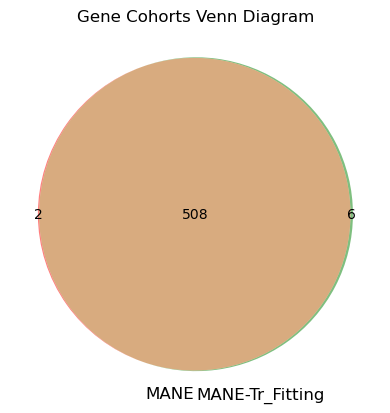

In [258]:
venn = venn2([set(gene_cohorts_mane) , set(gene_cohorts_mane_vep)], ('MANE', 'MANE-Tr_Fitting'), alpha=0.5)

# Display the plot
plt.title("Gene Cohorts Venn Diagram")
plt.show()

In [259]:
[c for c in gene_cohorts_mane if c not in gene_cohorts_mane_vep.values]

['FGFR3-HARTWIG_WGS_BLADDER_2023', 'TP53-HARTWIG_WGS_SKIN_2023']

In [260]:
[c for c in gene_cohorts_mane_vep if c not in gene_cohorts_mane.values]

['KDM6A-CBIOP_WXS_PRAD_MSKCC_DCFI_2018_MET',
 'SGK1-OTHER_WGS_DLBCL_NATCOM_2018',
 'RUNX1-OTHER_WXS_AML_PRY_BEAT_2018',
 'JAK2-OTHER_WXS_AML_PRY_BEAT_2018',
 'CIC-TCGA_WXS_LGGNOS',
 'CRNKL1-HARTWIG_WGS_SKCM_2023']

In [246]:
genetable_mane[(genetable_mane["Cohort"] == "CBIOP_WXS_PRAD_MSKCC_DCFI_2018_MET") & (genetable_mane["Gene"] == "KDM6A")]

Gene Uniprot_ID   o3d_status  CGC  Fish  o3d_rank  o3d_pval  \
1542583  KDM6A     O15550  WT_mismatch    1     0    2255.0       NaN   

         o3d_qval  cbase_rank  cbase_pval  ...  clustl_pval  clustl_qval  \
1542583       NaN       434.0    0.018345  ...          NaN          NaN   

         fml_rank  fml_pval  fml_qval  smreg_rank  smreg_pval  smreg_qval  \
1542583       NaN       NaN       NaN         NaN         NaN         NaN   

         Cancer                              Cohort  
1542583    PRAD  CBIOP_WXS_PRAD_MSKCC_DCFI_2018_MET  

[1 rows x 31 columns]

In [248]:
genetable_mane[(genetable_mane["Cohort"] == "OTHER_WGS_DLBCL_NATCOM_2018") & (genetable_mane["Gene"] == "SGK1")]

Gene Uniprot_ID   o3d_status  CGC  Fish  o3d_rank  o3d_pval  \
2526890  SGK1     O00141  WT_mismatch    1     0    1702.0       NaN   

         o3d_qval  cbase_rank  cbase_pval  ...  clustl_pval  clustl_qval  \
2526890       NaN       340.0    0.008703  ...     0.343431     0.382377   

         fml_rank  fml_pval  fml_qval  smreg_rank  smreg_pval  smreg_qval  \
2526890     167.0   0.01521  0.486903         NaN         NaN         NaN   

           Cancer                       Cohort  
2526890  DLBCLNOS  OTHER_WGS_DLBCL_NATCOM_2018  

[1 rows x 31 columns]

In [252]:
genetable_mane[(genetable_mane["Cohort"] == "OTHER_WGS_DLBCL_NATCOM_2018") & (genetable_mane["Gene"] == "RUNX1")]

Gene Uniprot_ID o3d_status  CGC  Fish  o3d_rank  o3d_pval  o3d_qval  \
2535905  RUNX1        NaN        NaN    1     0       NaN       NaN       NaN   

         cbase_rank  cbase_pval  ...  clustl_pval  clustl_qval  fml_rank  \
2535905     10056.0         1.0  ...          NaN          NaN    5374.0   

         fml_pval  fml_qval  smreg_rank  smreg_pval  smreg_qval    Cancer  \
2535905   0.69909       NaN         NaN         NaN         NaN  DLBCLNOS   

                              Cohort  
2535905  OTHER_WGS_DLBCL_NATCOM_2018  

[1 rows x 31 columns]

In [256]:
genetable_mane_vep[(genetable_mane_vep["Cohort"] == "OTHER_WGS_DLBCL_NATCOM_2018") & (genetable_mane_vep["Gene"] == "RUNX1")]

Gene Uniprot_ID o3d_status  CGC  Fish  o3d_rank  o3d_pval  o3d_qval  \
2536042  RUNX1        NaN        NaN    1     0       NaN       NaN       NaN   

         cbase_rank  cbase_pval  ...  clustl_pval  clustl_qval  fml_rank  \
2536042     10056.0         1.0  ...          NaN          NaN    5374.0   

         fml_pval  fml_qval  smreg_rank  smreg_pval  smreg_qval    Cancer  \
2536042   0.69909       NaN         NaN         NaN         NaN  DLBCLNOS   

                              Cohort  
2536042  OTHER_WGS_DLBCL_NATCOM_2018  

[1 rows x 31 columns]

In [262]:
genetable_mane[(genetable_mane["Cohort"] == "TCGA_WXS_LGGNOS") & (genetable_mane["Gene"] == "CIC")]

Gene Uniprot_ID            o3d_status  CGC  Fish  o3d_rank  o3d_pval  \
4407027  CIC     Q96RK0  Mut_not_in_structure    1     0     635.0       NaN   

         o3d_qval  cbase_rank  cbase_pval  ...  clustl_pval  clustl_qval  \
4407027       NaN         4.0         0.0  ...     0.001713     0.067081   

         fml_rank  fml_pval  fml_qval  smreg_rank    smreg_pval    smreg_qval  \
4407027       3.0  0.000001  0.000618         1.0  3.564153e-60  2.723013e-57   

         Cancer           Cohort  
4407027  LGGNOS  TCGA_WXS_LGGNOS  

[1 rows x 31 columns]

In [263]:
genetable_mane_vep[(genetable_mane_vep["Cohort"] == "TCGA_WXS_LGGNOS") & (genetable_mane_vep["Gene"] == "CIC")]

Gene Uniprot_ID o3d_status  CGC  Fish  o3d_rank  o3d_pval  o3d_qval  \
4406623  CIC     Q96RK0  Processed    1     0       2.0       0.0       0.0   

         cbase_rank  cbase_pval  ...  clustl_pval  clustl_qval  fml_rank  \
4406623         4.0         0.0  ...     0.001713     0.067081       3.0   

         fml_pval  fml_qval  smreg_rank    smreg_pval    smreg_qval  Cancer  \
4406623  0.000001  0.000618         1.0  3.564153e-60  2.723013e-57  LGGNOS   

                  Cohort  
4406623  TCGA_WXS_LGGNOS  

[1 rows x 31 columns]

# Venn diagram

## Functions

In [130]:
def get_gene_cohort(x, gene_only=False):
    
    if gene_only:
        return x['Gene']
    else:
        return f"{x['Gene']}-{x['Cohort']}"
    

def get_hits_for_venn(genetable_df, lst_methods, unique=False):
    
    dict_hits = {}
    dict_cgc_hits = {}
    dict_fish_hits = {}
    dict_unknown_hits = {}
    for method in lst_methods:
        method_hits = genetable_df[(genetable_df[f"{method}_qval"] < 0.01)]
        dict_hits[method] = set(list(method_hits.apply(lambda x: get_gene_cohort(x, gene_only=unique), axis=1).values))
        dict_cgc_hits[method] = set(list(method_hits[method_hits["CGC"] == 1].apply(lambda x: get_gene_cohort(x, gene_only=unique), axis=1).values))
        dict_fish_hits[method] = set(list(method_hits[method_hits["Fish"] == 1].apply(lambda x: get_gene_cohort(x, gene_only=unique), axis=1).values))
        dict_unknown_hits[method] = set(list(method_hits[(method_hits["CGC"] == 0) & (method_hits["Fish"] == 0)].apply(lambda x: get_gene_cohort(x, gene_only=unique), axis=1).values))

    return dict_hits, dict_cgc_hits, dict_fish_hits, dict_unknown_hits


def plot_venn3(set1, set2, set3,
               labels, 
               colors,
               figsize_circles=(8, 6),
               figsize_venn=(4, 7),
               title=None,
               circle_size=None,
               alpha=0.4,
               clustering_groups=False,
               save=False,
               filename="venn.png"):
    
    circles_size = len(set1), len(set2), 0, len(set3), 0, 0, 0
    
    # Circles
    
    plt.figure(figsize=figsize_circles) 
    v = venn3(subsets=circles_size, 
              set_labels=labels,
              set_colors=colors,
              alpha=alpha)
    v.get_label_by_id('100').set_fontsize(14)
    v.get_label_by_id('010').set_fontsize(14)
    v.get_label_by_id('001').set_fontsize(14)

    venn3_circles(subsets=circles_size, lw=0.6)
    plt.title(title, fontsize=17)
    for text in v.set_labels:
        text.set_fontsize(14)
    if save:
        plt.savefig(f"{filename.split('.')[0]}_pt1.{filename.split('.')[1]}", 
                    dpi=300, bbox_inches='tight')
    plt.show()

    # Venn diagram

    plt.figure(figsize=figsize_venn) 
    v = venn3([set1, set2, set3], 
               set_labels=labels,
               set_colors=colors,
               alpha=alpha)
    
    a = v.get_label_by_id('100').get_text()
    b = v.get_label_by_id('010').get_text()
    c = v.get_label_by_id('001').get_text()

    dict_circles = {"a" : "100",
                    "b" : "010",
                    "ab" : "110",
                    "c" : "001",
                    "ac" : "101",
                    "bc" : "011",
                    "abc" : "111"}
    
    circles_size = []
    for loc in dict_circles.values():
        circle = v.get_label_by_id(loc)
        if circle:
            circles_size.append(int(circle.get_text()))
        else:
            circles_size.append(0)
    
    try:
        if clustering_groups:
            v.get_patch_by_id("110").set_color("#cec5ab")
            v.get_patch_by_id("111").set_color("green")
            v.get_patch_by_id("011").set_color("#2d2375")
            v.get_patch_by_id("101").set_color("#f2e963")
        else:
            v.get_patch_by_id("110").set_color('#5247a6')
            v.get_patch_by_id("111").set_color("green")
            v.get_patch_by_id("011").set_color('#5247a6')
            v.get_patch_by_id("101").set_color('#ffad48')
    except:
            pass

    venn3_circles(subsets=circles_size, lw=0.6)
    for text in v.set_labels:
        try:
            text.set_fontsize(14)
        except Exception as e:
            #warnings.warn(f"Error text s1: {e}")
            pass
    for text in v.subset_labels:
        try:
            text.set_fontsize(14)
        except Exception as e:
            #warnings.warn(f"Error text s2: {e}")
            pass
    if save:
        plt.savefig(f"{filename.split('.')[0]}_pt2.{filename.split('.')[1]}", 
            dpi=300, bbox_inches='tight')
    plt.show()

## TCGA

### All methods

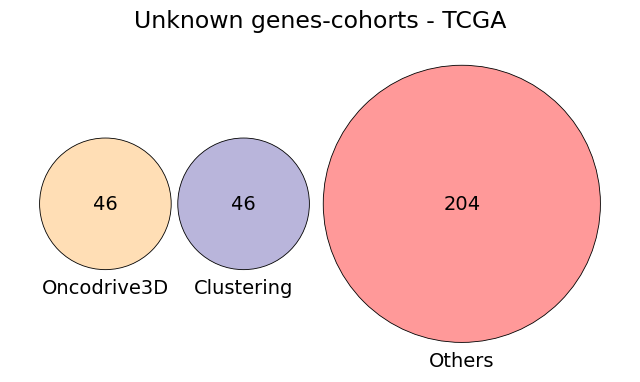

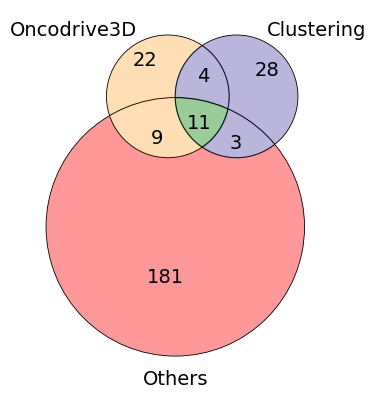

In [131]:
lst_methods = ["o3d", "hotmaps", "clustl", "smreg", "cbase", "dndscv", "mutpan", "fml"]

#====================
# Unkown genes - TCGA
#====================

dict_hits, dict_cgc_hits, dict_fish_hits, dict_unknown_hits = get_hits_for_venn(genetable_subset, lst_methods, unique=False)

set1 = dict_unknown_hits["o3d"]
set2 = dict_unknown_hits["hotmaps"] | dict_unknown_hits["clustl"]
set3 = dict_unknown_hits["smreg"] | dict_unknown_hits["dndscv"] | dict_unknown_hits["mutpan"] | dict_unknown_hits["fml"] | dict_unknown_hits["cbase"] #| dict_unknown_hits["seismic"]

labels = 'Oncodrive3D', 'Clustering', "Others"
colors = colors_dic["Oncodrive3D"], '#5247a6', 'red'

plot_venn3(set1, set2, set3,
           labels, colors, 
           title="Unknown genes-cohorts - TCGA",
           save=True,
           filename="plots/venn_diagrams/all_methods/unknown_venn_tcga_all_methods.png")

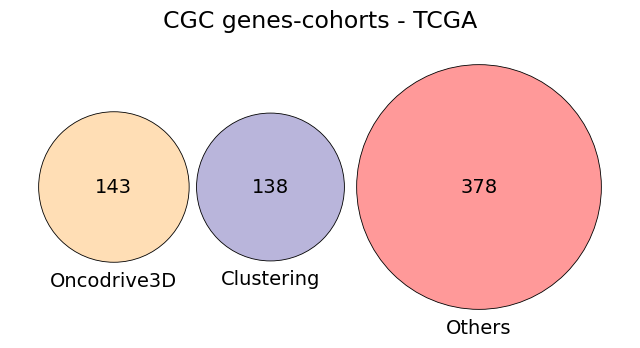

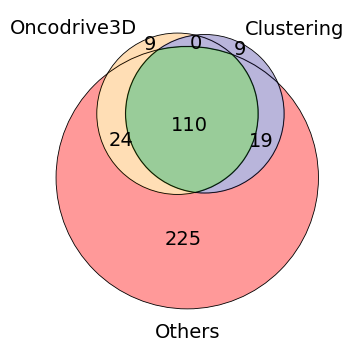

In [132]:
#==========
# CGC genes
#==========

set1 = dict_cgc_hits["o3d"]
set2 = dict_cgc_hits["hotmaps"] | dict_cgc_hits["clustl"]
#set3 = dict_cgc_hits["smreg"] | dict_cgc_hits["dndscv"] | dict_cgc_hits["mutpan"] | dict_cgc_hits["fml"]
set3 = dict_cgc_hits["smreg"] | dict_cgc_hits["dndscv"] | dict_cgc_hits["mutpan"] | dict_cgc_hits["fml"] | dict_cgc_hits["cbase"] #| dict_cgc_hits["seismic"]

plot_venn3(set1, set2, set3,
           labels, colors, 
           title="CGC genes-cohorts - TCGA",
           save=True,
           filename="plots/venn_diagrams/all_methods/cgc_venn_tcga_all_methods.png")

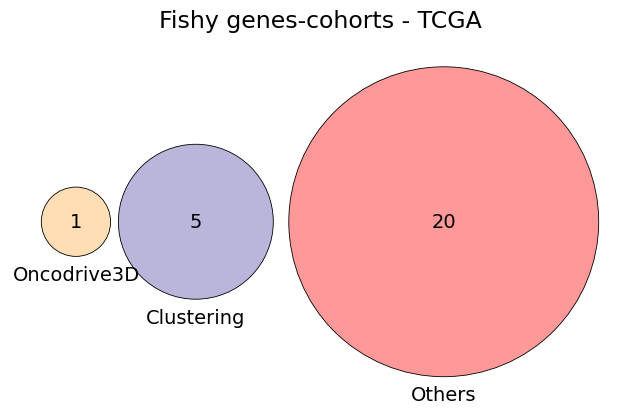

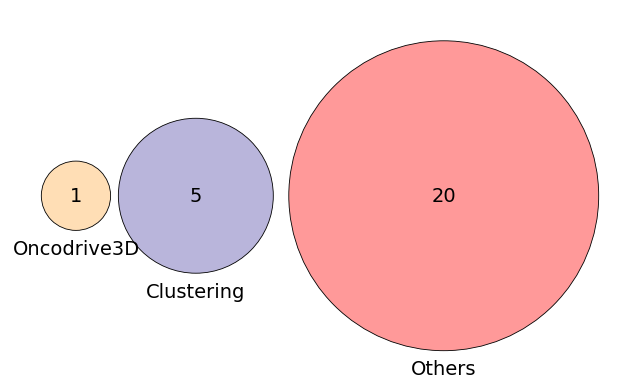

In [133]:
#==========
# Fish genes
#==========

set1 = dict_fish_hits["o3d"]
set2 = dict_fish_hits["hotmaps"] | dict_fish_hits["clustl"]
#set3 = dict_fish_hits["smreg"] | dict_fish_hits["dndscv"] | dict_fish_hits["mutpan"] | dict_fish_hits["fml"]
set3 = dict_fish_hits["smreg"] | dict_fish_hits["dndscv"] | dict_fish_hits["mutpan"] | dict_fish_hits["fml"] | dict_fish_hits["cbase"] #| dict_fish_hits["seismic"]

plot_venn3(set1, set2, set3,
           labels, colors, 
           figsize_venn=(8, 9),
           title="Fishy genes-cohorts - TCGA",
           save=True,
           filename="plots/venn_diagrams/all_methods/fishy_venn_tcga_all_methods.png")

#### Fixing fontsize

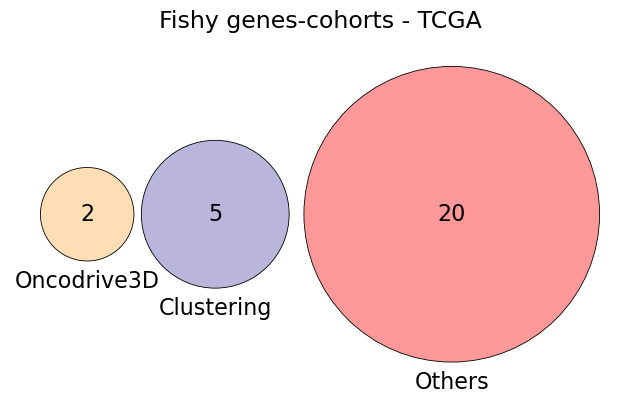

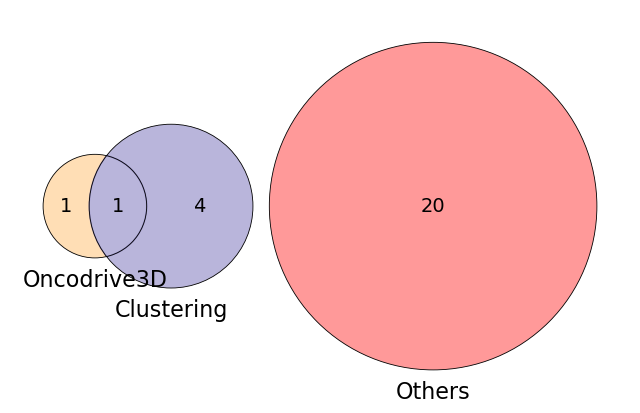

In [37]:
### Trying to fix the fontsize

def plot_venn3(set1, set2, set3,
               labels, 
               colors,
               figsize_circles=(8, 6),
               figsize_venn=(4, 7),
               title=None,
               circle_size=None,
               alpha=0.4,
               clustering_groups=False,
               save=False,
               filename="venn.png"):
    
    circles_size = len(set1), len(set2), 0, len(set3), 0, 0, 0
    
    # Circles
    
    plt.figure(figsize=figsize_circles) 
    v = venn3(subsets=circles_size, 
              set_labels=labels,
              set_colors=colors,
              alpha=alpha)
    v.get_label_by_id('100').set_fontsize(16)
    v.get_label_by_id('010').set_fontsize(16)
    v.get_label_by_id('001').set_fontsize(16)

    venn3_circles(subsets=circles_size, lw=0.6)
    plt.title(title, fontsize=17)
    for text in v.set_labels:
        text.set_fontsize(16)
    if save:
        plt.savefig(f"{filename.split('.')[0]}_pt1.{filename.split('.')[1]}", 
                    dpi=300, bbox_inches='tight')
    plt.show()

    # Venn diagram

    plt.figure(figsize=figsize_venn) 
    v = venn3([set1, set2, set3], 
               set_labels=labels,
               set_colors=colors,
               alpha=alpha)
    
    a = v.get_label_by_id('100').get_text()
    b = v.get_label_by_id('010').get_text()
    c = v.get_label_by_id('001').get_text()

    dict_circles = {"a" : "100",
                    "b" : "010",
                    "ab" : "110",
                    "c" : "001",
                    "ac" : "101",
                    "bc" : "011",
                    "abc" : "111"}
    
    circles_size = []
    for loc in dict_circles.values():
        circle = v.get_label_by_id(loc)
        if circle:
            circles_size.append(int(circle.get_text()))
        else:
            circles_size.append(0)
    
    try:
        if clustering_groups:
            v.get_patch_by_id("110").set_color("#cec5ab")
            v.get_patch_by_id("111").set_color("green")
            v.get_patch_by_id("011").set_color("#2d2375")
            v.get_patch_by_id("101").set_color("#f2e963")
        else:
            v.get_patch_by_id("110").set_color('#5247a6')
            v.get_patch_by_id("111").set_color("green")
            v.get_patch_by_id("011").set_color('#5247a6')
            v.get_patch_by_id("101").set_color('#ffad48')
    except:
            pass

    venn3_circles(subsets=circles_size, lw=0.6)
    for text in v.set_labels:
        try:
            text.set_fontsize(16)
        except Exception as e:
            #warnings.warn(f"Error text s1: {e}")
            pass
    for text in v.subset_labels:
        try:
            text.set_fontsize(14)
        except Exception as e:
            #warnings.warn(f"Error text s2: {e}")
            pass
    if save:
        plt.savefig(f"{filename.split('.')[0]}_pt2.{filename.split('.')[1]}", 
                    dpi=300, bbox_inches='tight')
    plt.show()



#==========
# Fish genes
#==========

set1 = dict_fish_hits["o3d"]
set2 = dict_fish_hits["hotmaps"] | dict_fish_hits["clustl"]
#set3 = dict_fish_hits["smreg"] | dict_fish_hits["dndscv"] | dict_fish_hits["mutpan"] | dict_fish_hits["fml"]
set3 = dict_fish_hits["smreg"] | dict_fish_hits["dndscv"] | dict_fish_hits["mutpan"] | dict_fish_hits["fml"] | dict_fish_hits["cbase"] #| dict_fish_hits["seismic"]

plot_venn3(set1, set2, set3,
           labels, colors, 
           figsize_venn=(8, 9),
           title="Fishy genes-cohorts - TCGA",
           save=True,
           filename="plots/venn_diagrams/all_methods/fishy_venn_tcga_all_methods.png")

#### Unique genes

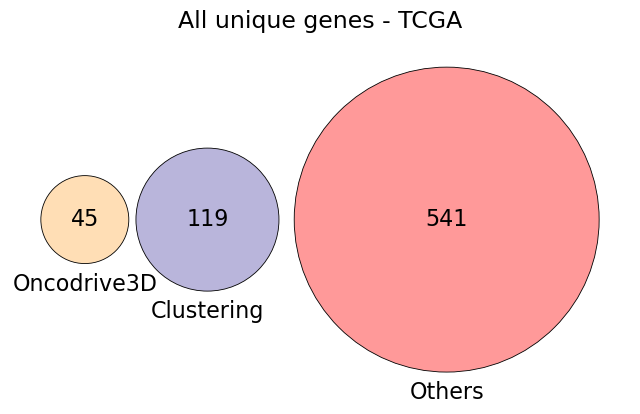

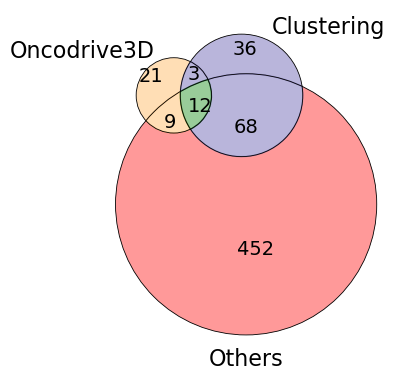

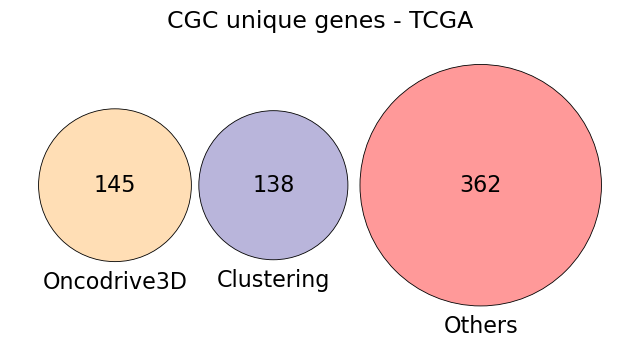

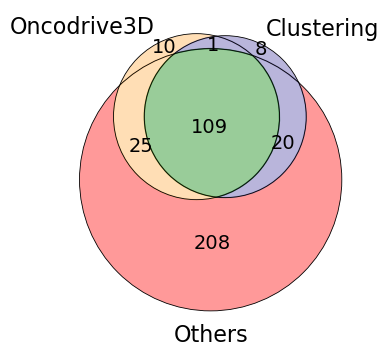

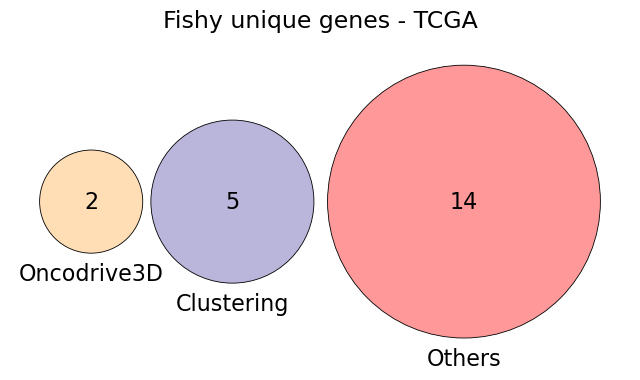

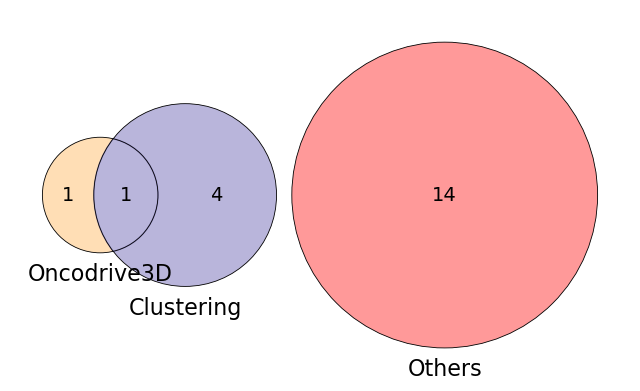

In [38]:
#================================
# All genes - TCGA - Unique genes
#================================

dict_hits, dict_cgc_hits, dict_fish_hits, dict_unknown_hits = get_hits_for_venn(genetable_subset, lst_methods, unique=False)

set1 = dict_unknown_hits["o3d"]
set2 = dict_unknown_hits["hotmaps"] | dict_hits["clustl"]
set3 = dict_hits["smreg"] | dict_hits["dndscv"] | dict_hits["mutpan"] | dict_hits["fml"]

labels = 'Oncodrive3D', 'Clustering', "Others"
colors = colors_dic["Oncodrive3D"], '#5247a6', 'red'

plot_venn3(set1, set2, set3,
           labels, colors, 
           title="All unique genes - TCGA",
           save=True,
           filename="plots/venn_diagrams/all_methods/unknown_venn_tcga_all_methods_unique.png")
print("\n\n")

#==========
# CGC genes
#==========

set1 = dict_cgc_hits["o3d"]
set2 = dict_cgc_hits["hotmaps"] | dict_cgc_hits["clustl"]
set3 = dict_cgc_hits["smreg"] | dict_cgc_hits["dndscv"] | dict_cgc_hits["mutpan"] | dict_cgc_hits["fml"]

plot_venn3(set1, set2, set3,
           labels, colors, 
           title="CGC unique genes - TCGA",
           save=True,
           filename="plots/venn_diagrams/all_methods/cgc_venn_tcga_all_methods_unique.png")
print("\n\n")

#==========
# Fish genes
#==========

set1 = dict_fish_hits["o3d"]
set2 = dict_fish_hits["hotmaps"] | dict_fish_hits["clustl"]
set3 = dict_fish_hits["smreg"] | dict_fish_hits["dndscv"] | dict_fish_hits["mutpan"] | dict_fish_hits["fml"]

plot_venn3(set1, set2, set3,
           labels, colors, 
           figsize_venn=(8, 9),
           title="Fishy unique genes - TCGA",
           save=True,
           filename="plots/venn_diagrams/all_methods/fishy_venn_tcga_all_methods_unique.png")

### Clustering methods

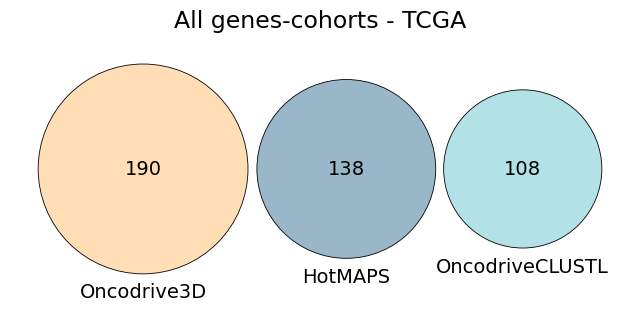

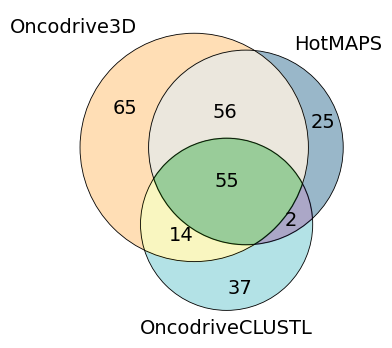

In [134]:
#=============================================================
# All genes - TCGA - Oncodrive3D VS HotMAPS VS OncodriveCLUSTL
#=============================================================

dict_hits, dict_cgc_hits, dict_fish_hits, dict_unknown_hits  = get_hits_for_venn(genetable_subset, lst_methods, unique=False)

set1 = dict_hits["o3d"]
set2 = dict_hits["hotmaps"]
set3 = dict_hits["clustl"]

labels = 'Oncodrive3D', 'HotMAPS', "OncodriveCLUSTL"
colors = colors_dic[names_dic["o3d"]], colors_dic[names_dic["hotmaps"]], colors_dic[names_dic["clustl"]]

plot_venn3(set1, set2, set3, labels, colors, title="All genes-cohorts - TCGA", clustering_groups=True,
           save=True,
           filename="plots/venn_diagrams/clustering_methods/unknown_venn_tcga_clustering.png")

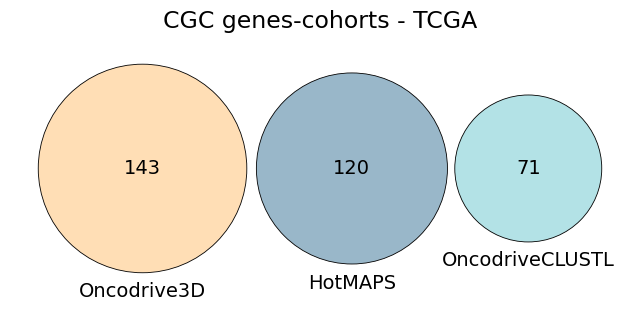

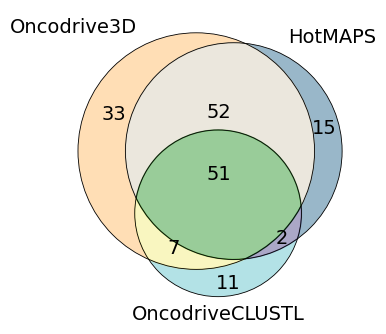

In [135]:
#==========
# CGC genes
#==========

set1 = dict_cgc_hits["o3d"]
set2 = dict_cgc_hits["hotmaps"]
set3 = dict_cgc_hits["clustl"]

plot_venn3(set1, set2, set3, labels, colors, title="CGC genes-cohorts - TCGA", clustering_groups=True,
           save=True,
           filename="plots/venn_diagrams/clustering_methods/cgc_venn_tcga_clustering.png")

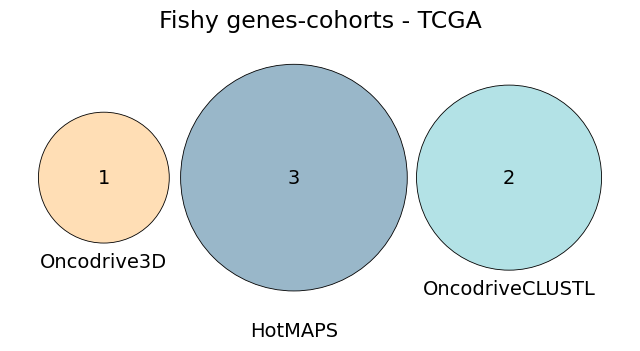

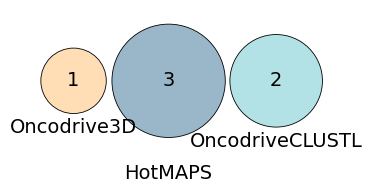

In [136]:
#==========
# Fish genes
#==========

set1 = dict_fish_hits["o3d"]
set2 = dict_fish_hits["hotmaps"]
set3 = dict_fish_hits["clustl"]

labels = 'Oncodrive3D', '\nHotMAPS', "OncodriveCLUSTL"
plot_venn3(set1, set2, set3, labels, colors, title="Fishy genes-cohorts - TCGA", clustering_groups=True,
           save=True,
           filename="plots/venn_diagrams/clustering_methods/fishy_venn_tcga_clustering.png")

#### Unique genes

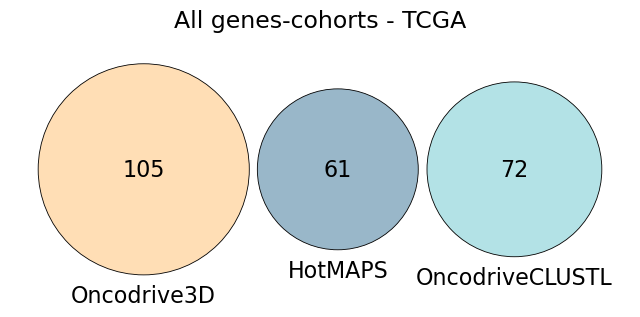

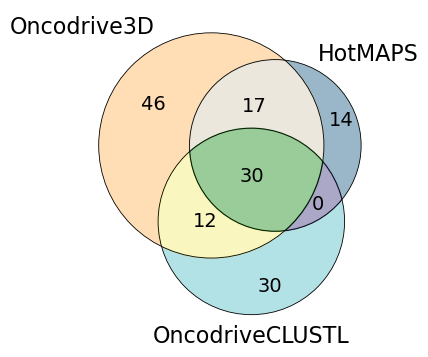

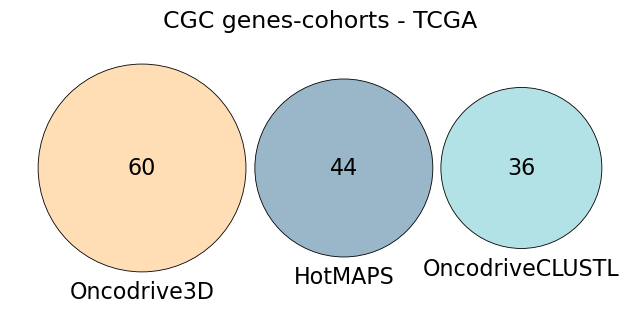

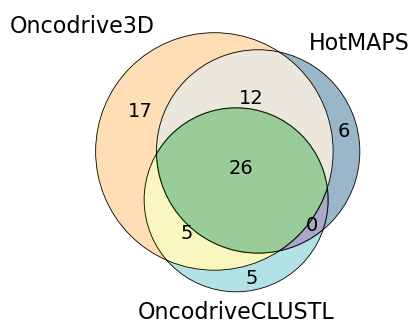

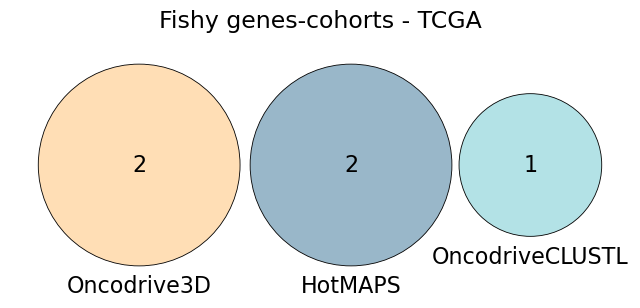

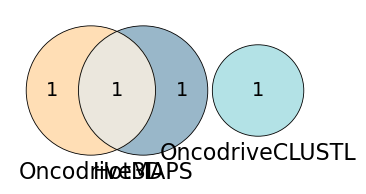

In [40]:
#================================================================
# Unique genes - TCGA - Oncodrive3D VS HotMAPS VS OncodriveCLUSTL
#================================================================

dict_hits, dict_cgc_hits, dict_fish_hits, dict_unknown_hits  = get_hits_for_venn(genetable_subset, lst_methods, unique=True)

set1 = dict_hits["o3d"]
set2 = dict_hits["hotmaps"]
set3 = dict_hits["clustl"]

labels = 'Oncodrive3D', 'HotMAPS', "OncodriveCLUSTL"
colors = colors_dic[names_dic["o3d"]], colors_dic[names_dic["hotmaps"]], colors_dic[names_dic["clustl"]]

plot_venn3(set1, set2, set3, labels, colors, title="All genes-cohorts - TCGA", clustering_groups=True,
           save=True,
           filename="plots/venn_diagrams/clustering_methods/unknown_venn_tcga_clustering_unique.png")
print("\n\n")

#==========
# CGC genes
#==========

set1 = dict_cgc_hits["o3d"]
set2 = dict_cgc_hits["hotmaps"]
set3 = dict_cgc_hits["clustl"]

plot_venn3(set1, set2, set3, labels, colors, title="CGC genes-cohorts - TCGA", clustering_groups=True,
           save=True,
           filename="plots/venn_diagrams/clustering_methods/cgc_venn_tcga_clustering_unique.png")
print("\n\n")

#==========
# Fish genes
#==========

set1 = dict_fish_hits["o3d"]
set2 = dict_fish_hits["hotmaps"]
set3 = dict_fish_hits["clustl"]

plot_venn3(set1, set2, set3, labels, colors, title="Fishy genes-cohorts - TCGA", clustering_groups=True,
           save=True,
           filename="plots/venn_diagrams/clustering_methods/fishy_venn_tcga_clustering_unique.png")

## All cohorts

### All methods

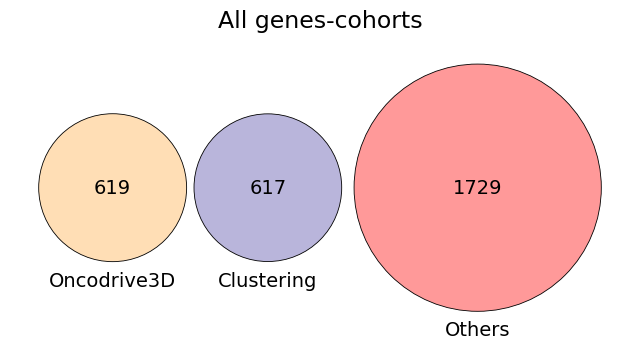

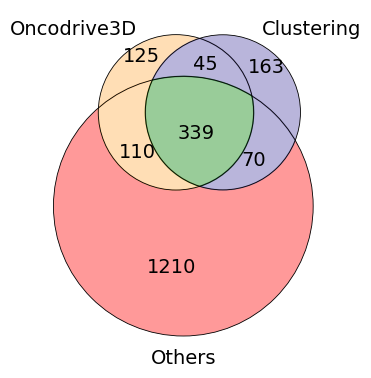

In [137]:
#==========
# All genes
#==========

dict_hits, dict_cgc_hits, dict_fish_hits, dict_unknown_hits = get_hits_for_venn(genetable, lst_methods, unique=False)

set1 = dict_hits["o3d"]
set2 = dict_hits["hotmaps"] | dict_hits["clustl"]
set3 = dict_hits["smreg"] | dict_hits["dndscv"] | dict_unknown_hits["mutpan"] | dict_unknown_hits["fml"] | dict_unknown_hits["cbase"] #| dict_unknown_hits["seismic"]

labels = 'Oncodrive3D', 'Clustering', "Others"
colors = colors_dic["Oncodrive3D"], '#5247a6', 'red'

plot_venn3(set1, set2, set3,
           labels, colors, 
           title="All genes-cohorts")

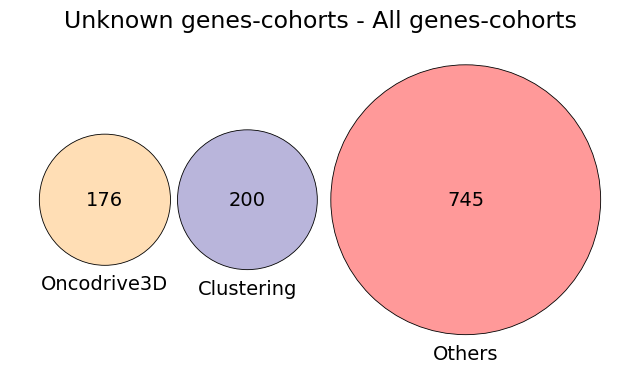

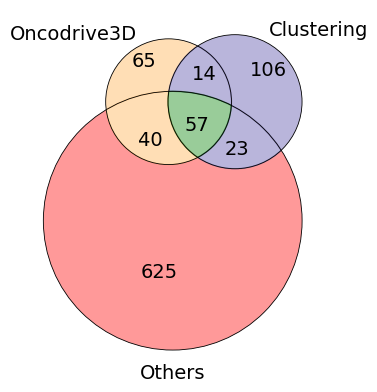

In [138]:
#==============
# Unkown genes 
#==============

set1 = dict_unknown_hits["o3d"]
set2 = dict_unknown_hits["hotmaps"] | dict_unknown_hits["clustl"]
set3 = dict_unknown_hits["smreg"] | dict_unknown_hits["dndscv"] | dict_unknown_hits["mutpan"] | dict_unknown_hits["fml"] | dict_unknown_hits["cbase"] #| dict_unknown_hits["seismic"]

labels = 'Oncodrive3D', 'Clustering', "Others"
colors = colors_dic["Oncodrive3D"], '#5247a6', 'red'

plot_venn3(set1, set2, set3,
           labels, colors, 
           title="Unknown genes-cohorts - All genes-cohorts")

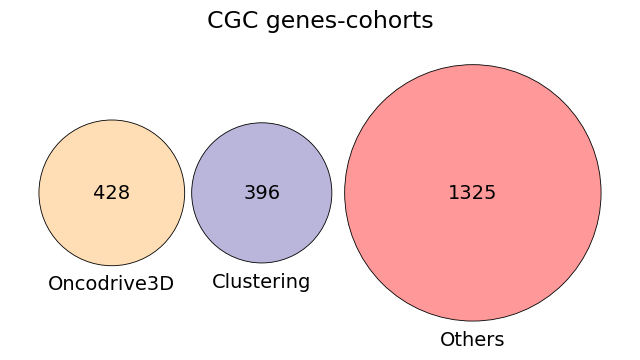

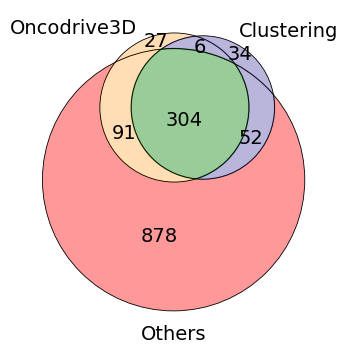

In [139]:
#==========
# CGC genes
#==========

set1 = dict_cgc_hits["o3d"]
set2 = dict_cgc_hits["hotmaps"] | dict_cgc_hits["clustl"]
set3 = dict_cgc_hits["smreg"] | dict_cgc_hits["dndscv"] | dict_cgc_hits["mutpan"] | dict_cgc_hits["fml"] | dict_cgc_hits["cbase"] #| dict_unknown_hits["seismic"]

plot_venn3(set1, set2, set3,
           labels, colors, 
           title="CGC genes-cohorts")

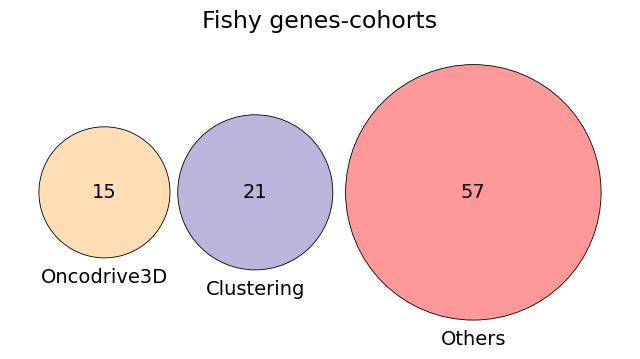

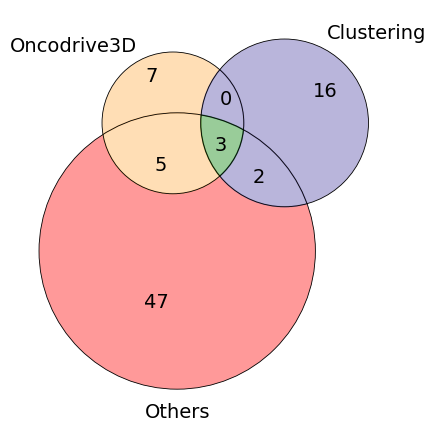

In [140]:
#==========
# Fish genes
#==========

set1 = dict_fish_hits["o3d"]
set2 = dict_fish_hits["hotmaps"] | dict_fish_hits["clustl"]
set3 = dict_fish_hits["smreg"] | dict_fish_hits["dndscv"] | dict_fish_hits["mutpan"] | dict_fish_hits["fml"] | dict_fish_hits["cbase"] #| dict_unknown_hits["seismic"]

plot_venn3(set1, set2, set3,
           labels, colors, 
           figsize_venn=(5, 7),
           title="Fishy genes-cohorts")

#### Unique genes

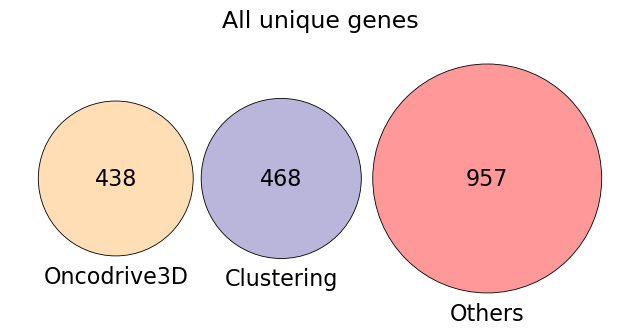

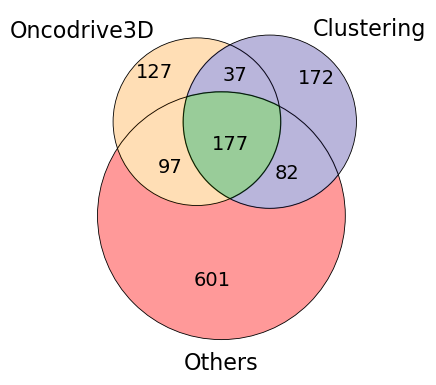

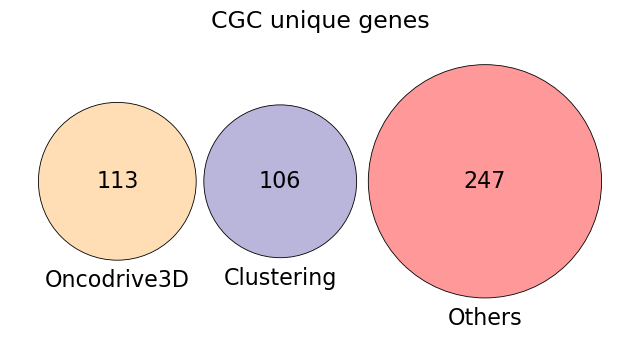

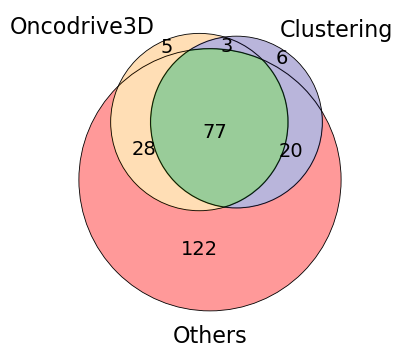

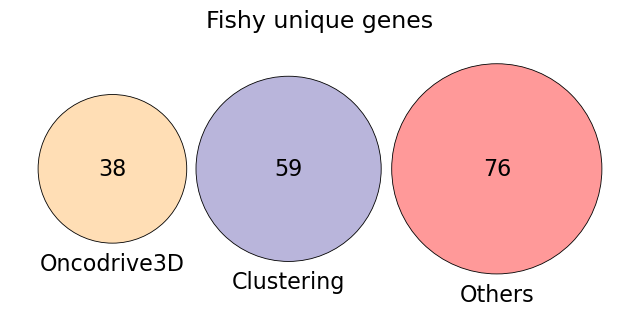

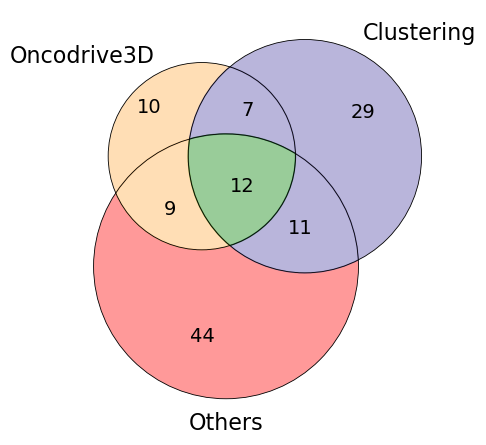

In [48]:
#=========================
# All genes - Unique genes
#=========================

dict_hits, dict_cgc_hits, dict_fish_hits, dict_unknown_hits = get_hits_for_venn(genetable, lst_methods, unique=True)

set1 = dict_hits["o3d"]
set2 = dict_hits["hotmaps"] | dict_hits["clustl"]
set3 = dict_hits["smreg"] | dict_hits["dndscv"] | dict_hits["mutpan"] | dict_hits["fml"]

labels = 'Oncodrive3D', 'Clustering', "Others"
colors = colors_dic["Oncodrive3D"], '#5247a6', 'red'

plot_venn3(set1, set2, set3,
           labels, colors, 
           title="All unique genes")
print("\n\n")

#==========
# CGC genes
#==========

set1 = dict_cgc_hits["o3d"]
set2 = dict_cgc_hits["hotmaps"] | dict_cgc_hits["clustl"]
set3 = dict_cgc_hits["smreg"] | dict_cgc_hits["dndscv"] | dict_cgc_hits["mutpan"] | dict_cgc_hits["fml"]

plot_venn3(set1, set2, set3,
           labels, colors, 
           title="CGC unique genes")
print("\n\n")

#==========
# Fish genes
#==========

set1 = dict_fish_hits["o3d"]
set2 = dict_fish_hits["hotmaps"] | dict_fish_hits["clustl"]
set3 = dict_fish_hits["smreg"] | dict_fish_hits["dndscv"] | dict_fish_hits["mutpan"] | dict_fish_hits["fml"]

plot_venn3(set1, set2, set3,
           labels, colors, 
           figsize_venn=(5, 7),
           title="Fishy unique genes")

### Clustering methods

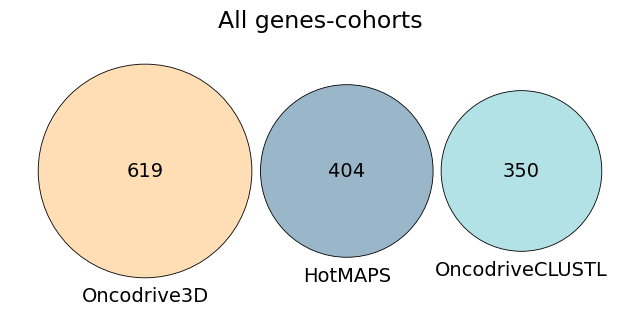

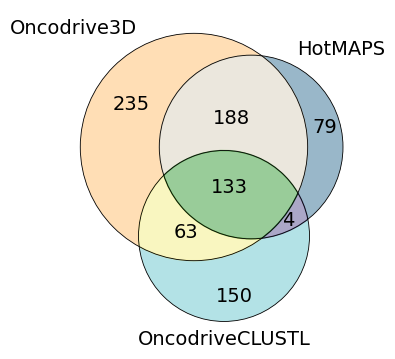

In [141]:
#======================================================
# All genes - Oncodrive3D VS HotMAPS VS OncodriveCLUSTL
#======================================================

dict_hits, dict_cgc_hits, dict_fish_hits, dict_unknown_hits = get_hits_for_venn(genetable, lst_methods, unique=False)

set1 = dict_hits["o3d"]
set2 = dict_hits["hotmaps"]
set3 = dict_hits["clustl"]

labels = 'Oncodrive3D', 'HotMAPS', "OncodriveCLUSTL"
colors = colors_dic[names_dic["o3d"]], colors_dic[names_dic["hotmaps"]], colors_dic[names_dic["clustl"]]

plot_venn3(set1, set2, set3, labels, colors, title="All genes-cohorts", clustering_groups=True)

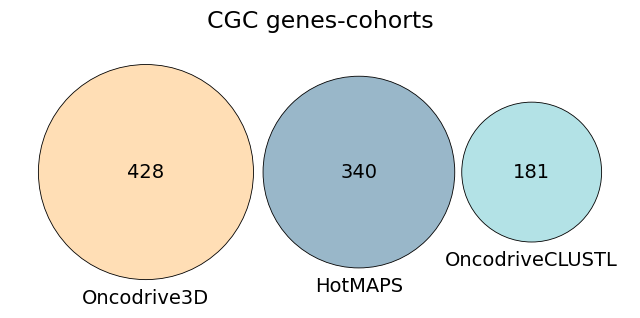

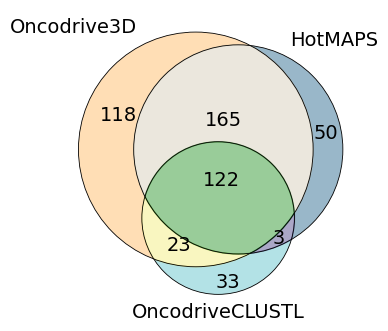

In [142]:
#==========
# CGC genes
#==========

set1 = dict_cgc_hits["o3d"]
set2 = dict_cgc_hits["hotmaps"]
set3 = dict_cgc_hits["clustl"]

plot_venn3(set1, set2, set3, labels, colors, title="CGC genes-cohorts", clustering_groups=True)

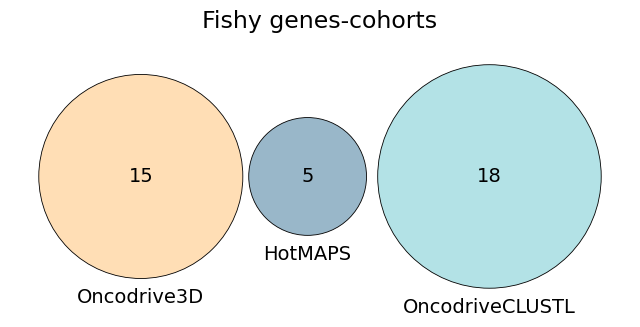

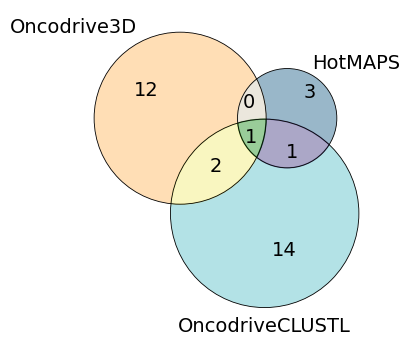

In [143]:
#==========
# Fish genes
#==========

set1 = dict_fish_hits["o3d"]
set2 = dict_fish_hits["hotmaps"]
set3 = dict_fish_hits["clustl"]

plot_venn3(set1, set2, set3, labels, colors, title="Fishy genes-cohorts", clustering_groups=True)

#### Unique genes

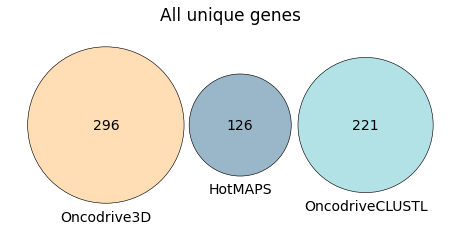

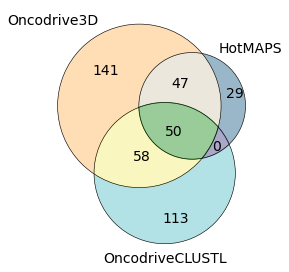

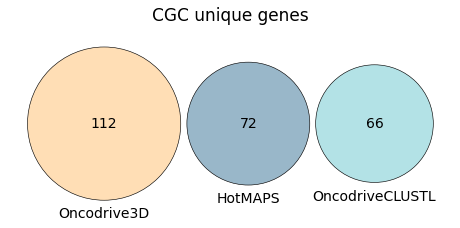

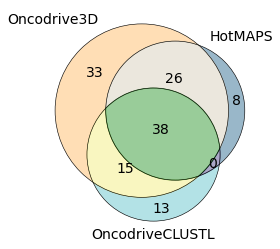

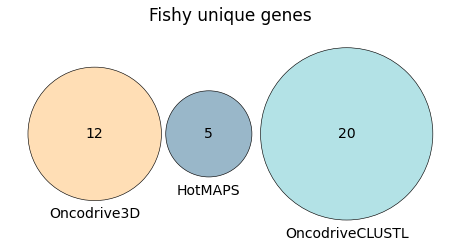

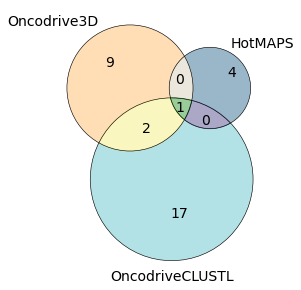

In [205]:
#=====================================================================
# All genes - Oncodrive3D VS HotMAPS VS OncodriveCLUSTL - Unique genes
#=====================================================================

dict_hits, dict_cgc_hits, dict_fish_hits = get_hits_for_venn(genetable, lst_methods, unique=True)

set1 = dict_hits["o3d"]
set2 = dict_hits["hotmaps"]
set3 = dict_hits["clustl"]

labels = 'Oncodrive3D', 'HotMAPS', "OncodriveCLUSTL"
colors = colors_dic[names_dic["o3d"]], colors_dic[names_dic["hotmaps"]], colors_dic[names_dic["clustl"]]

plot_venn3(set1, set2, set3, labels, colors, title="All unique genes", clustering_groups=True)
print("\n\n")

#==========
# CGC genes
#==========

set1 = dict_cgc_hits["o3d"]
set2 = dict_cgc_hits["hotmaps"]
set3 = dict_cgc_hits["clustl"]

plot_venn3(set1, set2, set3, labels, colors, title="CGC unique genes", clustering_groups=True)
print("\n\n")

#==========
# Fish genes
#==========

set1 = dict_fish_hits["o3d"]
set2 = dict_fish_hits["hotmaps"]
set3 = dict_fish_hits["clustl"]

plot_venn3(set1, set2, set3, labels, colors, title="Fishy unique genes", clustering_groups=True)

# Complementarity bar plot

## Functions

In [144]:
def get_hits_set_cohort(dict_hits, cohort, groups, clustering_groups=False):

    g1 = dict_hits["o3d"]
    if clustering_groups:
        # Define groups
        g2 = dict_hits["hotmaps"]
        g3 = dict_hits["clustl"]
        
        # Get intersecions, etc
        intsec_all = g1 & g2 & g3
        g1_only = g1 - g2 - g3
        g2_only = g2 - g1 - g3
        g3_only = g3 - g2 - g1
        intsec_g1_g2 = (g1 & g2) - g3
        intsec_g1_g3 = (g1 & g3) - g2
        intsec_g2_g3 = (g2 & g3) - g1
    
        groups_values = [g1_only, g2_only, g3_only, intsec_g1_g2, intsec_g1_g3, intsec_g2_g3, intsec_all]

    else:
        # Define groups
        g2 = dict_hits["hotmaps"] | dict_hits["clustl"]
        #g3 = dict_hits["smreg"] | dict_hits["dndscv"] | dict_hits["mutpan"] | dict_hits["fml"]
        g3 = dict_hits["smreg"] | dict_hits["dndscv"] | dict_hits["mutpan"] | dict_hits["fml"] | dict_hits["cbase"] #| dict_hits["seismic"]
        
        # Get intersecions, etc
        intsec_all = g1 & g2 & g3
        g2_final = g2 - intsec_all
        g1_final = g1 - g2 - intsec_all
        g3_final = g3 - g1 - g2 - intsec_all
        
        groups_values = [intsec_all, g2_final, g1_final, g3_final]
        
    # Prepare df
    hits_set_cohort = [len(group) for group in groups_values]
    hits_set_cohort_df = pd.DataFrame({"Hits" : hits_set_cohort, "Group" : groups})
    hits_set_cohort_df["Cohort"] = cohort

    return hits_set_cohort_df


def get_hits_set(genetable_df, groups, clustering_groups=False):

    lst_unknown_df = []
    lst_cgc_df = []
    lst_fish_df = []
    
    for cohort in tqdm(genetable_df["Cohort"].unique()):
        method_cohort = genetable_df[genetable_df["Cohort"] == cohort].copy()

        dict_unknown_hits = {}
        dict_cgc_hits = {}
        dict_fish_hits = {}

        for method in lst_methods:
            method_hits_cohort = method_cohort[(method_cohort[f"{method}_qval"] < 0.01)]
            dict_unknown_hits[method] = set(list(method_hits_cohort[(method_hits_cohort["CGC"] == 0) & 
                                                            (method_hits_cohort["Fish"] == 0)].apply(
                lambda x: get_gene_cohort(x, gene_only=True), axis=1).values))
            dict_cgc_hits[method] = set(list(method_hits_cohort[method_hits_cohort["CGC"] == 1].apply(
                lambda x: get_gene_cohort(x, gene_only=True), axis=1).values))
            dict_fish_hits[method] = set(list(method_hits_cohort[method_hits_cohort["Fish"] == 1].apply(
                lambda x: get_gene_cohort(x, gene_only=True), axis=1).values))

        lst_unknown_df.append(get_hits_set_cohort(dict_unknown_hits, cohort, groups, clustering_groups))
        lst_cgc_df.append(get_hits_set_cohort(dict_cgc_hits, cohort, groups, clustering_groups))
        lst_fish_df.append(get_hits_set_cohort(dict_fish_hits, cohort, groups, clustering_groups))
    
    hits_unknown_set_df = pd.concat(lst_unknown_df).reset_index(drop=True)
    hits_cgc_set_df = pd.concat(lst_cgc_df).reset_index(drop=True)
    hits_fish_set_df = pd.concat(lst_fish_df).reset_index(drop=True)
    
    return hits_unknown_set_df, hits_cgc_set_df, hits_fish_set_df

In [145]:
def get_cohort_gene_mut(maf, missense_only=False):
    
    if missense_only:
        maf = maf[maf["Variant_Classification"] == "Missense_Mutation"]
    
    cohort_gene_mut = maf.groupby("Hugo_Symbol").apply(
        lambda x: len(x)).reset_index().rename(columns={"Hugo_Symbol" : "Gene", 0 : "Count"})
    cohort_gene_mut = cohort_gene_mut.sort_values("Count", ascending=False).reset_index(drop=True)
    
    return cohort_gene_mut


def get_union_intsec_cohort(genetable_cohort_df, lst_methods):

    # Drop any genes with all NaN or 1
    qval_cols = [f"{method}_qval" for method in lst_methods]
    df = genetable_cohort_df.copy().reset_index(drop=True)
    ix = df.replace(1, np.nan).dropna(subset=qval_cols, how='all').index.values
    df = df.iloc[ix,:]
    
    ix_hits = df[qval_cols] < 0.01
    ix_hits_union = ix_hits.any(1)
    ix_hits_intsec = ix_hits.all(1)
    n_union = sum(ix_hits_union)
    n_intsec = sum(ix_hits_intsec) 
    
    return n_union, n_intsec


def get_union_intsec_hits(gentable_df, maf_dir, lst_methods, mut_thr=1):
    df = gentable_df.copy()
    lst_df = []
    
    # Read MAF files outside the loop
    maf_data = {}
    for cohort in tqdm(df["Cohort"].unique()):
        maf = pd.read_csv(f"{maf_dir}/{cohort}.in.maf", sep="\t", low_memory=False)
        maf_data[cohort] = maf
    
    for cohort in tqdm(df["Cohort"].unique()):
        cohort_df = df[df["Cohort"] == cohort].copy()
        
        # Filter genes with more than 'mut_thr' mutations
        gene_mut = get_cohort_gene_mut(maf_data[cohort], missense_only=False)
        genes_to_keep = gene_mut[gene_mut["Count"] >= mut_thr].Gene.values
        cohort_df = cohort_df[cohort_df["Gene"].isin(genes_to_keep)]
        
        df_cgc = cohort_df[cohort_df["CGC"] == 1]
        cgc_all = len(df_cgc)
        cgc_union, cgc_intsec = get_union_intsec_cohort(df_cgc, lst_methods)
        cgc_union_ratio, cgc_intsec_ratio = get_union_intsec_cohort(df_cgc, lst_methods)

        df_fish = cohort_df[cohort_df["Fish"] == 1]
        fish_all = len(df_fish)
        fish_union, fish_intsec = get_union_intsec_cohort(df_fish, lst_methods)
        fish_union_ratio, fish_intsec_ratio = get_union_intsec_cohort(df_fish, lst_methods)

        lst_df.append((cohort, 
                       cgc_all, cgc_union, cgc_intsec, 
                       cgc_union_ratio, cgc_intsec_ratio, 
                       fish_all, fish_union, fish_intsec, 
                       fish_union_ratio, fish_intsec_ratio))

    return pd.DataFrame(lst_df, columns=["Cohort",
                                         "cgc_all", "cgc_union", "cgc_intsec", 
                                         "cgc_union_r", "cgc_intsec_r", 
                                         "fish_all", "fish_union", "fish_intsec", 
                                         "fish_union_r", "fish_intsec_r"]).reset_index(drop=True)

In [146]:
def barplot_hits_set(hits_set_df, 
                     intsec_union_df_o3d,
                     intsec_union_df_hotmaps,
                     color_dict, 
                     title="Detected genes across cohorts", 
                     figsize=(12, 8), 
                     plot_xticks=True, 
                     ec="black", 
                     xfsize=13, 
                     y_ax1_fsize=13,
                     y_ax2_fsize=13,
                     top_cohorts=None,
                     
                     legend_ax1=True,
                     legend_ax2=True,
                     
                     legend_ax1_fsize=10,
                     legend_ax2_fsize=12,
                     legend_ax1_ncol=1,
                     legend_ax2_ncol=1,
  
                     extract_cancer=False,
                     target="cgc",
                     
                     h_ratio=[1, 3],
                    
                     genes_thr=1):
    
    colors_palette = plt.rcParams['axes.prop_cycle'].by_key()['color']
    hits_set_df=hits_set_df.copy()
    intsec_union_df_o3d=intsec_union_df_o3d.copy()
    intsec_union_df_hotmaps=intsec_union_df_hotmaps.copy()

    if extract_cancer:
        hits_set_df["Cohort"] = hits_set_df["Cohort"].apply(lambda x: x.split("_")[len(x.split("_"))-1])
        intsec_union_df_o3d["Cohort"] = intsec_union_df_o3d["Cohort"].apply(lambda x: x.split("_")[len(x.split("_"))-1])
        intsec_union_df_hotmaps["Cohort"] = intsec_union_df_hotmaps["Cohort"].apply(lambda x: x.split("_")[len(x.split("_"))-1])

    # Pivot the DataFrame to get 'Group' as columns and 'Cohort' as the index
    pivot_df = hits_set_df.pivot_table(index='Cohort', columns='Group', values='Hits', aggfunc='sum', fill_value=0)

    # Sort cohorts by detected genes
    cohort_totals = pivot_df.sum(axis=1).sort_values(ascending=False)
    cohort_totals = cohort_totals[cohort_totals >= genes_thr]
    pivot_df_sorted = pivot_df.loc[cohort_totals.index]
    intsec_union_df_o3d = intsec_union_df_o3d.set_index("Cohort")
    intsec_union_df_o3d = intsec_union_df_o3d.loc[cohort_totals.sort_values(ascending=False).index].fillna(0)
    intsec_union_df_hotmaps = intsec_union_df_hotmaps.set_index("Cohort")
    intsec_union_df_hotmaps = intsec_union_df_hotmaps.loc[cohort_totals.sort_values(ascending=False).index].fillna(0)
    if top_cohorts:
        pivot_df_sorted = pivot_df_sorted[:top_cohorts]
        intsec_union_df_o3d = intsec_union_df_o3d[:top_cohorts]
        intsec_union_df_hotmaps = intsec_union_df_hotmaps[:top_cohorts]

    ## Subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize, sharex=True, gridspec_kw={'height_ratios': h_ratio})

    # Barplot stacked by groups bottom
    pivot_df_sorted.plot(
        kind='bar', stacked=True, figsize=figsize, color=[color_dict[group] for group in pivot_df.columns], alpha=0.5, edgecolor=ec, ax=ax2)
    # Filled marked line plot above
    ax1.plot(intsec_union_df_hotmaps.index, intsec_union_df_hotmaps[f'{target}_union'], "-o", 
             color=colors_dic[names_dic["hotmaps"]], label='Methods ∪ with HotMAPS', lw=0.8, markersize=4, alpha=0.9)
    ax1.plot(intsec_union_df_hotmaps.index, intsec_union_df_hotmaps[f'{target}_intsec'], "--o", 
             color=colors_dic[names_dic["hotmaps"]], label='Methods ∩ with HotMAPS', lw=0.8, markersize=4, alpha=0.9)
    ax1.fill_between(intsec_union_df_hotmaps.index, intsec_union_df_o3d[f'{target}_intsec'], 
                     intsec_union_df_hotmaps[f'{target}_union'], color=colors_dic[names_dic["hotmaps"]], alpha=0.2)

    ax1.plot(intsec_union_df_o3d.index, intsec_union_df_o3d[f'{target}_union'], "-o", 
             color=colors_dic[names_dic["o3d"]], label='Methods ∪ with O3D', lw=0.8, markersize=4, alpha=0.9)
    ax1.plot(intsec_union_df_o3d.index, intsec_union_df_o3d[f'{target}_intsec'], "--o", 
             color=colors_dic[names_dic["o3d"]], label='Methods ∩ with O3D', lw=0.8, markersize=4, alpha=0.9)
    ax1.fill_between(intsec_union_df_o3d.index, intsec_union_df_o3d[f'{target}_intsec'], 
                     intsec_union_df_o3d[f'{target}_union'], color=colors_dic[names_dic["o3d"]], alpha=0.2)

    # Details
    if plot_xticks:    
        plt.xticks(rotation=45, rotation_mode="anchor", ha='right') 
    else:
        plt.xticks([])

    if legend_ax1:
        
        legend_elements = [
            mlines.Line2D([], [], color='black', linestyle='-', label='Methods ∪'),
            mlines.Line2D([], [], color='black', linestyle='--', label='Methods ∩'),
            mlines.Line2D([], [], color=colors_dic[names_dic["o3d"]], marker='o', label=f"With {names_dic['o3d']}"),
            mlines.Line2D([], [], color=colors_dic[names_dic["hotmaps"]], marker='o', label=f"With {names_dic['hotmaps']}")
        ]
        
        # Add the legend with the custom elements
        ax1.legend(handles=legend_elements)

    else:
        ax1.legend('', frameon=False)
    if legend_ax2:
        ax2.legend(ncol=legend_ax2_ncol, fontsize=legend_ax2_fsize)
    else:
        ax2.legend('', frameon=False)

    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)

    plt.xlabel('Cohort', fontsize=xfsize)
    ax2.set_ylabel('Count', fontsize=y_ax1_fsize)
    ax1.set_ylabel('Count', fontsize=y_ax2_fsize)
    plt.subplots_adjust(hspace=0.05) 
    plt.suptitle(title, fontsize=16)
    plt.show()
    

def barplot_hits_set_simple(hits_set_df, color_dict, title, 
                            figsize=(12, 7), plot_xticks=True, ec="black", 
                            xfontsize=13, top_cohorts=None, extract_cancer=False, 
                            legend_ncol=1, legend_fontsize=12, legend=True,
                            save=False, filename="barplot_complementarity.png"):

    hits_set_df = hits_set_df.copy()
    if extract_cancer:
        hits_set_df["Cohort"] = hits_set_df["Cohort"].apply(lambda x: x.split("_")[len(x.split("_"))-1])
        
    # Pivot the DataFrame to get 'Group' as columns and 'Cohort' as the index
    pivot_df = hits_set_df.pivot_table(index='Cohort', columns='Group', values='Hits', aggfunc='sum', fill_value=0)

    # Sort cohorts by detected genes
    cohort_totals = pivot_df.sum(axis=1)
    pivot_df_sorted = pivot_df.loc[cohort_totals.sort_values(ascending=False).index]
    if top_cohorts:
        pivot_df_sorted = pivot_df_sorted[:top_cohorts]

    # Plot
    ax = pivot_df_sorted.plot(kind='bar', stacked=True, figsize=figsize, color=[color_dict[group] for group in pivot_df.columns], alpha=0.5, edgecolor=ec)
    plt.xlabel('Cohort', fontsize=xfontsize)
    plt.ylabel('Detected genes', fontsize=xfontsize)
    plt.title(title, fontsize=16)
    if plot_xticks:    
        plt.xticks(rotation=45, rotation_mode="anchor", ha='right') 
    else:
        plt.xticks([])
    if legend:
        plt.legend(fontsize=legend_fontsize, ncol=legend_ncol)
    else:
        plt.legend('', frameon=False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    if save:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

## TCGA (main)

### All methods

100%|███████████████████████████████████████████████████████████████████| 32/32 [00:02<00:00, 13.04it/s]


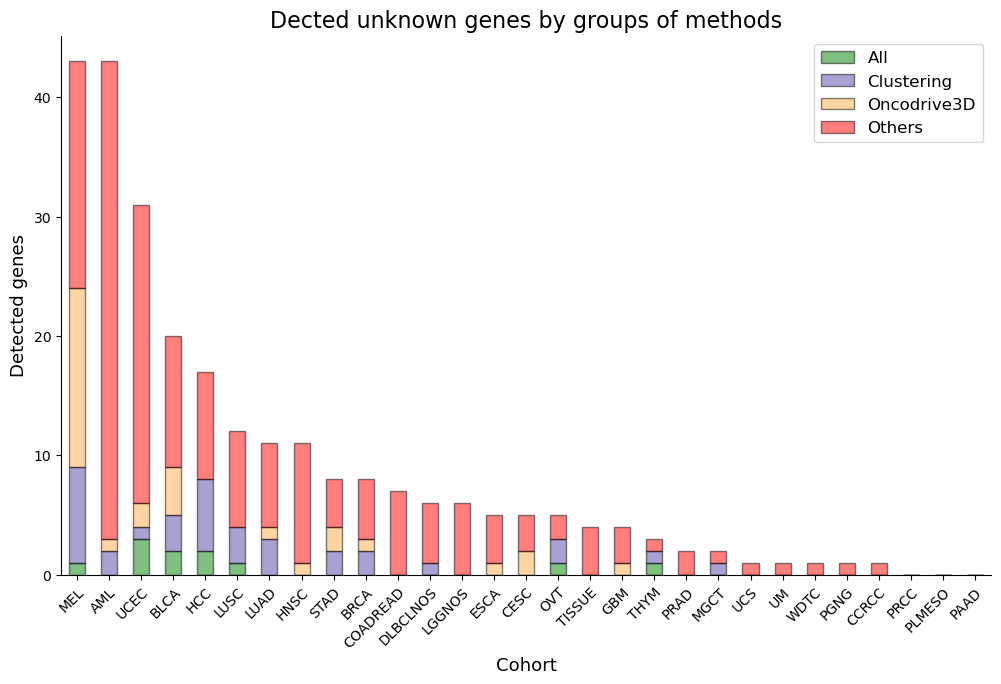

In [147]:
groups = ["All", "Clustering", "Oncodrive3D", "Others"]
colors = {"Oncodrive3D" : colors_dic[names_dic["o3d"]],
          "Clustering" : "#5247a6", 
          "Others" : "red", 
          "All" : "green"}

hits_unknown_set_df, hits_cgc_set_df, hits_fish_set_df = get_hits_set(genetable_subset, groups, clustering_groups=False)

barplot_hits_set_simple(hits_unknown_set_df, color_dict=colors, title='Dected unknown genes by groups of methods', 
                        extract_cancer=True, top_cohorts=29, save=True, filename="plots/bar_plots/all_methods/unknown_barplot_complementarity_tcga_all_methods.png")

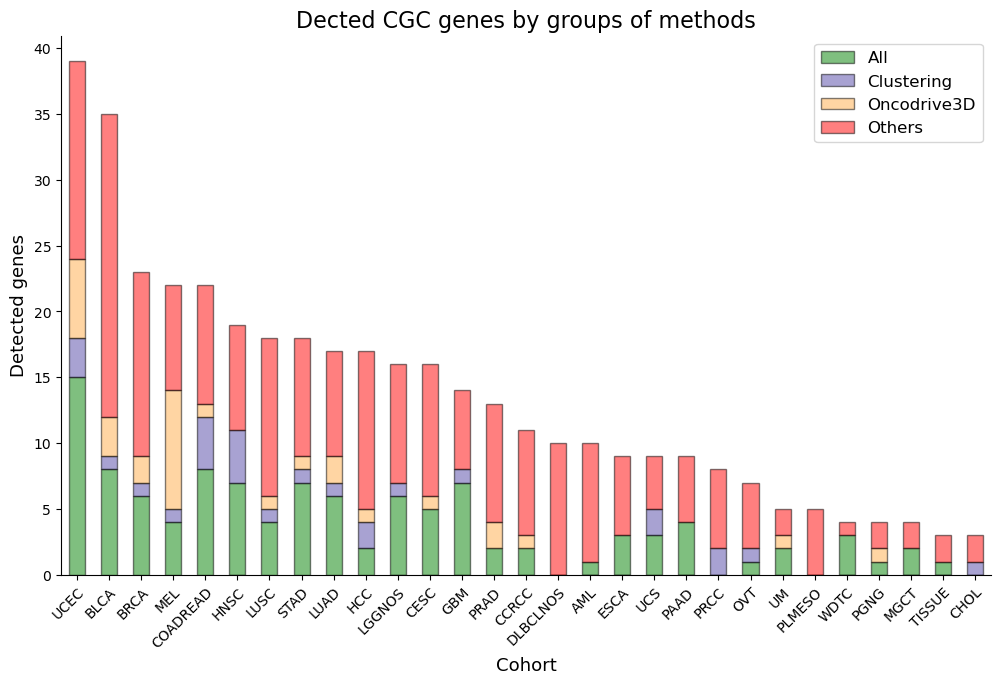

In [148]:
barplot_hits_set_simple(hits_cgc_set_df, color_dict=colors, title='Dected CGC genes by groups of methods', 
                        extract_cancer=True, top_cohorts=29, save=True, filename="plots/bar_plots/all_methods/cgc_barplot_complementarity_tcga_all_methods.png")

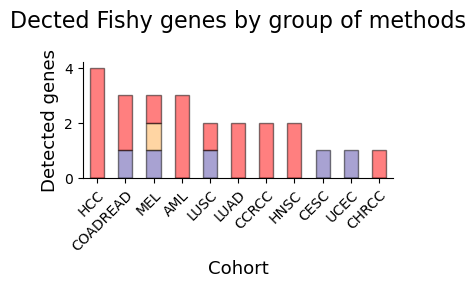

In [149]:
barplot_hits_set_simple(hits_fish_set_df, color_dict=colors, title='Dected Fishy genes by group of methods\n', 
                 top_cohorts=11, figsize=(4, 1.5), legend_ncol=1, legend_fontsize=8, extract_cancer=True, legend=False, 
                        save=True, filename="plots/bar_plots/all_methods/fishy_barplot_complementarity_tcga_all_methods.png")

### Clustering methods

100%|███████████████████████████████████████████████████████████████████| 32/32 [00:02<00:00, 13.11it/s]


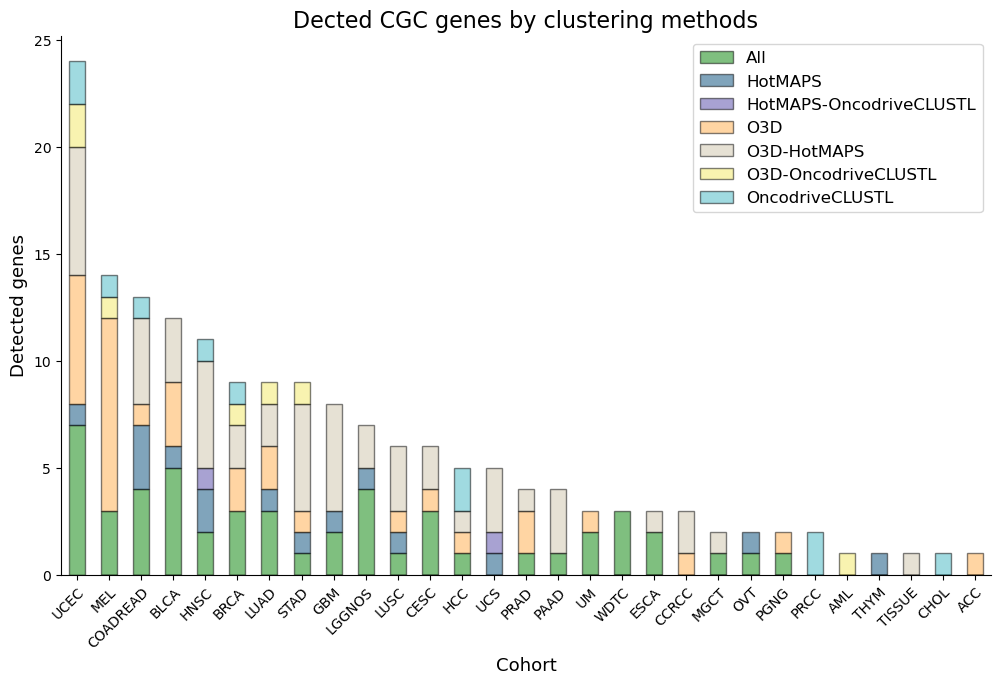

In [150]:
## TCGA
groups = ["O3D", "HotMAPS", "OncodriveCLUSTL", "O3D-HotMAPS", "O3D-OncodriveCLUSTL", "HotMAPS-OncodriveCLUSTL", "All"]
colors = {"O3D" : colors_dic["Oncodrive3D"],
          "HotMAPS" : colors_dic["HotMAPS"], 
          "OncodriveCLUSTL" : colors_dic["OncodriveCLUSTL"], 
          "O3D-HotMAPS" : "#cec5ab", 
          "O3D-OncodriveCLUSTL" : "#f2e963", 
          "HotMAPS-OncodriveCLUSTL" : "#5247a6", 
          "All" : "green"}

hits_set_df, hits_cgc_set_df, hits_fish_set_df = get_hits_set(genetable_subset, groups, clustering_groups=True)
barplot_hits_set_simple(hits_cgc_set_df, color_dict=colors, title='Dected CGC genes by clustering methods', extract_cancer=True, top_cohorts=29,
                        save=True, filename="plots/bar_plots/clustering_methods/cgc_barplot_complementarity_clustering_tcga_all_methods.png")

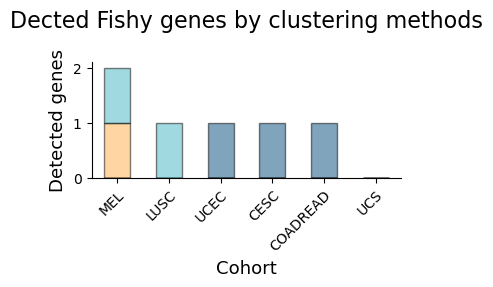

In [151]:
barplot_hits_set_simple(hits_fish_set_df, color_dict=colors, title='Dected Fishy genes by clustering methods\n', 
                 top_cohorts=6, figsize=(4, 1.5), legend_ncol=1, legend_fontsize=8, extract_cancer=True, legend=False,
                 save=True, filename="plots/bar_plots/clustering_methods/fishy_barplot_complementarity_clustering_tcga_all_methods.png")

## All cohorts (supplementary)

### All methods

100%|█████████████████████████████████████████████████████████████████| 215/215 [01:04<00:00,  3.35it/s]


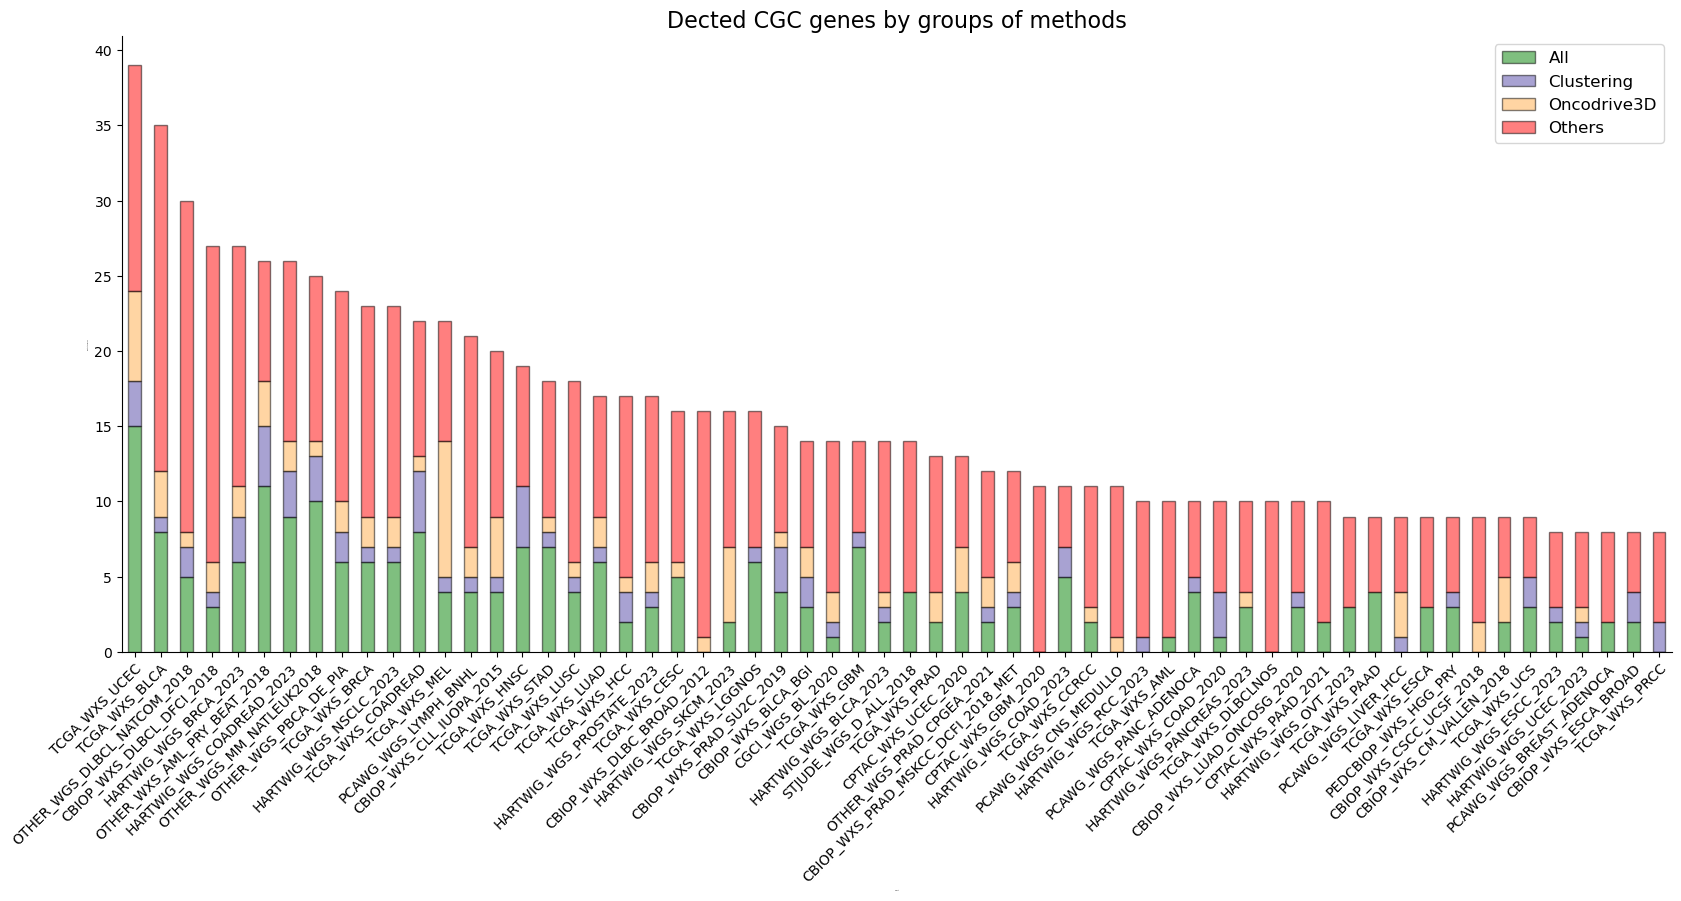

In [100]:
## All cohorts
groups = ["All", "Clustering", "Oncodrive3D", "Others"]
colors = {"Oncodrive3D" : colors_dic[names_dic["o3d"]],
          "Clustering" : "#5247a6", 
          "Others" : "red", 
          "All" : "green"}

hits_set_df, hits_cgc_set_df, hits_fish_set_df = get_hits_set(genetable, groups, clustering_groups=False)

barplot_hits_set_simple(hits_cgc_set_df, color_dict=colors, title='Dected CGC genes by groups of methods', 
                 figsize=(20, 8), plot_xticks=True, xfontsize=1, top_cohorts=60)

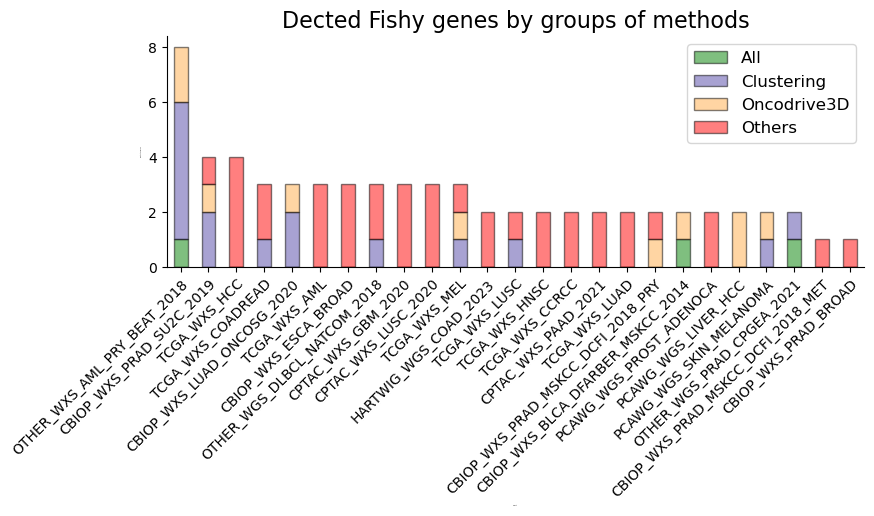

In [101]:
barplot_hits_set_simple(hits_fish_set_df, color_dict=colors, title='Dected Fishy genes by groups of methods', 
                 figsize=(9, 3), plot_xticks=True, xfontsize=1, top_cohorts=25)

### Clustering methods

100%|█████████████████████████████████████████████████████████████████| 215/215 [01:04<00:00,  3.35it/s]


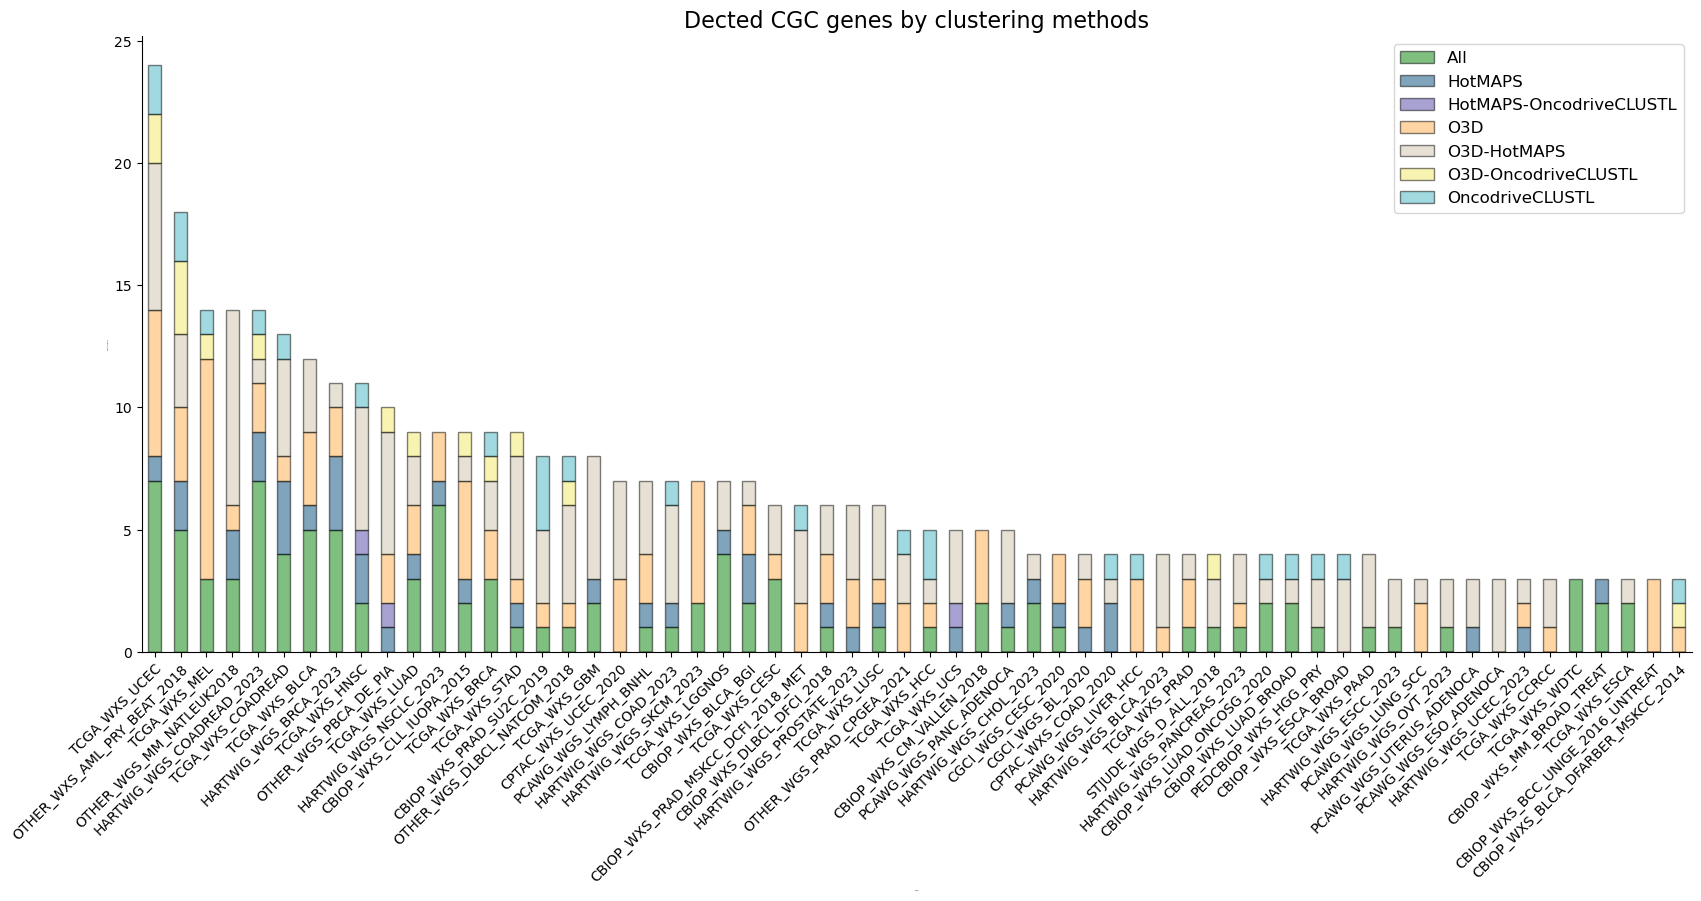

In [102]:
## All cohorts
groups = ["O3D", "HotMAPS", "OncodriveCLUSTL", "O3D-HotMAPS", "O3D-OncodriveCLUSTL", "HotMAPS-OncodriveCLUSTL", "All"]
colors = {"O3D" : colors_dic["Oncodrive3D"],
          "HotMAPS" : colors_dic["HotMAPS"], 
          "OncodriveCLUSTL" : colors_dic["OncodriveCLUSTL"], 
          "O3D-HotMAPS" : "#cec5ab", 
          "O3D-OncodriveCLUSTL" : "#f2e963", 
          "HotMAPS-OncodriveCLUSTL" : "#5247a6", 
          "All" : "green"}

hits_set_df, hits_cgc_set_df, hits_fish_set_df = get_hits_set(genetable, groups, clustering_groups=True)
barplot_hits_set_simple(hits_cgc_set_df, color_dict=colors, title='Dected CGC genes by clustering methods', 
                 figsize=(20, 8), plot_xticks=True, xfontsize=1, top_cohorts=60)

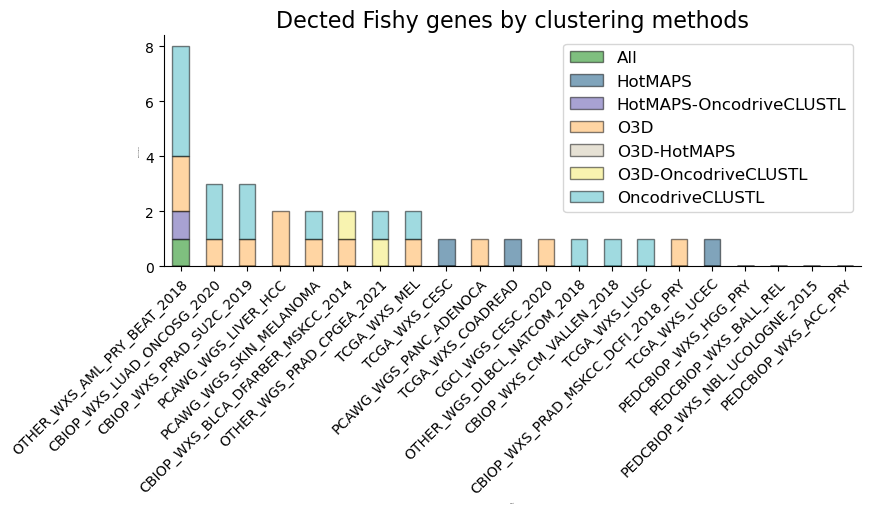

In [103]:
barplot_hits_set_simple(hits_fish_set_df, color_dict=colors, title='Dected Fishy genes by clustering methods', 
                 figsize=(9, 3), plot_xticks=True, xfontsize=1, top_cohorts=21)

## Plot for IntOGen (maybe supplementary?)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:06<00:00,  5.16it/s]


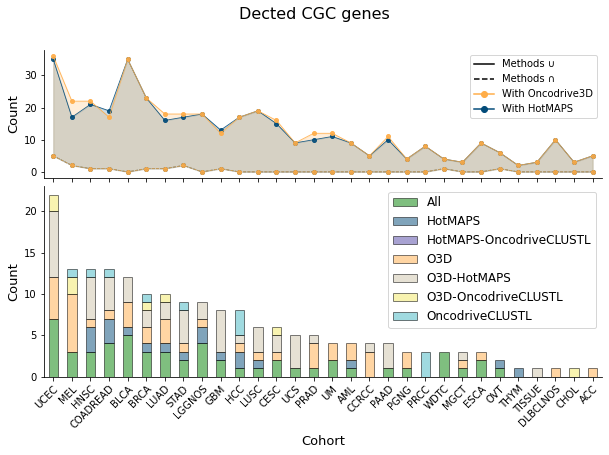

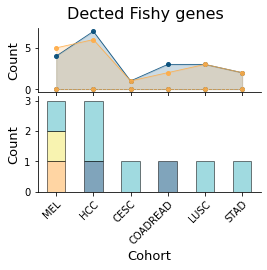

In [81]:
## TCGA
groups = ["O3D", "HotMAPS", "OncodriveCLUSTL", "O3D-HotMAPS", "O3D-OncodriveCLUSTL", "HotMAPS-OncodriveCLUSTL", "All"]
colors = {"O3D" : colors_dic["Oncodrive3D"],
          "HotMAPS" : colors_dic["HotMAPS"], 
          "OncodriveCLUSTL" : colors_dic["OncodriveCLUSTL"], 
          "O3D-HotMAPS" : "#cec5ab", 
          "O3D-OncodriveCLUSTL" : "#f2e963", 
          "HotMAPS-OncodriveCLUSTL" : "#5247a6", 
          "All" : "green"}

hits_set_df, hits_cgc_set_df, hits_fish_set_df = get_hits_set(genetable_subset, groups, clustering_groups=True)

df_intsec_union_hotmaps = get_union_intsec_hits(genetable_subset.drop(columns=["o3d_rank", "o3d_pval", "o3d_qval"]), 
                                                maf_dir, 
                                                lst_methods=[method for method in lst_methods if method != "o3d"], 
                                                mut_thr=1)

df_intsec_union_o3d = get_union_intsec_hits(genetable_subset.drop(columns=["hotmaps_rank", "hotmaps_pval", "hotmaps_qval"]), 
                                            maf_dir, 
                                            lst_methods=[method for method in lst_methods if method != "hotmaps"], 
                                            mut_thr=1)

barplot_hits_set(hits_set_df=hits_cgc_set_df, 
                 intsec_union_df_o3d=df_intsec_union_o3d,
                 intsec_union_df_hotmaps=df_intsec_union_hotmaps,
                 color_dict=colors, 
                 title=f"Dected CGC genes", 
                 figsize=(10, 6), 
                 plot_xticks=True, 
                 top_cohorts=None,
                 xfsize=13, 
                 
                 legend_ax1=True,
                 legend_ax2=True,
                 legend_ax1_fsize=10,
                 legend_ax2_fsize=12,
                 legend_ax1_ncol=2,

                 extract_cancer=True,
                 target="cgc",
                 genes_thr=1,
                 h_ratio=[1,1.5])

barplot_hits_set(hits_set_df=hits_fish_set_df, 
                 intsec_union_df_o3d=df_intsec_union_o3d,
                 intsec_union_df_hotmaps=df_intsec_union_hotmaps,
                 color_dict=colors, 
                 title=f"Dected Fishy genes", 
                 figsize=(4, 3), 
                 plot_xticks=True, 
                 top_cohorts=None,
                 xfsize=13, 
                 
                 legend_ax1=False,
                 legend_ax2=False,
                 legend_ax1_fsize=10,
                 legend_ax2_fsize=12,
                 legend_ax1_ncol=2,

                 extract_cancer=True,
                 target="fish",
                 genes_thr=1,
                 h_ratio=[1,1.5])

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 209/209 [01:11<00:00,  2.94it/s]


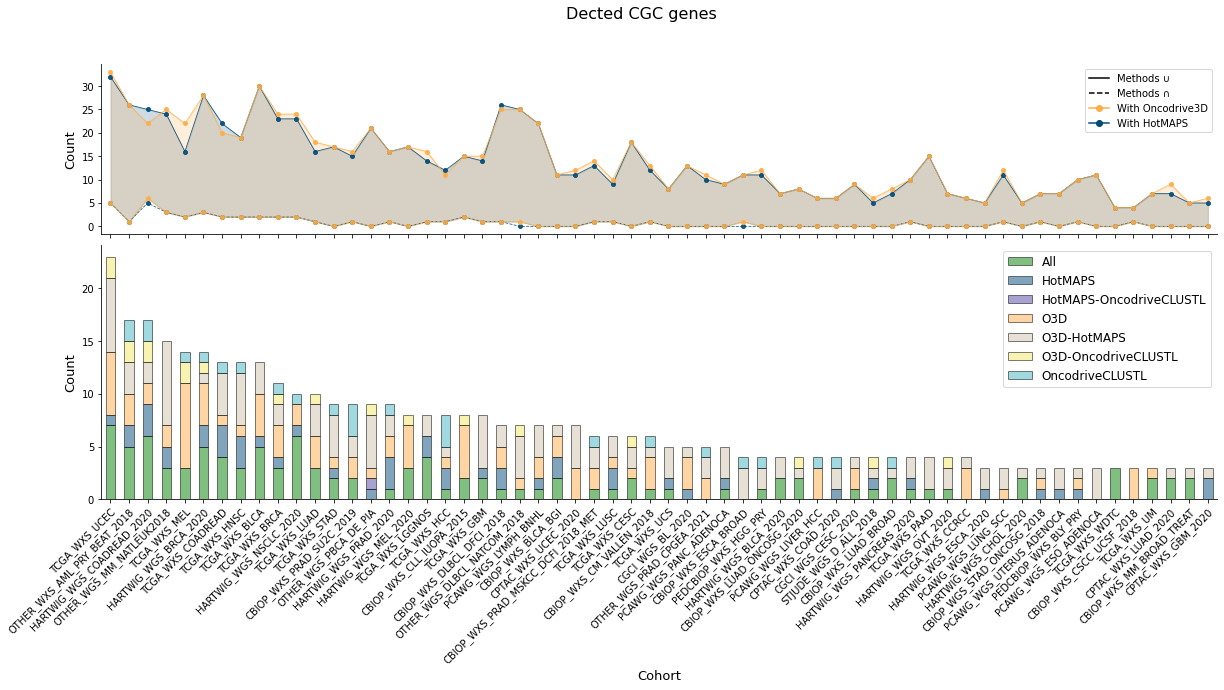

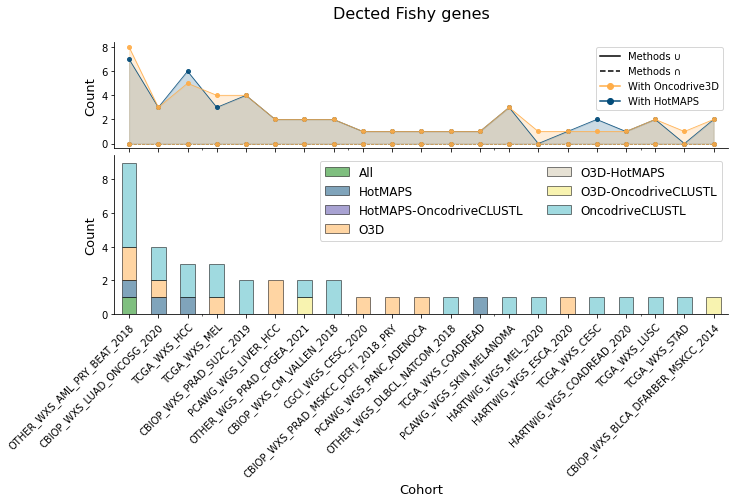

In [21]:
## All cohorts
groups = ["O3D", "HotMAPS", "OncodriveCLUSTL", "O3D-HotMAPS", "O3D-OncodriveCLUSTL", "HotMAPS-OncodriveCLUSTL", "All"]
colors = {"O3D" : colors_dic["Oncodrive3D"],
          "HotMAPS" : colors_dic["HotMAPS"], 
          "OncodriveCLUSTL" : colors_dic["OncodriveCLUSTL"], 
          "O3D-HotMAPS" : "#cec5ab", 
          "O3D-OncodriveCLUSTL" : "#f2e963", 
          "HotMAPS-OncodriveCLUSTL" : "#5247a6", 
          "All" : "green"}

hits_set_df, hits_cgc_set_df, hits_fish_set_df = get_hits_set(genetable, groups, clustering_groups=True)

df_intsec_union_hotmaps = get_union_intsec_hits(genetable.drop(columns=["o3d_rank", "o3d_pval", "o3d_qval"]), 
                                                maf_dir, 
                                                lst_methods=[method for method in lst_methods if method != "o3d"], 
                                                mut_thr=1)

df_intsec_union_o3d = get_union_intsec_hits(genetable.drop(columns=["hotmaps_rank", "hotmaps_pval", "hotmaps_qval"]), 
                                            maf_dir, 
                                            lst_methods=[method for method in lst_methods if method != "hotmaps"], 
                                            mut_thr=1)

barplot_hits_set(hits_set_df=hits_cgc_set_df, 
                 intsec_union_df_o3d=df_intsec_union_o3d,
                 intsec_union_df_hotmaps=df_intsec_union_hotmaps,
                 color_dict=colors, 
                 title=f"Dected CGC genes", 
                 figsize=(20, 8), 
                 plot_xticks=True, 
                 top_cohorts=60,
                 xfsize=13, 
                 
                 legend_ax1=True,
                 legend_ax2=True,
                 legend_ax1_fsize=10,
                 legend_ax2_fsize=12,
                 legend_ax1_ncol=2,

                 extract_cancer=False,
                 target="cgc",
                 genes_thr=1,
                 h_ratio=[1,1.5])

barplot_hits_set(hits_set_df=hits_fish_set_df, 
                 intsec_union_df_o3d=df_intsec_union_o3d,
                 intsec_union_df_hotmaps=df_intsec_union_hotmaps,
                 color_dict=colors, 
                 title=f"Dected Fishy genes", 
                 figsize=(11, 5), 
                 plot_xticks=True, 
                 top_cohorts=30,
                 xfsize=13, 
                 
                 legend_ax1=True,
                 legend_ax2=True,
                 legend_ax1_fsize=10,
                 legend_ax2_fsize=12,
                 legend_ax1_ncol=2,
                 legend_ax2_ncol=2,

                 extract_cancer=False,
                 target="fish",
                 genes_thr=1,
                 h_ratio=[1,1.5])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:06<00:00,  5.07it/s]


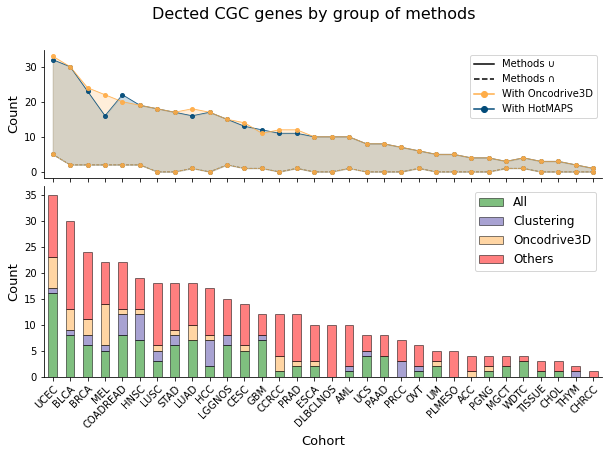

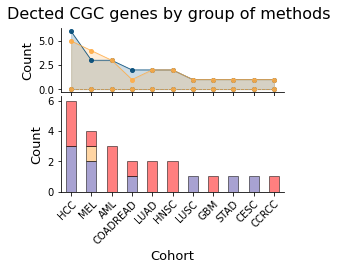

In [20]:
## TCGA
groups = ["All", "Clustering", "Oncodrive3D", "Others"]
colors = {"Oncodrive3D" : colors_dic[names_dic["o3d"]],
          "Clustering" : "#5247a6", 
          "Others" : "red", 
          "All" : "green"}

hits_set_df, hits_cgc_set_df, hits_fish_set_df = get_hits_set(genetable_subset, groups, clustering_groups=False)

df_intsec_union_hotmaps = get_union_intsec_hits(genetable_subset.drop(columns=["o3d_rank", "o3d_pval", "o3d_qval"]), 
                                                maf_dir, 
                                                lst_methods=[method for method in lst_methods if method != "o3d"], 
                                                mut_thr=1)

df_intsec_union_o3d = get_union_intsec_hits(genetable_subset.drop(columns=["hotmaps_rank", "hotmaps_pval", "hotmaps_qval"]), 
                                            maf_dir, 
                                            lst_methods=[method for method in lst_methods if method != "hotmaps"], 
                                            mut_thr=1)

barplot_hits_set(hits_set_df=hits_cgc_set_df, 
                 intsec_union_df_o3d=df_intsec_union_o3d,
                 intsec_union_df_hotmaps=df_intsec_union_hotmaps,
                 color_dict=colors, 
                 title=f"Dected CGC genes by group of methods", 
                 figsize=(10, 6), 
                 plot_xticks=True, 
                 top_cohorts=None,
                 xfsize=13, 
                 
                 legend_ax1=True,
                 legend_ax2=True,
                 legend_ax1_fsize=10,
                 legend_ax2_fsize=12,
                 legend_ax1_ncol=2,

                 extract_cancer=True,
                 target="cgc",
                 genes_thr=1,
                 h_ratio=[1,1.5])

barplot_hits_set(hits_set_df=hits_fish_set_df, 
                 intsec_union_df_o3d=df_intsec_union_o3d,
                 intsec_union_df_hotmaps=df_intsec_union_hotmaps,
                 color_dict=colors, 
                 title=f"Dected CGC genes by group of methods", 
                 figsize=(4, 3), 
                 plot_xticks=True, 
                 top_cohorts=None,
                 xfsize=13, 
                 
                 legend_ax1=False,
                 legend_ax2=False,
                 legend_ax1_fsize=10,
                 legend_ax2_fsize=12,
                 legend_ax1_ncol=2,

                 extract_cancer=True,
                 target="fish",
                 genes_thr=1,
                 h_ratio=[1,1.5])

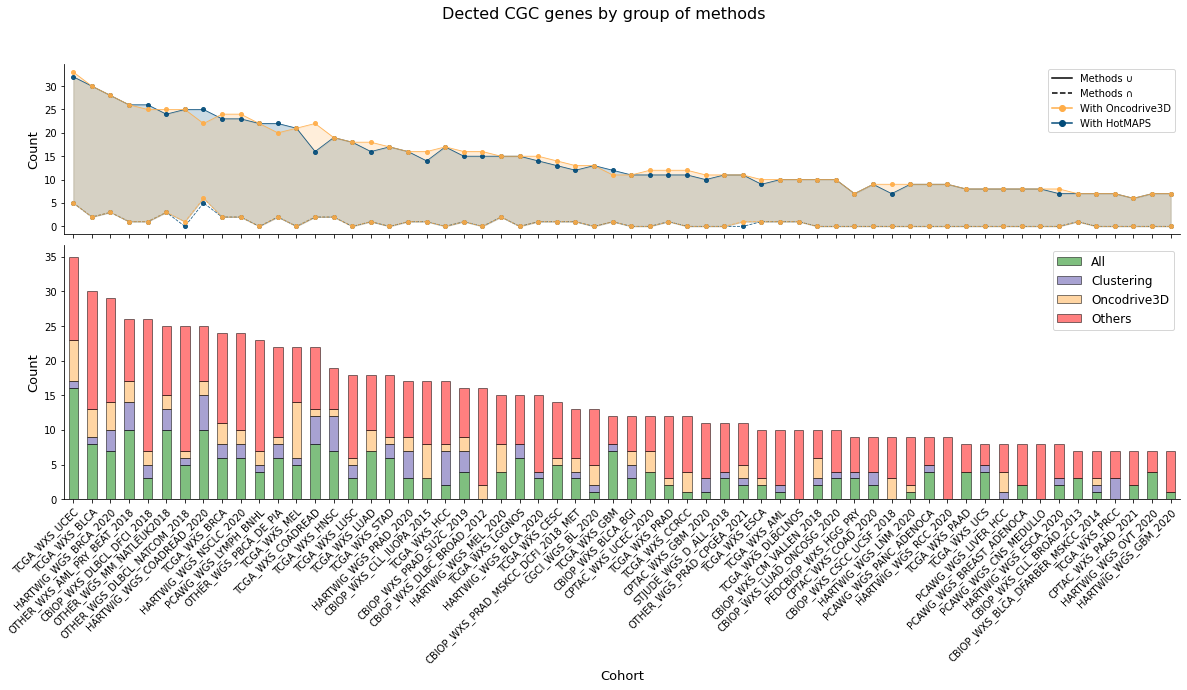

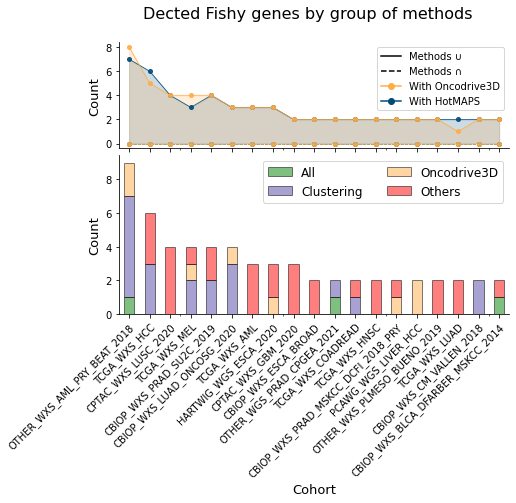

In [24]:
groups = ["All", "Clustering", "Oncodrive3D", "Others"]
colors = {"Oncodrive3D" : colors_dic[names_dic["o3d"]],
          "Clustering" : "#5247a6", 
          "Others" : "red", 
          "All" : "green"}

hits_set_df, hits_cgc_set_df, hits_fish_set_df = get_hits_set(genetable, groups, clustering_groups=False)

df_intsec_union_hotmaps = get_union_intsec_hits(genetable.drop(columns=["o3d_rank", "o3d_pval", "o3d_qval"]), 
                                                maf_dir, 
                                                lst_methods=[method for method in lst_methods if method != "o3d"], 
                                                mut_thr=1)

df_intsec_union_o3d = get_union_intsec_hits(genetable.drop(columns=["hotmaps_rank", "hotmaps_pval", "hotmaps_qval"]), 
                                            maf_dir, 
                                            lst_methods=[method for method in lst_methods if method != "hotmaps"], 
                                            mut_thr=1)

barplot_hits_set(hits_set_df=hits_cgc_set_df, 
                 intsec_union_df_o3d=df_intsec_union_o3d,
                 intsec_union_df_hotmaps=df_intsec_union_hotmaps,
                 color_dict=colors, 
                 title=f"Dected CGC genes by group of methods", 
                 figsize=(20, 8), 
                 plot_xticks=True, 
                 top_cohorts=60,
                 xfsize=13, 
                 
                 legend_ax1=True,
                 legend_ax2=True,
                 legend_ax1_fsize=10,
                 legend_ax2_fsize=12,
                 legend_ax1_ncol=2,

                 extract_cancer=False,
                 target="cgc",
                 genes_thr=1,
                 h_ratio=[1,1.5])

barplot_hits_set(hits_set_df=hits_fish_set_df, 
                 intsec_union_df_o3d=df_intsec_union_o3d,
                 intsec_union_df_hotmaps=df_intsec_union_hotmaps,
                 color_dict=colors, 
                 title=f"Dected Fishy genes by group of methods", 
                 figsize=(7, 5), 
                 plot_xticks=True, 
                 top_cohorts=19,
                 xfsize=13, 
                 
                 legend_ax1=True,
                 legend_ax2=True,
                 legend_ax1_fsize=10,
                 legend_ax2_fsize=12,
                 legend_ax1_ncol=2,
                 legend_ax2_ncol=2,

                 extract_cancer=False,
                 target="fish",
                 genes_thr=1,
                 h_ratio=[1,1.5])

### Union and intersection plots

In [50]:
def plot_union_intsec(intsec_union_df_o3d,
                      intsec_union_df_hotmaps,
                      title="Detected genes across cohorts", 
                      figsize=(12, 8), 
                      plot_xticks=True, 
                      ec="black", 
                      xfsize=13, 
                      yfsize=13,
                      top_cohorts=None,
                      legend=True,
                      extract_cancer=False,
                      target="cgc",
                      scatter=True,
                      filename="union_intsec.png",
                      save=False):

    colors_palette = plt.rcParams['axes.prop_cycle'].by_key()['color']
    intsec_union_df_o3d=intsec_union_df_o3d.copy()
    intsec_union_df_hotmaps=intsec_union_df_hotmaps.copy()

    if extract_cancer:
        intsec_union_df_o3d["Cohort"] = intsec_union_df_o3d["Cohort"].apply(lambda x: x.split("_")[len(x.split("_"))-1])
        intsec_union_df_hotmaps["Cohort"] = intsec_union_df_hotmaps["Cohort"].apply(lambda x: x.split("_")[len(x.split("_"))-1])
        
    # Sort cohorts by detected genes
    cohorts_sorted = intsec_union_df_o3d.sort_values(f"{target}_union", ascending=False).Cohort.values
    intsec_union_df_o3d = intsec_union_df_o3d.set_index("Cohort")
    intsec_union_df_o3d = intsec_union_df_o3d.loc[cohorts_sorted].fillna(0)
    intsec_union_df_hotmaps = intsec_union_df_hotmaps.set_index("Cohort")
    intsec_union_df_hotmaps = intsec_union_df_hotmaps.loc[cohorts_sorted].fillna(0)
    if top_cohorts:
        intsec_union_df_o3d = intsec_union_df_o3d[:top_cohorts]
        intsec_union_df_hotmaps = intsec_union_df_hotmaps[:top_cohorts]

    ## Subplots
    fig, ax1 = plt.subplots(figsize=figsize)

    # Filled marked line plot above
    if scatter:
        s="o"
    else:
        s=""
    ax1.plot(intsec_union_df_hotmaps.index, intsec_union_df_hotmaps[f'{target}_union'], f"-{s}", 
             color=colors_dic[names_dic["hotmaps"]], label='Methods ∪ HotMAPS', lw=0.8, markersize=4, alpha=0.9)
    ax1.plot(intsec_union_df_hotmaps.index, intsec_union_df_hotmaps[f'{target}_intsec'], f"--{s}", 
             color="#001019", label='Methods ∩ HotMAPS', lw=0.8, markersize=4, alpha=0.9)
    ax1.fill_between(intsec_union_df_hotmaps.index, intsec_union_df_o3d[f'{target}_intsec'], 
                     intsec_union_df_hotmaps[f'{target}_union'], color=colors_dic[names_dic["hotmaps"]], alpha=0.2)

    ax1.plot(intsec_union_df_o3d.index, intsec_union_df_o3d[f'{target}_union'], f"-{s}", 
             color=colors_dic[names_dic["o3d"]], label='Methods ∪ Oncodrive3D', lw=0.8, markersize=4, alpha=0.9)
    ax1.plot(intsec_union_df_o3d.index, intsec_union_df_o3d[f'{target}_intsec'], f"--{s}", 
             color="#b36300", label='Methods ∩ Oncodrive3D', lw=0.8, markersize=4, alpha=0.9)
    ax1.fill_between(intsec_union_df_o3d.index, intsec_union_df_o3d[f'{target}_intsec'], 
                     intsec_union_df_o3d[f'{target}_union'], color=colors_dic[names_dic["o3d"]], alpha=0.2)

    # Details
    if plot_xticks:    
        plt.xticks(rotation=45, rotation_mode="anchor", ha='right') 
    else:
        plt.xticks([])

    if legend:
        ax1.legend()
    else:
        ax1.legend('', frameon=False)

    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    plt.xlabel('Cohort', fontsize=xfsize)
    ax1.set_ylabel('Count', fontsize=yfsize)
    plt.title(title, fontsize=16)
    if save:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

In [52]:
# ## TCGA
# df_intsec_union_hotmaps = get_union_intsec_hits(genetable_subset.drop(columns=["o3d_rank", "o3d_pval", "o3d_qval"]), 
#                                                 maf_dir, 
#                                                 lst_methods=[method for method in lst_methods if method != "o3d"], 
#                                                 mut_thr=1)

# df_intsec_union_o3d = get_union_intsec_hits(genetable_subset.drop(columns=["hotmaps_rank", "hotmaps_pval", "hotmaps_qval"]), 
#                                             maf_dir, 
#                                             lst_methods=[method for method in lst_methods if method != "hotmaps"], 
#                                             mut_thr=1)

# plot_union_intsec(intsec_union_df_o3d=df_intsec_union_o3d,
#                  intsec_union_df_hotmaps=df_intsec_union_hotmaps,
#                  title=f"CGC genes union and intersection across methods", 
#                  figsize=(10, 5), 
#                  plot_xticks=True, 
#                  top_cohorts=None,
#                  xfsize=13, 
#                  extract_cancer=True,
#                  filename="plots_final/union_intersect/cgc_union_intsec_tcga_all_methods.png",
#                  save=True,
#                  target="cgc")

# plot_union_intsec(intsec_union_df_o3d=df_intsec_union_o3d,
#                  intsec_union_df_hotmaps=df_intsec_union_hotmaps,
#                  title=f"Fishy genes union and intersection across methods", 
#                  figsize=(5, 3), 
#                  plot_xticks=True, 
#                  top_cohorts=12,
#                  xfsize=13, 
#                  extract_cancer=True,
#                  filename="plots_final/union_intersect/fishy_union_intsec_tcga_all_methods.png",
#                  save=True,
#                  target="fish")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 209/209 [01:10<00:00,  2.95it/s]
/tmp/jobs/spellegrini/8957745/ipykernel_18271/1975963644.py:61: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


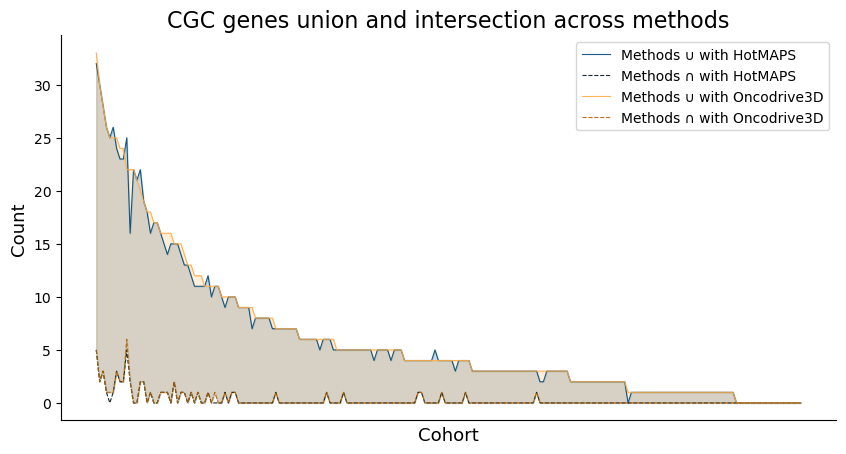

/tmp/jobs/spellegrini/8957745/ipykernel_18271/1975963644.py:61: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


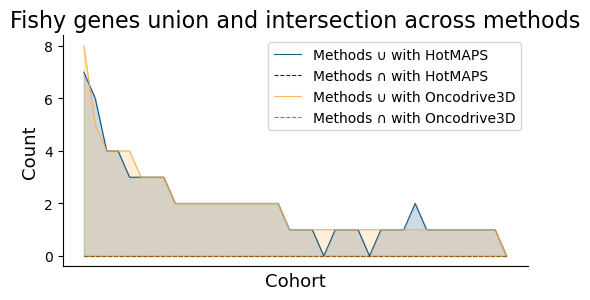

In [151]:
## All cohorts
df_intsec_union_hotmaps = get_union_intsec_hits(genetable.drop(columns=["o3d_rank", "o3d_pval", "o3d_qval"]), 
                                                maf_dir, 
                                                lst_methods=[method for method in lst_methods if method != "o3d"], 
                                                mut_thr=1)

df_intsec_union_o3d = get_union_intsec_hits(genetable.drop(columns=["hotmaps_rank", "hotmaps_pval", "hotmaps_qval"]), 
                                            maf_dir, 
                                            lst_methods=[method for method in lst_methods if method != "hotmaps"], 
                                            mut_thr=1)

plot_union_intsec(intsec_union_df_o3d=df_intsec_union_o3d,
                 intsec_union_df_hotmaps=df_intsec_union_hotmaps,
                 title=f"CGC genes union and intersection across methods", 
                 figsize=(10, 5), 
                 plot_xticks=False, 
                 top_cohorts=None,
                 xfsize=13, 
                 extract_cancer=False,
                 target="cgc",
                 scatter=False)

plot_union_intsec(intsec_union_df_o3d=df_intsec_union_o3d,
                 intsec_union_df_hotmaps=df_intsec_union_hotmaps,
                 title=f"Fishy genes union and intersection across methods", 
                 figsize=(6, 3), 
                 plot_xticks=False, 
                 top_cohorts=38,
                 xfsize=13, 
                 extract_cancer=False,
                 target="fish",
                 scatter=False)

# Number of detected genes

## Functions

In [104]:
## Get hits

def get_unique_hits(df, qval_lst_name):
    
    # Initialize a dictionary to store the sums
    sums_by_method = {}

    # Iterate through each p-value column
    for column in qval_lst_name:
        # Filter rows where the p-value is lower than 0.01 and drop duplicates in the 'Gene' column
        filtered_df = df[df[column] < 0.01].drop_duplicates(subset='Gene')
        sum_pvalues = len(filtered_df)

        # Store the sum in the dictionary with the method name as the key
        sums_by_method[column] = sum_pvalues
        
    return pd.DataFrame(sums_by_method, index=[0])
    

def get_hits_summary(cohort_df, lst_name, alpha = 0.01, unknown = True, unique = False):
    """
    Get the count of significant genes for each method 
    for both p-values and q-values, all genes and CGC genes.
    """

    # Get qvals hits, CGC, and Fishy count
    
    qval_lst_name = [f"{name}_qval" for name in lst_name]
    
    if unique:
        if unknown:
            cohort_df_no_annot = cohort_df[(cohort_df["CGC"] == 0) & (cohort_df["Fish"] == 0)]
            qval_hits = get_unique_hits(cohort_df_no_annot, qval_lst_name)
        else:
            qval_hits = get_unique_hits(cohort_df, qval_lst_name)
        cohort_hits_cgc = cohort_df[(cohort_df["CGC"] == 1)]
        qval_hits_cgc = get_unique_hits(cohort_hits_cgc, qval_lst_name)
        qval_hits_cgc.columns = [f"{col}_cgc" for col in qval_hits_cgc.columns]
        cohort_hits_fish = cohort_df[(cohort_df["Fish"] == 1)]
        qval_hits_fish = get_unique_hits(cohort_hits_fish, qval_lst_name)
        qval_hits_fish.columns = [f"{col}_fish" for col in qval_hits_fish.columns]
        
        return pd.concat((qval_hits, qval_hits_cgc, qval_hits_fish), axis=1)
    
    else:
        if unknown:
            cohort_df_no_annot = cohort_df[(cohort_df["CGC"] == 0) & (cohort_df["Fish"] == 0)]
            qval_hits = cohort_df_no_annot[[s for s in qval_lst_name if s in cohort_df.columns]].apply(lambda x: x < alpha).sum()
        else:
            qval_hits = cohort_df[[s for s in qval_lst_name if s in cohort_df.columns]].apply(lambda x: x < alpha).sum()
        qval_hits_cgc = cohort_df[[s for s in qval_lst_name if s in cohort_df.columns]].apply(lambda x: cohort_df.loc[x < alpha, "CGC"]).sum()
        qval_hits_cgc.index = [f"{i}_cgc" for i in qval_hits_cgc.index]
        qval_hits_fish = cohort_df[[s for s in qval_lst_name if s in cohort_df.columns]].apply(lambda x: cohort_df.loc[x < alpha, "Fish"]).sum()
        qval_hits_fish.index = [f"{i}_fish" for i in qval_hits_fish.index]
        
        return pd.DataFrame(pd.concat((qval_hits, qval_hits_cgc, qval_hits_fish))).T


def get_hits_summary_lst_cohorts(genetable,
                                 lst_name,
                                 overlaps_all = False,
                                 alpha = 0.01,
                                 unknown = True,
                                 unique = False):
    """
    Get count of significant genes (pvals and qvals) and 
    count and ratio of significant genes in CGC across 
    each method and all provided cohorts.
    """
    
    # Get some of unique genes across all cohorts
    if unique:
        hits_df = get_hits_summary(genetable, lst_name, alpha = alpha, unknown = unknown, unique = True)
        hits_df.insert(0, "Cohort", "All_cohorts")
        
        return hits_df
    
    # Get som of genes-cohorts
    else:
        lst_cohort_result = []
        for cohort in tqdm(genetable.Cohort.unique()):

            table_df = genetable[genetable["Cohort"] == cohort]

            if len(table_df) > 0:

                # Get hits summary table
                hits_df = get_hits_summary(table_df, lst_name, alpha = alpha, unknown = unknown, unique = False)
                hits_df.insert(0, "Cohort", cohort)
                lst_cohort_result.append(hits_df)
        
        if len(lst_cohort_result) > 0:
            return pd.concat(lst_cohort_result).reset_index(drop=True)


def get_sum_by_annotation(hits_df, lst_name, unknown=True):

    df = hits_df.copy()
    cols = [f"{name}_qval" for name in lst_name]
    cols_cgc = [f"{name}_qval_cgc" for name in lst_name]
    cols_fish = [f"{name}_qval_fish" for name in lst_name]
        
    df_sum = pd.DataFrame(df[cols].sum()).reset_index().rename(columns = {"index" : "Method", 0 : "Count"})
    if unknown:
        df_sum["Gene"] = "Unknown"
    else:
        df_sum["Gene"] = "Any"
    
    df_sum_cgc = df[cols_cgc].sum()
    df_sum_cgc.index = cols
    df_sum_cgc = pd.DataFrame(df_sum_cgc).reset_index().rename(columns = {"index" : "Method", 0 : "Count"})
    df_sum_cgc["Gene"] = "CGC"

    df_sum_fish = df[cols_fish].sum()
    df_sum_fish.index = cols
    df_sum_fish = pd.DataFrame(df_sum_fish).reset_index().rename(columns = {"index" : "Method", 0 : "Count"})
    df_sum_fish["Gene"] = "Fish"

    df_sum = pd.concat((df_sum, df_sum_cgc, df_sum_fish))
    
    return df_sum

In [105]:
def ema_smooth(scalars, weight):
    """
    EMA implementation according to
    https://github.com/tensorflow/tensorboard/blob/34877f15153e1a2087316b9952c931807a122aa7/tensorboard/components/vz_line_chart2/line-chart.ts#L699
    
    NB: copied from stack-overflow
    """
    
    last = 0
    smoothed = []
    num_acc = 0
    for next_val in scalars:
        last = last * weight + (1 - weight) * next_val
        num_acc += 1
        # de-bias
        debias_weight = 1
        if weight != 1:
            debias_weight = 1 - math.pow(weight, num_acc)
        smoothed_val = last / debias_weight
        smoothed.append(smoothed_val)

    return smoothed


def get_zorder(col):
    """
    Prioritize order of the clustering methods
    """
    
    if col == "o3d":
            zorder = 3
    elif col == "hotmaps":
        zorder = 2
    elif col == "clustl":
        zorder = 1
    else:
        zorder = 0
        
    return zorder
    

def get_count(df_sum, method, annotation, overlap, unique=False):
    
    if unique:
        return df_sum[(df_sum["Method"] == f"{method}") & (df_sum["Gene"] == annotation) & (df_sum["Overlap"] == overlap)].Count.values[0]
        
    return df_sum[(df_sum["Method"] == f"{method}") & (df_sum["Gene"] == annotation) & (df_sum["Overlap"] == overlap)].Count.values[0]

    
def plot_hits_barplot(genetable_df, lst_name, dict_name, 
                      figsize=[9,5], 
                      sort=True, 
                      legend_box=(1.6, 1.05), 
                      unknown=True,
                      vspace_annotation=18,
                      title=None,
                      unique=False,
                      filename="hits_stacked_barplot.png"):

    genetable = genetable_df.copy()
    cols = [f"{name}_qval" for name in lst_name]
    cols_cgc = [f"{name}_qval_cgc" for name in lst_name]
    cols_fish = [f"{name}_qval_fish" for name in lst_name]

    # Get sum df
    pval_cols = [f"{col}_pval" for col in lst_methods]
    genetable_overlap = genetable.dropna(subset=[f"{col}_pval" for col in lst_methods])
    genetable_no_overlap = genetable[genetable[pval_cols].isna().any(axis=1)]
    hits_df_overlap = get_hits_summary_lst_cohorts(genetable_overlap, lst_methods, unknown=unknown, unique=unique)
    hits_df_no_overlap = get_hits_summary_lst_cohorts(genetable_no_overlap, lst_methods, unknown=unknown, unique=unique)
    
    df_sum_overlap = get_sum_by_annotation(hits_df_overlap, lst_methods, unknown=unknown)
    df_sum_no_overlap = get_sum_by_annotation(hits_df_no_overlap, lst_methods, unknown=unknown)
    df_sum_overlap["Overlap"] = "Yes"
    df_sum_no_overlap["Overlap"] = "No"

    df_sum = pd.concat((df_sum_overlap, df_sum_no_overlap)).reset_index(drop=True)    
        
    # Get counts by annotation and overlap for each method
    if unknown:
        unknown_annotation = "Unknown"
    else:
        unknown_annotation = "Any"
    if sort:
        lst_name = list(df_sum[df_sum["Gene"] == "CGC"].groupby("Method").sum().sort_values(by=["Count"], ascending=False).index)
    cgc = np.array([get_count(df_sum, method, annotation="CGC", overlap="Yes") for method in lst_name])
    cgc_no_overlap = np.array([get_count(df_sum, method, annotation="CGC", overlap="No") for method in lst_name])
    fish = np.array([get_count(df_sum, method, annotation="Fish", overlap="Yes") for method in lst_name])
    fish_no_overlap = np.array([get_count(df_sum, method, annotation="Fish", overlap="No") for method in lst_name])
    unknown = np.array([get_count(df_sum, method, annotation=unknown_annotation, overlap="Yes") for method in lst_name])
    unknown_no_overlap = np.array([get_count(df_sum, method, annotation=unknown_annotation, overlap="No") for method in lst_name])

    barplot_hits_stacked_dodge(unknown, unknown_no_overlap,
                               cgc, cgc_no_overlap,
                               fish, fish_no_overlap,
                               lst_name,
                               dict_name,
                               unknown_annotation,
                               figsize=figsize,
                               legend_box=legend_box,
                               vspace_annotation=vspace_annotation,
                               title=title,
                               unique=unique,
                               filename=filename)
    

def barplot_hits_stacked_dodge(unknown, unknown_no_overlap,
                               cgc, cgc_no_overlap,
                               fish, fish_no_overlap,
                               lst_name,
                               dict_name,
                               unknown_annotation="Unknown",
                               figsize=(12,6),
                               legend_box=(1, 1.05),
                               vspace_annotation=18,
                               title=None,
                               unique=False,
                               filename="hits_stacked_barplot.png"):

    lst_all_values = unknown, unknown_no_overlap, cgc, cgc_no_overlap, fish, fish_no_overlap
    n_methods = len(unknown)

    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    plt.figure(figsize=figsize)
    with sns.axes_style("white"):
        sns.set_context("talk")   
        sns.set_style("ticks")

        # Plot details
        bar_width = 0.3
        epsilon = .005
        line_width = 1
        unknown_bar_positions = np.arange(len(unknown))
        cgc_bar_positions = unknown_bar_positions + bar_width
        fish_bar_positions = cgc_bar_positions + bar_width

        # Bar plots
        ax = plt.gca()
        unknown_bar = plt.bar(unknown_bar_positions, unknown, bar_width,
                              color="lightgray",
                              label=unknown_annotation)
        unknown_bar = plt.bar(unknown_bar_positions, unknown_no_overlap, bar_width-epsilon,
                              bottom=unknown,
                              color="lightgray",
                              edgecolor='white',
                              linewidth=line_width,
                              hatch='//')

        cgc_bar = plt.bar(cgc_bar_positions, cgc, bar_width,
                               color=colors[1],
                               label='CGC')
        cgc_bar = plt.bar(cgc_bar_positions, cgc_no_overlap, bar_width-epsilon,
                               bottom=cgc,
                               color=colors[1],
                               hatch='//',
                               edgecolor='white',
                               linewidth=line_width+0.5)

        fish_bar = plt.bar(fish_bar_positions, fish, bar_width,
                               color=colors[2],
                               label='Fishy')
        fish_bar = plt.bar(fish_bar_positions, fish_no_overlap, bar_width-epsilon,
                               bottom=fish,
                               color=colors[2],
                               hatch='//',
                               edgecolor='white',
                               linewidth=line_width+0.5)

        # Add annotations on top of each bar
        up = 1, 3, 5, 7
        down = 0, 2, 4, 6 
        max_sum_bar = 0

        for i, p in enumerate(ax.patches):

            method_ix = i%n_methods
            label_ix = int(i / n_methods)

            if label_ix%2 > 0:
                n=-1
            else:
                n=1

            sum_bar = lst_all_values[label_ix][method_ix] + lst_all_values[label_ix+n][method_ix]

            if label_ix in up:
                pass
                #sum_bar += vspace_annotation
            else:
                continue

            if sum_bar > max_sum_bar:
                max_sum_bar = sum_bar

            ax.annotate(format(sum_bar, '.0f'),                
                        (p.get_x() + p.get_width() / 2., sum_bar),
                        ha = 'center', va = 'center',
                        xytext = (0, 10),
                        textcoords = 'offset points',
                        fontsize=12)

        handles, labels = ax.get_legend_handles_labels()
        handles.append(mpatches.Patch(facecolor='white', edgecolor='black', label='Processed by all methods'))
        handles.append(mpatches.Patch(facecolor='white', edgecolor='black', hatch='//', label="Processed by a subset of methods"))

        if unique:
            plt.ylabel("Unique genes count", fontsize = 15)
        else:
            plt.ylabel("Genes-cohorts count", fontsize = 15)

        plt.yticks(fontsize=14)      
        plt.xticks((unknown_bar_positions+cgc_bar_positions+fish_bar_positions)/3, 
                   [dict_name[name.split("_")[0]] for name in lst_name], 
                   rotation=45, 
                   fontsize=14,
                   rotation_mode="anchor", 
                   ha='right')
        plt.legend(handles=handles, bbox_to_anchor=legend_box, fontsize=14)
        plt.title(title, fontsize=16)
        sns.despine()
        ax.spines['left'].set_linewidth(1) 
        ax.spines['bottom'].set_linewidth(1) 
        ax.tick_params(axis='both', which='both', width=1)
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        plt.show()


def plot_hits_summary(df, name_dic, color_dic,
                      smooth = False, ema_w = 0.7,
                      figsize = (17, 8), legend_fontsize = 12, legend_ncol = 1,
                      title = None, 
                      style = "o-",
                      plot_xticks = False, 
                      extract_cancer = False,
                      rm_zero_rows = True,
                      legend_box = (1, 1),
                      filename='hits_summary_by_cohort.png'):
       
    plt.rcdefaults()
    df = df.copy()
    if extract_cancer:
        df["Cohort"] = df["Cohort"].apply(lambda x: x.split("_")[len(x.split("_"))-1])
    df = df.set_index("Cohort")

    if rm_zero_rows:
        df = df[~(df == 0).all(axis=1)]
        
    # Sort cohorts by total across methods 
    cols = df.columns
    df["Total"] = df.iloc[:, 1:].sum(axis = 1)
    df = df.sort_values("Total", ascending=False).drop(columns = ["Total"])
    
    # Compute average of each method then drop NA
    methods_sum = df.sum(numeric_only = True)
    methods_sum.index = cols
    df = df[~df.isna().any(axis=1)]
    
    # Plot
    plt.figure(figsize = figsize)
    
    # Sort cols
    cols_avg = np.mean(df, axis=0)
    cols_order = np.argsort(cols_avg)[::-1]
    df = df.iloc[:, cols_order]

    for col in df.columns:
        if smooth:
            y = ema_smooth(df[col], ema_w)     
        else: 
            y = df[col]
        method_name = name_dic[col.split("_")[0]]
        
        if method_name in ["HotMAPS", "Oncodrive3D", "OncodriveCLUSTL", "Random"]:
            alpha=1
            #label = f"{method_name} (Sum = {int(methods_sum[col])})"
            label = f"{method_name}"
        else:
            alpha=0.7
            label = None
            label = f"{method_name}"
        
        plt.plot(df.index, y, style, color = color_dic[method_name], label = label, zorder = get_zorder(col.split("_")[0]), alpha=alpha)
        
    # Plot details
    plt.legend(fontsize = legend_fontsize, ncol = legend_ncol, bbox_to_anchor=legend_box)
    if plot_xticks:    
        plt.xticks(rotation=45, rotation_mode="anchor", ha='right', fontsize=10) 
    else:
        plt.xticks([])
    plt.yticks(fontsize=13)
    plt.ylabel("Count", fontsize = 14)
    plt.xlabel("Cohort", fontsize = 14)
    plt.title(title, fontsize = 15)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

## Total number

In [108]:
if "random" in lst_methods:
    lst_methods.remove("random")

### Human raw

100%|███████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 16.51it/s]


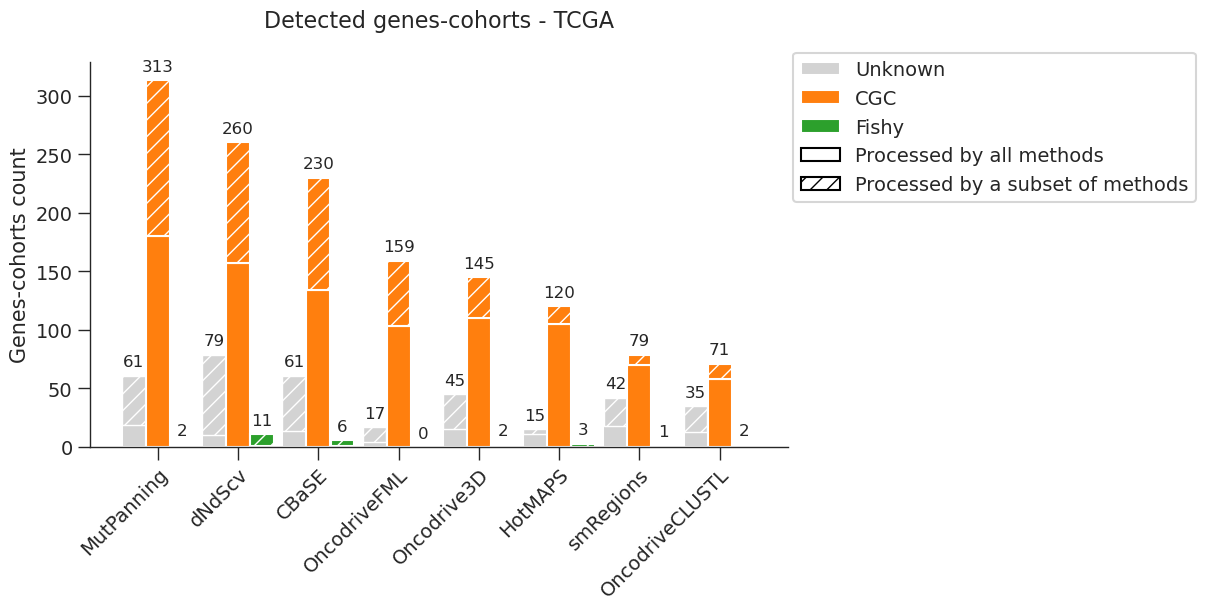

100%|█████████████████████████████████████████████████████████████████| 268/268 [01:38<00:00,  2.71it/s]


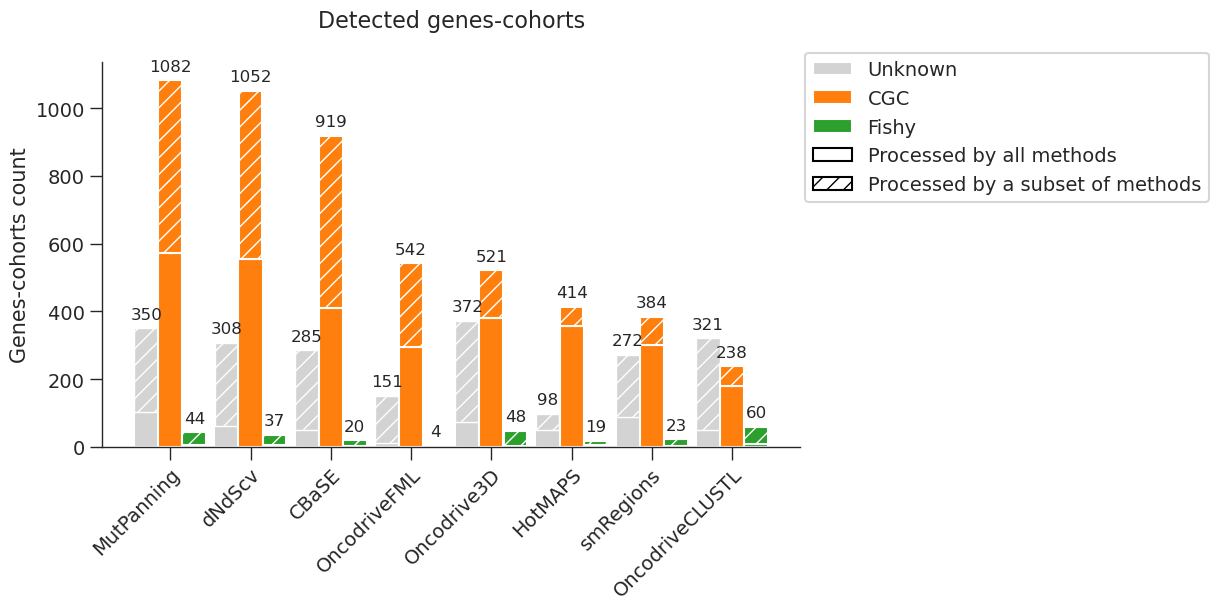

100%|█████████████████████████████████████████████████████████████████| 215/215 [01:04<00:00,  3.35it/s]


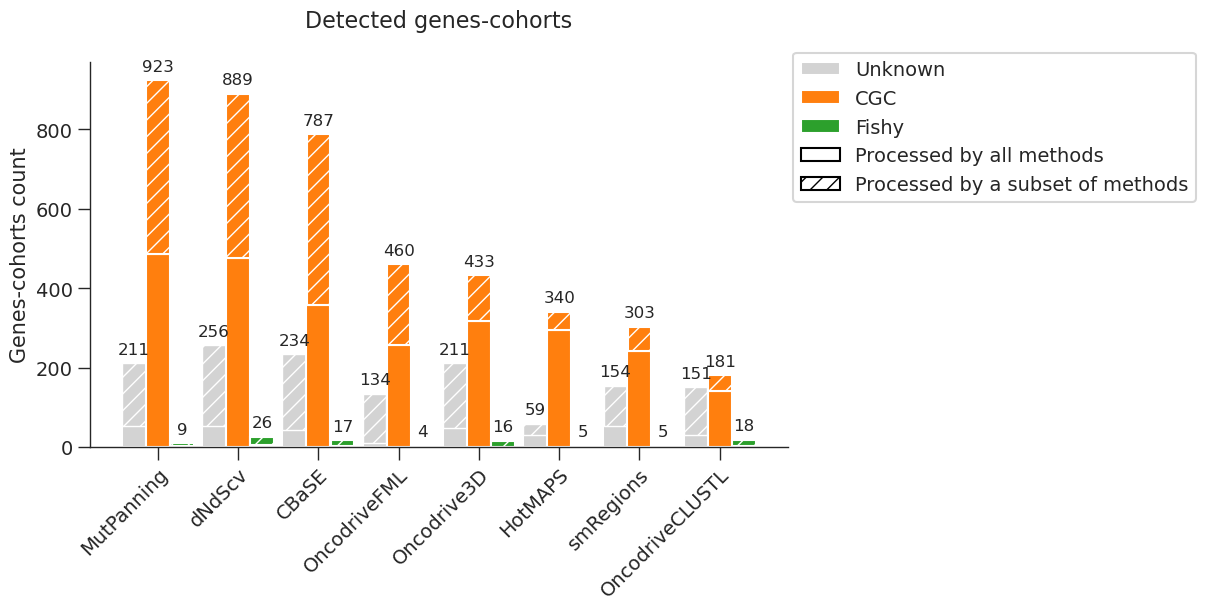

In [51]:
# MANE raw TCGA
plot_hits_barplot(genetable_subset, lst_methods, names_dic, 
                  title="Detected genes-cohorts - TCGA\n", 
                  filename="plots/number_detected/hits_stacked_barplot_tcga")

# MANE raw all cohorts
plot_hits_barplot(genetable, lst_methods, names_dic, vspace_annotation=50, 
                  title="Detected genes-cohorts\n")

# MANE raw all cohorts no ICGC
plot_hits_barplot(genetable_noicgc, lst_methods, names_dic, vspace_annotation=50, 
                  title="Detected genes-cohorts\n",
                  filename="plots/number_detected/hits_stacked_barplot_noicgc") 

### MANE raw

100%|███████████████████████████████████████████████████████████████████| 32/32 [00:01<00:00, 16.54it/s]


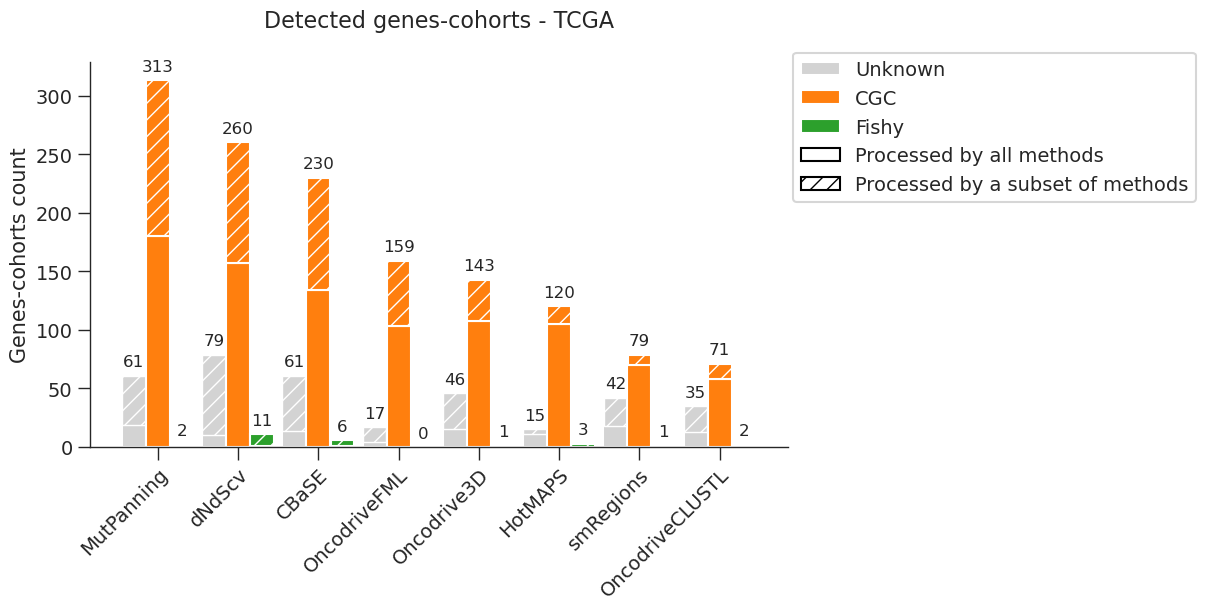

In [114]:
# MANE raw TCGA
plot_hits_barplot(genetable_subset, lst_methods, names_dic, 
                  title="Detected genes-cohorts - TCGA\n", 
                  filename="plots/number_detected/hits_stacked_barplot_tcga")

100%|█████████████████████████████████████████████████████████████████| 215/215 [01:02<00:00,  3.46it/s]


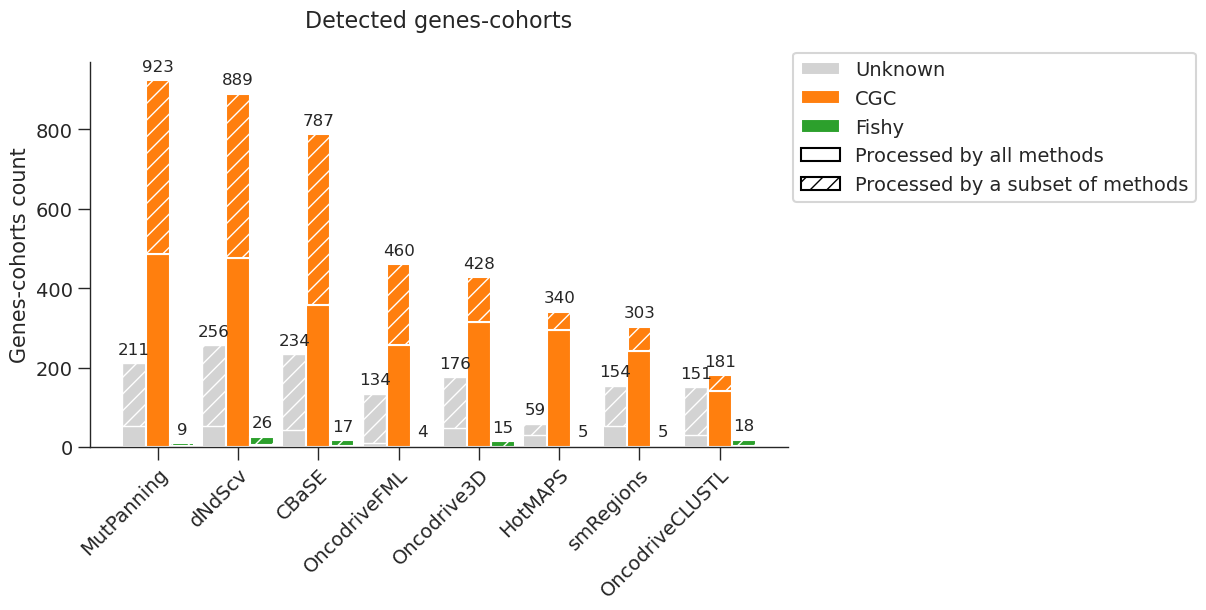

In [116]:
# MANE raw all cohorts
plot_hits_barplot(genetable, lst_methods, names_dic, vspace_annotation=50, 
                  title="Detected genes-cohorts\n", 
                  filename="plots/number_detected/hits_stacked_barplot")

## Number by cohort

### TCGA

100%|███████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 70.48it/s]


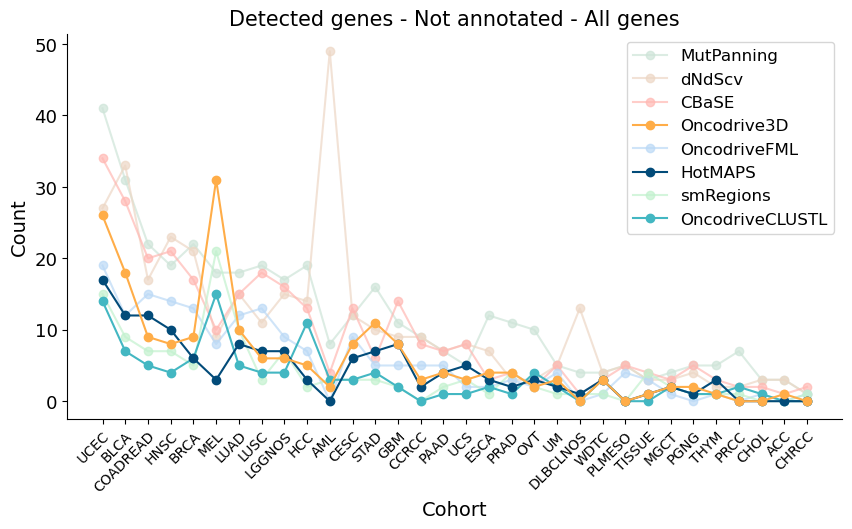

In [117]:
# TCGA colored
# ============

# Names and colors

colors_dic = {"Oncodrive3D" : "#ffad48", 
              "HotMAPS" : "#024b79", 
              "OncodriveCLUSTL" : "#43b7c2", 
              "smRegions" : "#c2f1ce", 
              "CBaSE" : "#ffb8b3", 
              "SEISMIC" : "#ede5ff", 
              "dNdScv" : "#edd7c5", 
              "MutPanning" : "#cee4d8", 
              "OncodriveFML" : "#bbd9f6",
              "Random" : "pink"}

names_dic = {"o3d" : "Oncodrive3D", 
             "hotmaps" : "HotMAPS", 
             "clustl" : "OncodriveCLUSTL", 
             "smreg" : "smRegions", 
             "cbase" : "CBaSE", 
             "seismic" : "SEISMIC", 
             "dndscv" : "dNdScv", 
             "mutpan" : "MutPanning", 
             "fml" : "OncodriveFML",
             "random" : "Random"}

## TCGA
df = genetable_subset.copy()
hits_df = get_hits_summary_lst_cohorts(df, lst_methods, unknown=False, unique=False)

df = genetable_subset.copy()
df = df.dropna(subset=[f"{name}_qval" for name in lst_methods])
hits_df_overlap = get_hits_summary_lst_cohorts(df, lst_methods, unknown=False, unique=False)

# Not annotated

cols = [f"{name}_qval" for name in lst_methods]
plot_hits_summary(hits_df[["Cohort"] + cols], names_dic, colors_dic,
                  smooth = False, figsize = (10, 5), title = "Detected genes - Not annotated - All genes", 
                  plot_xticks=True, rm_zero_rows=False, extract_cancer=True)

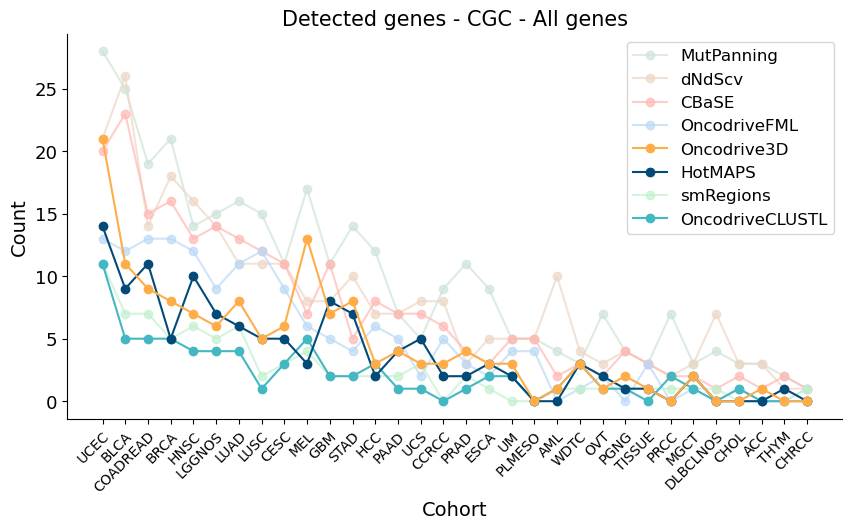

In [118]:
# CGC

cols = [f"{name}_qval_cgc" for name in lst_methods]
plot_hits_summary(hits_df[["Cohort"] + cols], names_dic, colors_dic,
                  smooth = False, figsize = (10, 5), title = "Detected genes - CGC - All genes", 
                  plot_xticks=True, rm_zero_rows=False, extract_cancer=True,
                  filename="plots/number_detected/cgc_hits_summary_tcga_colors.png")


# cols = [f"{name}_qval_cgc" for name in lst_methods]
# plot_hits_summary(hits_df_overlap[["Cohort"] + cols], names_dic, colors_dic,
#                   smooth = False, figsize = (10, 5), title = "Detected genes - CGC - Genes overlap", 
#                   plot_xticks=True, rm_zero_rows=False, extract_cancer=True)

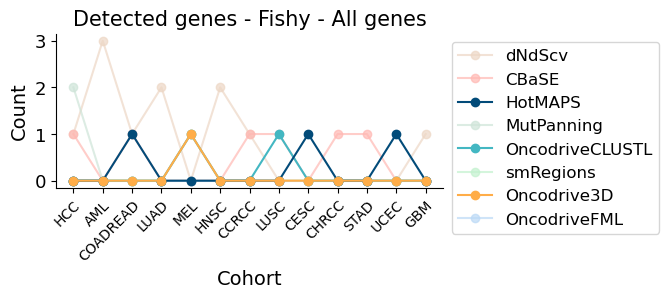

In [120]:
# Fish

cols = [f"{name}_qval_fish" for name in lst_methods]
plot_hits_summary(hits_df[["Cohort"] + cols], names_dic, colors_dic,
                  smooth = False, figsize = (5, 2), title = "Detected genes - Fishy - All genes", 
                  plot_xticks=True, rm_zero_rows=True, extract_cancer=True,
                  filename="plots/number_detected/fishy_hits_summary_colors.png")

# cols = [f"{name}_qval_fish" for name in lst_methods]
# plot_hits_summary(hits_df_overlap[["Cohort"] + cols], names_dic, colors_dic,
#                   smooth = False, figsize = (1.6, 1.5), title = "Detected genes - Fishy - Genes overlap", 
#                   plot_xticks=True, rm_zero_rows=True, extract_cancer=True)

100%|███████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 70.17it/s]


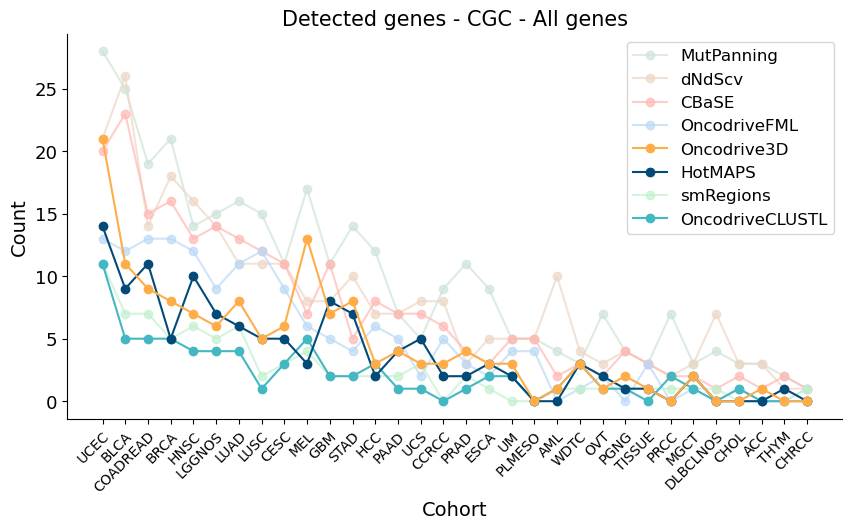

In [121]:
# TCGA not colored
# ================

df = genetable_subset.copy()
hits_df = get_hits_summary_lst_cohorts(df, lst_methods, unknown=False, unique=False)

df = genetable_subset.copy()
df = df.dropna(subset=[f"{name}_qval" for name in lst_methods])
hits_df_overlap = get_hits_summary_lst_cohorts(df, lst_methods, unknown=False, unique=False)

# # Not annotated

# cols = [f"{name}_qval" for name in lst_methods]
# plot_hits_summary(hits_df[["Cohort"] + cols], names_dic, colors_dic,
#                   smooth = False, figsize = (10, 5), title = "Detected genes - Not annotated - All genes", 
#                   plot_xticks=True, rm_zero_rows=False, extract_cancer=True)

# cols = [f"{name}_qval" for name in lst_methods]
# plot_hits_summary(hits_df_overlap[["Cohort"] + cols], names_dic, colors_dic,
#                   smooth = False, figsize = (10, 5), title = "Detected genes - Not annotated - Genes overlap", 
#                   plot_xticks=True, rm_zero_rows=False, extract_cancer=True)

# CGC

cols = [f"{name}_qval_cgc" for name in lst_methods]
plot_hits_summary(hits_df[["Cohort"] + cols], names_dic, colors_dic,
                  smooth = False, figsize = (10, 5), title = "Detected genes - CGC - All genes", 
                  plot_xticks=True, rm_zero_rows=False, extract_cancer=True)


# cols = [f"{name}_qval_cgc" for name in lst_methods]
# plot_hits_summary(hits_df_overlap[["Cohort"] + cols], names_dic, colors_dic,
#                   smooth = False, figsize = (10, 5), title = "Detected genes - CGC - Genes overlap", 
#                   plot_xticks=True, rm_zero_rows=False, extract_cancer=True)

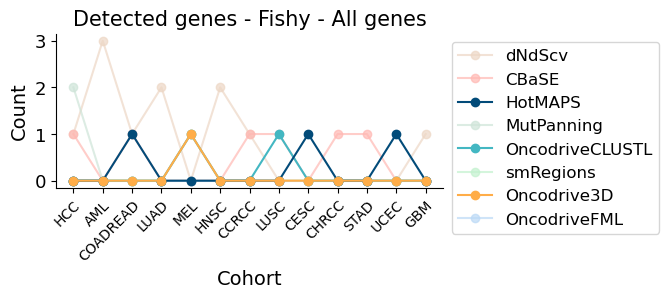

In [122]:
# Fish

cols = [f"{name}_qval_fish" for name in lst_methods]
plot_hits_summary(hits_df[["Cohort"] + cols], names_dic, colors_dic,
                  smooth = False, figsize = (5, 2), title = "Detected genes - Fishy - All genes", 
                  plot_xticks=True, rm_zero_rows=True, extract_cancer=True)

### All cohorts

100%|█████████████████████████████████████████████████████████████████| 153/153 [00:02<00:00, 68.31it/s]


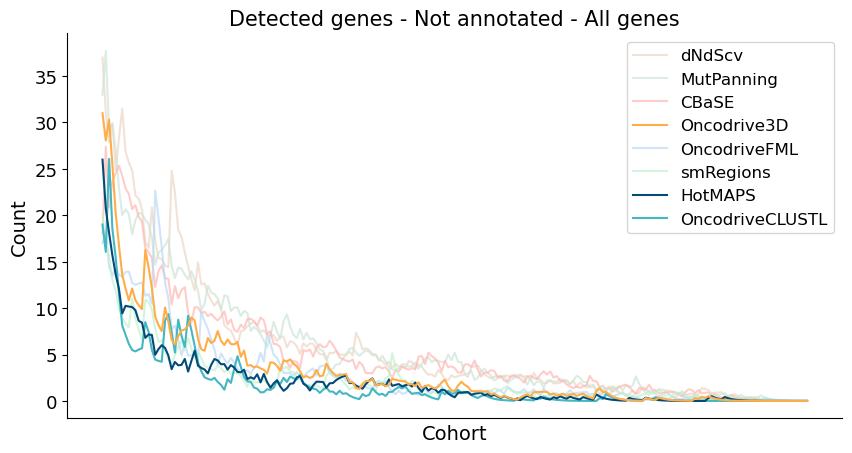

In [123]:
## All cohorts
df = genetable.copy()
hits_df = get_hits_summary_lst_cohorts(df, lst_methods, unknown=False, unique=False)

df = df.dropna(subset=[f"{name}_qval" for name in lst_methods])
hits_df_overlap = get_hits_summary_lst_cohorts(df, lst_methods, unknown=False, unique=False)

# Not annotated

cols = [f"{name}_qval" for name in lst_methods]
plot_hits_summary(hits_df[["Cohort"] + cols], names_dic, colors_dic,
                  smooth = True, figsize = (10, 5), title = "Detected genes - Not annotated - All genes", 
                  plot_xticks=False, rm_zero_rows=False, style="-",
                  filename="plots/number_detected/notannot_hits_summary.png")

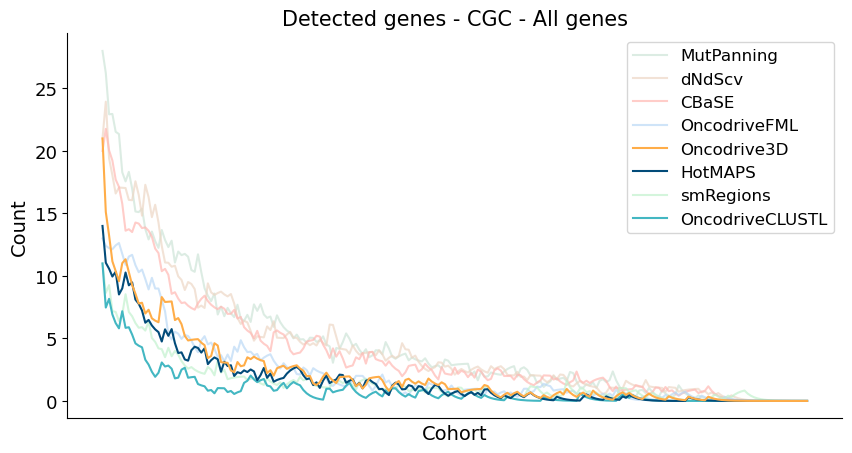

In [124]:
# CGC

cols = [f"{name}_qval_cgc" for name in lst_methods]
plot_hits_summary(hits_df[["Cohort"] + cols], names_dic, colors_dic,
                  smooth = True, figsize = (10, 5), title = "Detected genes - CGC - All genes", 
                  plot_xticks=False, rm_zero_rows=False, style="-",
                  filename="plots/number_detected/cgc_hits_summary.png")

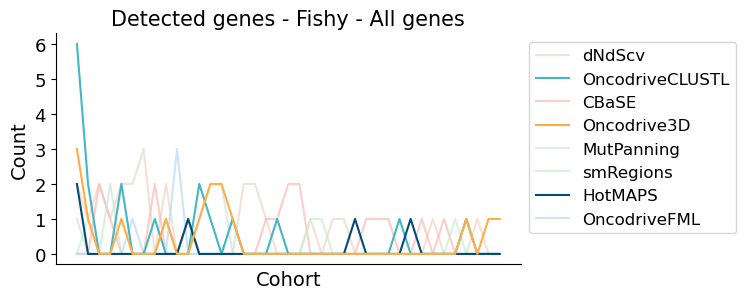

In [125]:
# Fish

cols = [f"{name}_qval_fish" for name in lst_methods]
plot_hits_summary(hits_df[["Cohort"] + cols], names_dic, colors_dic,
                  smooth = False, figsize = (6, 3), title = "Detected genes - Fishy - All genes", 
                  plot_xticks=False, rm_zero_rows=True, style="-",
                  filename="plots/number_detected/cgc_hits_summary.png")

100%|█████████████████████████████████████████████████████████████████| 268/268 [01:35<00:00,  2.82it/s]


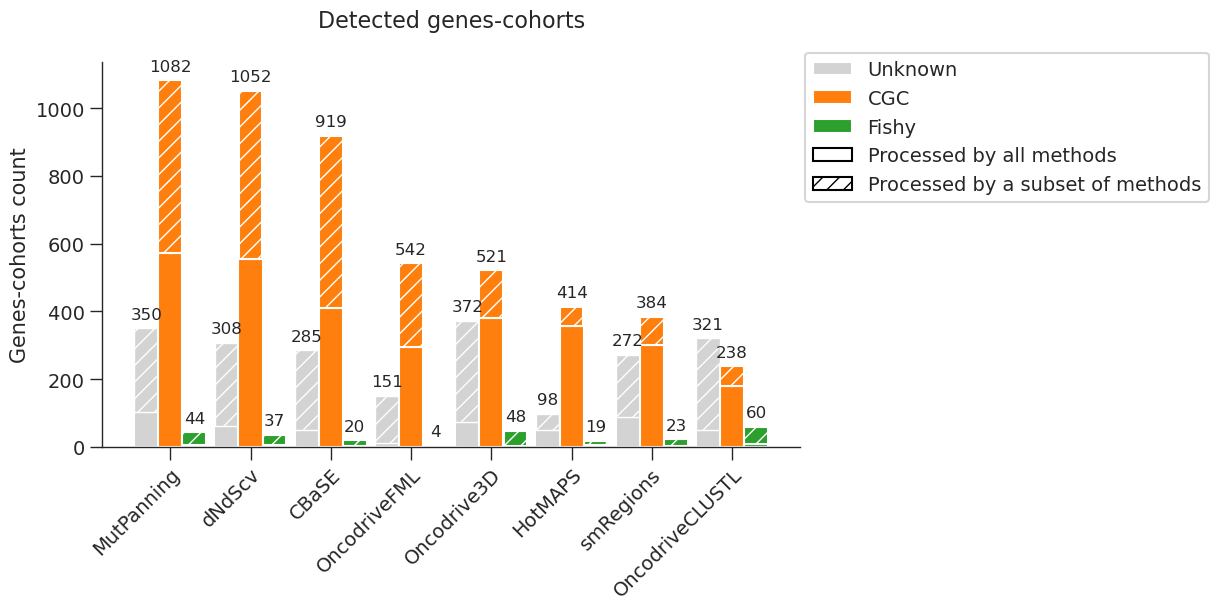

In [67]:
plot_hits_barplot(genetable, lst_methods, names_dic, vspace_annotation=50, title="Detected genes-cohorts\n", filename="hits_stacked_barplot")

100%|█████████████████████████████████████████████████████████████████| 215/215 [01:02<00:00,  3.46it/s]


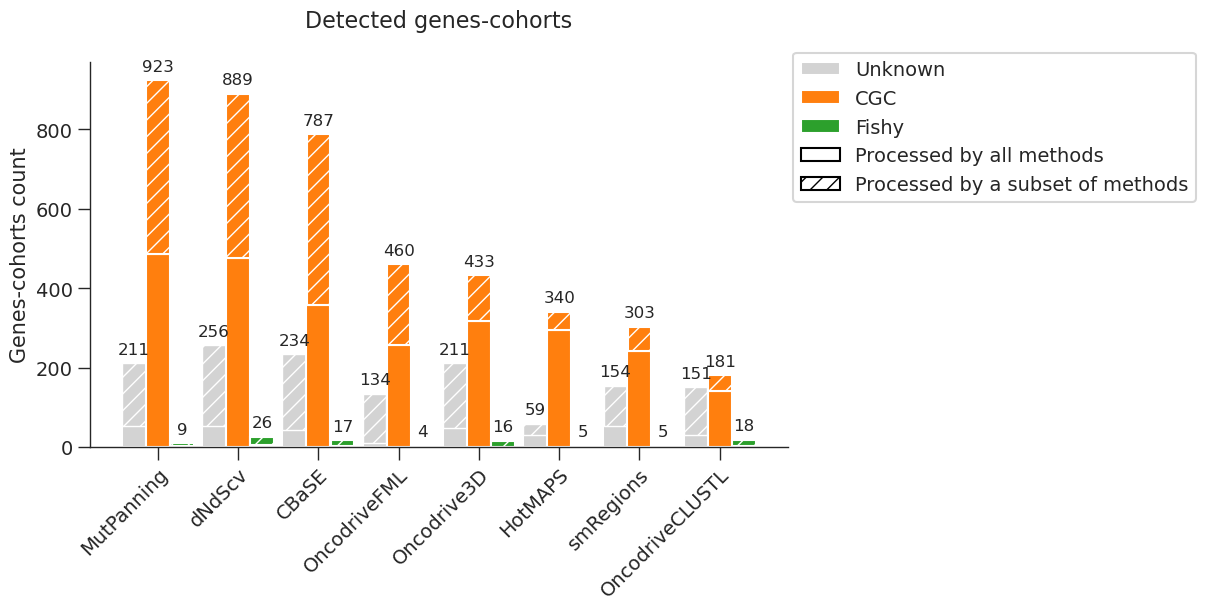

In [71]:
plot_hits_barplot(genetable_noicgc, lst_methods, names_dic, vspace_annotation=50, title="Detected genes-cohorts\n", filename="hits_stacked_barplot") 

100%|████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 61.32it/s]


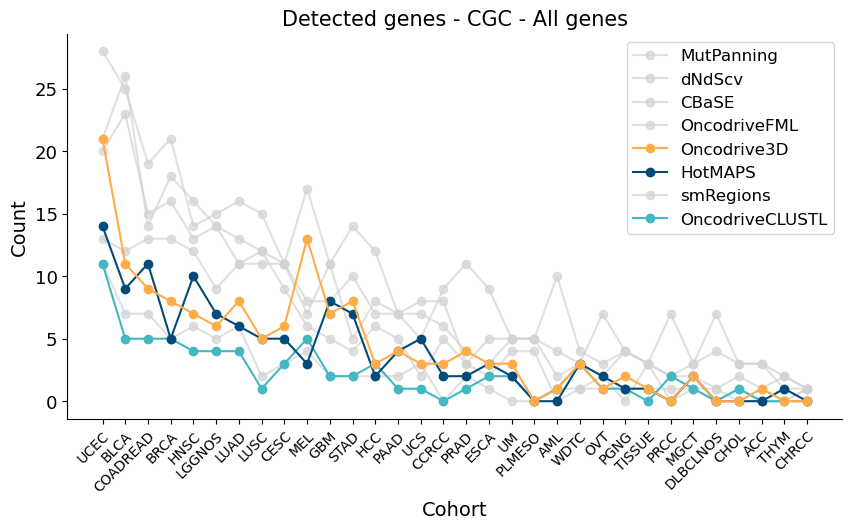

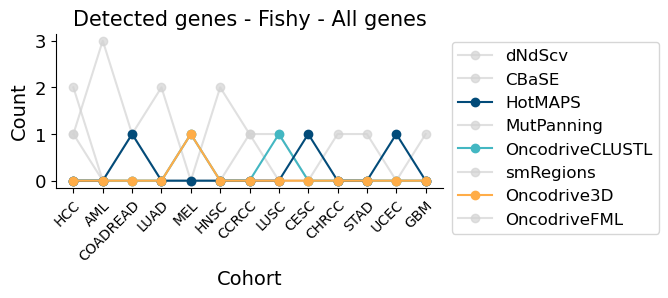

In [270]:
## TCGA
df = genetable_subset.copy()
hits_df = get_hits_summary_lst_cohorts(df, lst_methods, unknown=False, unique=False)

df = genetable_subset.copy()
df = df.dropna(subset=[f"{name}_qval" for name in lst_methods])
hits_df_overlap = get_hits_summary_lst_cohorts(df, lst_methods, unknown=False, unique=False)

# # Not annotated

# cols = [f"{name}_qval" for name in lst_methods]
# plot_hits_summary(hits_df[["Cohort"] + cols], names_dic, colors_dic,
#                   smooth = False, figsize = (10, 5), title = "Detected genes - Not annotated - All genes", 
#                   plot_xticks=True, rm_zero_rows=False, extract_cancer=True)

# cols = [f"{name}_qval" for name in lst_methods]
# plot_hits_summary(hits_df_overlap[["Cohort"] + cols], names_dic, colors_dic,
#                   smooth = False, figsize = (10, 5), title = "Detected genes - Not annotated - Genes overlap", 
#                   plot_xticks=True, rm_zero_rows=False, extract_cancer=True)

# CGC

cols = [f"{name}_qval_cgc" for name in lst_methods]
plot_hits_summary(hits_df[["Cohort"] + cols], names_dic, colors_dic,
                  smooth = False, figsize = (10, 5), title = "Detected genes - CGC - All genes", 
                  plot_xticks=True, rm_zero_rows=False, extract_cancer=True,
                  filename="cgc_hits_summary_tcga_all_methods.png")


# cols = [f"{name}_qval_cgc" for name in lst_methods]
# plot_hits_summary(hits_df_overlap[["Cohort"] + cols], names_dic, colors_dic,
#                   smooth = False, figsize = (10, 5), title = "Detected genes - CGC - Genes overlap", 
#                   plot_xticks=True, rm_zero_rows=False, extract_cancer=True)

# Fish

cols = [f"{name}_qval_fish" for name in lst_methods]
plot_hits_summary(hits_df[["Cohort"] + cols], names_dic, colors_dic,
                  smooth = False, figsize = (5, 2), title = "Detected genes - Fishy - All genes", 
                  plot_xticks=True, rm_zero_rows=True, extract_cancer=True,
                  filename="fishy_hits_summary_all_methods.png")

# cols = [f"{name}_qval_fish" for name in lst_methods]
# plot_hits_summary(hits_df_overlap[["Cohort"] + cols], names_dic, colors_dic,
#                   smooth = False, figsize = (1.6, 1.5), title = "Detected genes - Fishy - Genes overlap", 
#                   plot_xticks=True, rm_zero_rows=True, extract_cancer=True)

100%|████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:02<00:00, 12.34it/s]


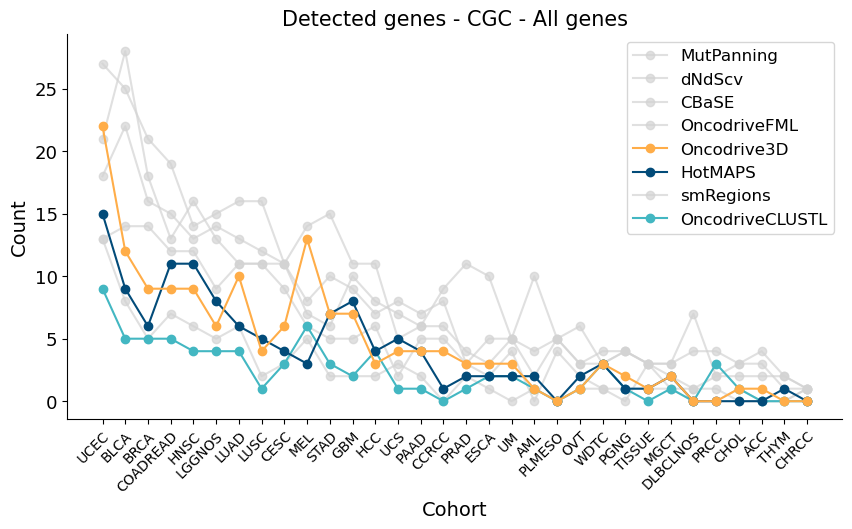

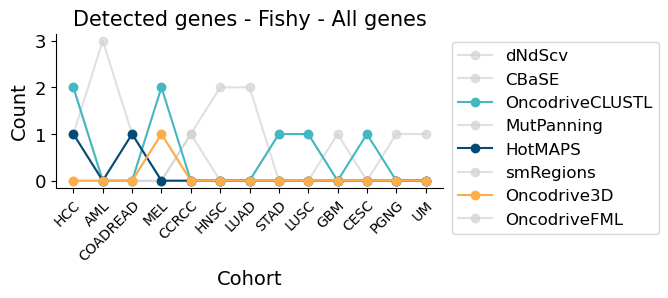

In [271]:
## TCGA
df = genetable_subset_old.copy()
hits_df = get_hits_summary_lst_cohorts(df, lst_methods, unknown=False, unique=False)

# df = genetable_subset.copy()
# df = df.dropna(subset=[f"{name}_qval" for name in lst_methods])
# hits_df_overlap = get_hits_summary_lst_cohorts(df, lst_methods, unknown=False, unique=False)

# # Not annotated

# cols = [f"{name}_qval" for name in lst_methods]
# plot_hits_summary(hits_df[["Cohort"] + cols], names_dic, colors_dic,
#                   smooth = False, figsize = (10, 5), title = "Detected genes - Not annotated - All genes", 
#                   plot_xticks=True, rm_zero_rows=False, extract_cancer=True)

# cols = [f"{name}_qval" for name in lst_methods]
# plot_hits_summary(hits_df_overlap[["Cohort"] + cols], names_dic, colors_dic,
#                   smooth = False, figsize = (10, 5), title = "Detected genes - Not annotated - Genes overlap", 
#                   plot_xticks=True, rm_zero_rows=False, extract_cancer=True)

# CGC

cols = [f"{name}_qval_cgc" for name in lst_methods]
plot_hits_summary(hits_df[["Cohort"] + cols], names_dic, colors_dic,
                  smooth = False, figsize = (10, 5), title = "Detected genes - CGC - All genes", 
                  plot_xticks=True, rm_zero_rows=False, extract_cancer=True,
                  filename="cgc_hits_summary_tcga.png")


# cols = [f"{name}_qval_cgc" for name in lst_methods]
# plot_hits_summary(hits_df_overlap[["Cohort"] + cols], names_dic, colors_dic,
#                   smooth = False, figsize = (10, 5), title = "Detected genes - CGC - Genes overlap", 
#                   plot_xticks=True, rm_zero_rows=False, extract_cancer=True)

# Fish

cols = [f"{name}_qval_fish" for name in lst_methods]
plot_hits_summary(hits_df[["Cohort"] + cols], names_dic, colors_dic,
                  smooth = False, figsize = (5, 2), title = "Detected genes - Fishy - All genes", 
                  plot_xticks=True, rm_zero_rows=True, extract_cancer=True,
                  filename="fishy_hits_summary.png")

# cols = [f"{name}_qval_fish" for name in lst_methods]
# plot_hits_summary(hits_df_overlap[["Cohort"] + cols], names_dic, colors_dic,
#                   smooth = False, figsize = (1.6, 1.5), title = "Detected genes - Fishy - Genes overlap", 
#                   plot_xticks=True, rm_zero_rows=True, extract_cancer=True)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 64.27it/s]


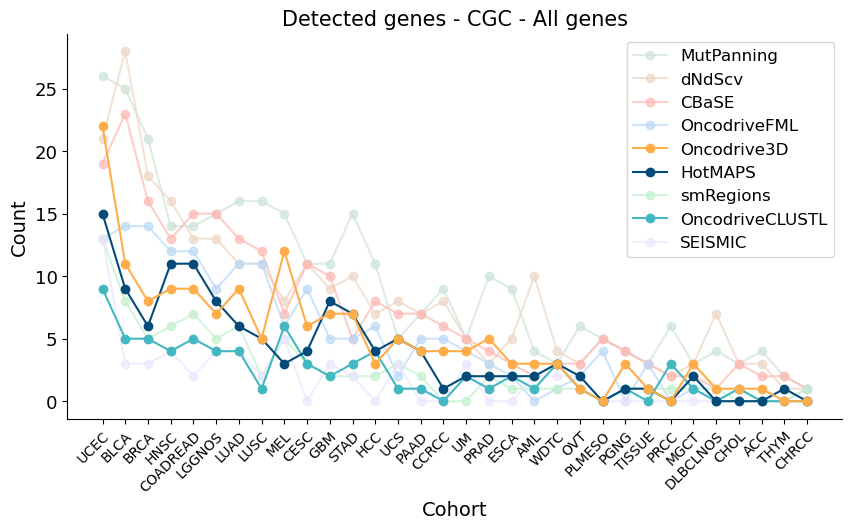

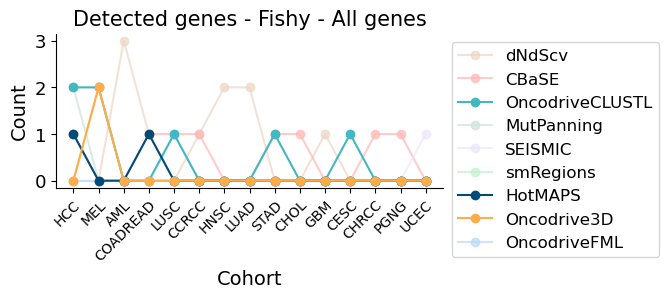

In [163]:
# Names and colors

colors_dic = {"Oncodrive3D" : "#ffad48", 
              "HotMAPS" : "#024b79", 
              "OncodriveCLUSTL" : "#43b7c2", 
              "smRegions" : "#c2f1ce", 
              "CBaSE" : "#ffb8b3", 
              "SEISMIC" : "#ede5ff", 
              "dNdScv" : "#edd7c5", 
              "MutPanning" : "#cee4d8", 
              "OncodriveFML" : "#bbd9f6",
              "Random" : "pink"}

names_dic = {"o3d" : "Oncodrive3D", 
             "hotmaps" : "HotMAPS", 
             "clustl" : "OncodriveCLUSTL", 
             "smreg" : "smRegions", 
             "cbase" : "CBaSE", 
             "seismic" : "SEISMIC", 
             "dndscv" : "dNdScv", 
             "mutpan" : "MutPanning", 
             "fml" : "OncodriveFML",
             "random" : "Random"}


## TCGA
df = genetable_subset.copy()
hits_df = get_hits_summary_lst_cohorts(df, lst_methods, unknown=False, unique=False)

df = genetable_subset.copy()
df = df.dropna(subset=[f"{name}_qval" for name in lst_methods])
hits_df_overlap = get_hits_summary_lst_cohorts(df, lst_methods, unknown=False, unique=False)

# # Not annotated

# cols = [f"{name}_qval" for name in lst_methods]
# plot_hits_summary(hits_df[["Cohort"] + cols], names_dic, colors_dic,
#                   smooth = False, figsize = (10, 5), title = "Detected genes - Not annotated - All genes", 
#                   plot_xticks=True, rm_zero_rows=False, extract_cancer=True)

# cols = [f"{name}_qval" for name in lst_methods]
# plot_hits_summary(hits_df_overlap[["Cohort"] + cols], names_dic, colors_dic,
#                   smooth = False, figsize = (10, 5), title = "Detected genes - Not annotated - Genes overlap", 
#                   plot_xticks=True, rm_zero_rows=False, extract_cancer=True)

# CGC

cols = [f"{name}_qval_cgc" for name in lst_methods]
plot_hits_summary(hits_df[["Cohort"] + cols], names_dic, colors_dic,
                  smooth = False, figsize = (10, 5), title = "Detected genes - CGC - All genes", 
                  plot_xticks=True, rm_zero_rows=False, extract_cancer=True,
                  filename="cgc_hits_summary_tcga_all_methods_colors_07.png")


# cols = [f"{name}_qval_cgc" for name in lst_methods]
# plot_hits_summary(hits_df_overlap[["Cohort"] + cols], names_dic, colors_dic,
#                   smooth = False, figsize = (10, 5), title = "Detected genes - CGC - Genes overlap", 
#                   plot_xticks=True, rm_zero_rows=False, extract_cancer=True)

# Fish

cols = [f"{name}_qval_fish" for name in lst_methods]
plot_hits_summary(hits_df[["Cohort"] + cols], names_dic, colors_dic,
                  smooth = False, figsize = (5, 2), title = "Detected genes - Fishy - All genes", 
                  plot_xticks=True, rm_zero_rows=True, extract_cancer=True,
                  filename="fishy_hits_summary_all_methods_colors_07.png")

# cols = [f"{name}_qval_fish" for name in lst_methods]
# plot_hits_summary(hits_df_overlap[["Cohort"] + cols], names_dic, colors_dic,
#                   smooth = False, figsize = (1.6, 1.5), title = "Detected genes - Fishy - Genes overlap", 
#                   plot_xticks=True, rm_zero_rows=True, extract_cancer=True)

100%|██████████████████████████████████████████████████████████████████████████████████████| 268/268 [02:19<00:00,  1.92it/s]


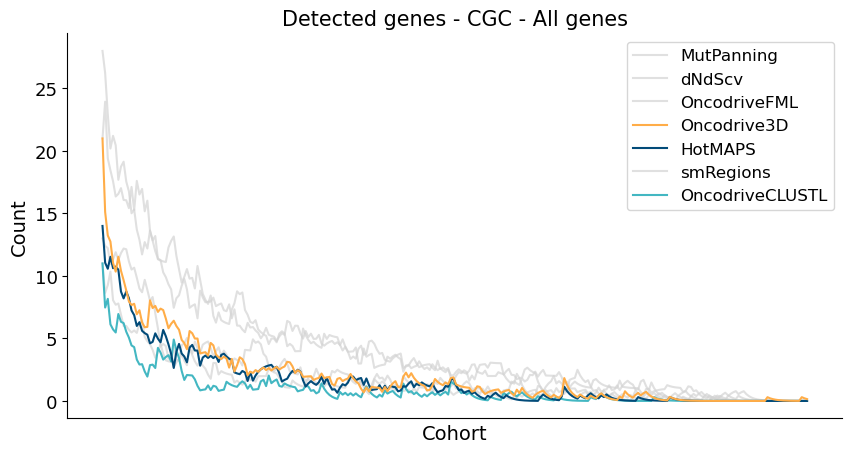

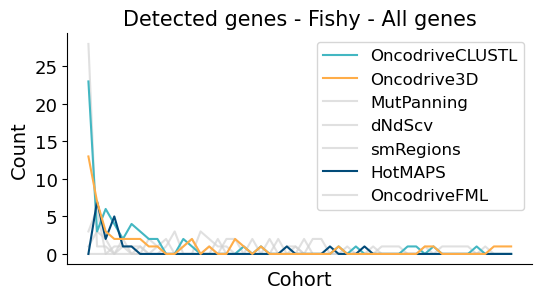

In [169]:
# New

## All cohorts
df = genetable.copy()
hits_df = get_hits_summary_lst_cohorts(df, lst_methods, unknown=False, unique=False)

# df = genetable.copy()
# df = df.dropna(subset=[f"{name}_qval" for name in lst_methods])
# hits_df_overlap = get_hits_summary_lst_cohorts(df, lst_methods, unknown=False, unique=False)

# # Not annotated

# cols = [f"{name}_qval" for name in lst_methods]
# plot_hits_summary(hits_df[["Cohort"] + cols], names_dic, colors_dic,
#                   smooth = True, figsize = (10, 5), title = "Detected genes - Not annotated - All genes", 
#                   plot_xticks=False, rm_zero_rows=False, style="-")

# cols = [f"{name}_qval" for name in lst_methods]
# plot_hits_summary(hits_df_overlap[["Cohort"] + cols], names_dic, colors_dic,
#                   smooth = True, figsize = (10, 5), title = "Detected genes - Not annotated - Genes overlap", 
#                   plot_xticks=False, rm_zero_rows=False, style="-")

# CGC

cols = [f"{name}_qval_cgc" for name in lst_methods]
plot_hits_summary(hits_df[["Cohort"] + cols], names_dic, colors_dic,
                  smooth = True, figsize = (10, 5), title = "Detected genes - CGC - All genes", 
                  plot_xticks=False, rm_zero_rows=False, style="-")

# Fish

cols = [f"{name}_qval_fish" for name in lst_methods]
plot_hits_summary(hits_df[["Cohort"] + cols], names_dic, colors_dic,
                  smooth = False, figsize = (6, 3), title = "Detected genes - Fishy - All genes", 
                  plot_xticks=False, rm_zero_rows=True, style="-")

100%|██████████████████████████████████████████████████████████████████████████████████████| 215/215 [01:31<00:00,  2.36it/s]


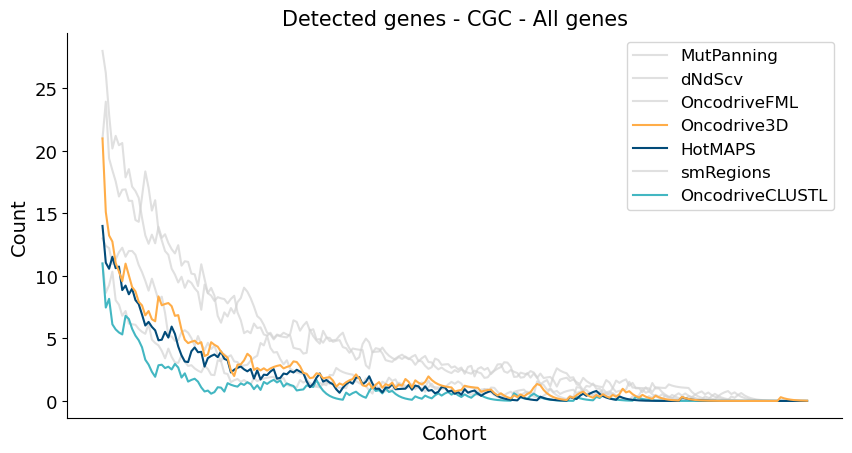

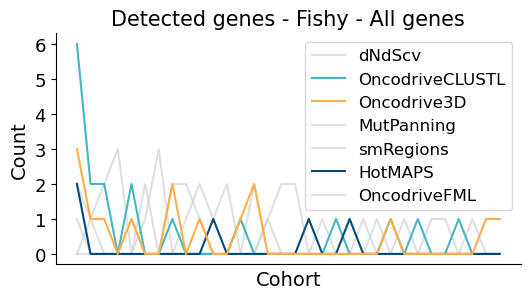

In [170]:
# New NO ICGC

## All cohorts
df = genetable_noicgc.copy()
hits_df = get_hits_summary_lst_cohorts(df, lst_methods, unknown=False, unique=False)

# df = genetable.copy()
# df = df.dropna(subset=[f"{name}_qval" for name in lst_methods])
# hits_df_overlap = get_hits_summary_lst_cohorts(df, lst_methods, unknown=False, unique=False)

# # Not annotated

# cols = [f"{name}_qval" for name in lst_methods]
# plot_hits_summary(hits_df[["Cohort"] + cols], names_dic, colors_dic,
#                   smooth = True, figsize = (10, 5), title = "Detected genes - Not annotated - All genes", 
#                   plot_xticks=False, rm_zero_rows=False, style="-")

# cols = [f"{name}_qval" for name in lst_methods]
# plot_hits_summary(hits_df_overlap[["Cohort"] + cols], names_dic, colors_dic,
#                   smooth = True, figsize = (10, 5), title = "Detected genes - Not annotated - Genes overlap", 
#                   plot_xticks=False, rm_zero_rows=False, style="-")

# CGC

cols = [f"{name}_qval_cgc" for name in lst_methods]
plot_hits_summary(hits_df[["Cohort"] + cols], names_dic, colors_dic,
                  smooth = True, figsize = (10, 5), title = "Detected genes - CGC - All genes", 
                  plot_xticks=False, rm_zero_rows=False, style="-")

# Fish

cols = [f"{name}_qval_fish" for name in lst_methods]
plot_hits_summary(hits_df[["Cohort"] + cols], names_dic, colors_dic,
                  smooth = False, figsize = (6, 3), title = "Detected genes - Fishy - All genes", 
                  plot_xticks=False, rm_zero_rows=True, style="-")

100%|██████████████████████████████████████████████████████████████████████████████████████| 262/262 [02:13<00:00,  1.96it/s]


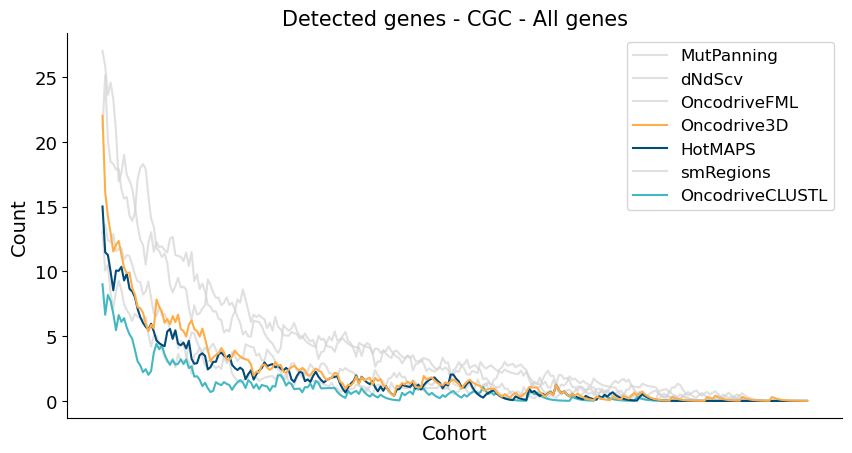

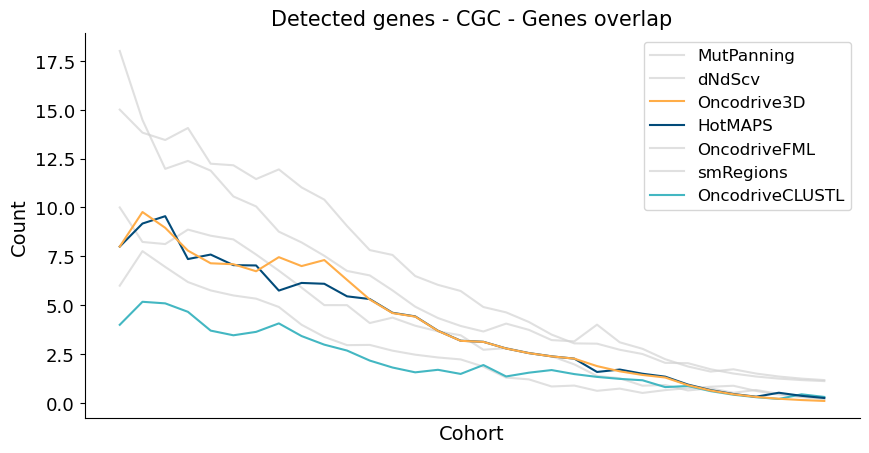

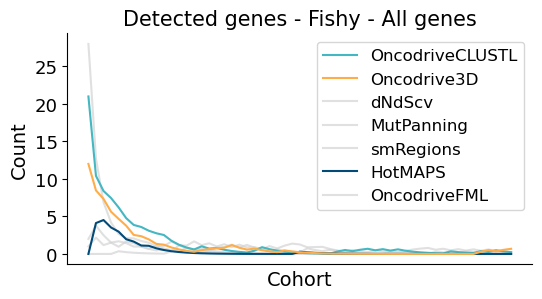

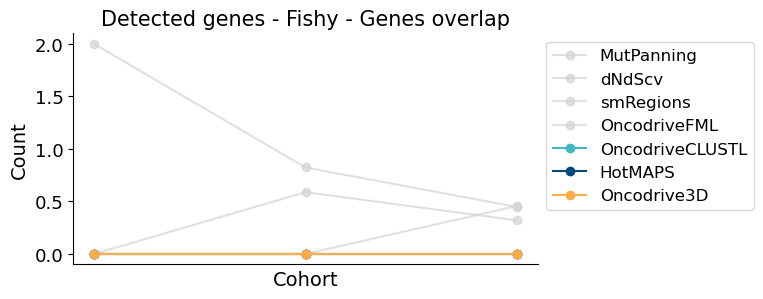

In [171]:
## Old

## All cohorts
df = genetable_old.copy()
hits_df = get_hits_summary_lst_cohorts(df, lst_methods, unknown=False, unique=False)

# df = genetable.copy()
# df = df.dropna(subset=[f"{name}_qval" for name in lst_methods])
# hits_df_overlap = get_hits_summary_lst_cohorts(df, lst_methods, unknown=False, unique=False)

# # Not annotated

# cols = [f"{name}_qval" for name in lst_methods]
# plot_hits_summary(hits_df[["Cohort"] + cols], names_dic, colors_dic,
#                   smooth = True, figsize = (10, 5), title = "Detected genes - Not annotated - All genes", 
#                   plot_xticks=False, rm_zero_rows=False, style="-")

# cols = [f"{name}_qval" for name in lst_methods]
# plot_hits_summary(hits_df_overlap[["Cohort"] + cols], names_dic, colors_dic,
#                   smooth = True, figsize = (10, 5), title = "Detected genes - Not annotated - Genes overlap", 
#                   plot_xticks=False, rm_zero_rows=False, style="-")

# CGC

cols = [f"{name}_qval_cgc" for name in lst_methods]
plot_hits_summary(hits_df[["Cohort"] + cols], names_dic, colors_dic,
                  smooth = True, figsize = (10, 5), title = "Detected genes - CGC - All genes", 
                  plot_xticks=False, rm_zero_rows=False, style="-")


cols = [f"{name}_qval_cgc" for name in lst_methods]
plot_hits_summary(hits_df_overlap[["Cohort"] + cols], names_dic, colors_dic,
                  smooth = True, figsize = (10, 5), title = "Detected genes - CGC - Genes overlap", 
                  plot_xticks=False, rm_zero_rows=False, style="-")

# Fish

cols = [f"{name}_qval_fish" for name in lst_methods]
plot_hits_summary(hits_df[["Cohort"] + cols], names_dic, colors_dic,
                  smooth = True, figsize = (6, 3), title = "Detected genes - Fishy - All genes", 
                  plot_xticks=False, rm_zero_rows=True, style="-")

cols = [f"{name}_qval_fish" for name in lst_methods]
plot_hits_summary(hits_df_overlap[["Cohort"] + cols], names_dic, colors_dic,
                  smooth = True, figsize = (6, 3), title = "Detected genes - Fishy - Genes overlap", 
                  plot_xticks=False, rm_zero_rows=True, style="o-")

In [172]:
## Old

## All cohorts
df = genetable_old_noicgc.copy()
hits_df = get_hits_summary_lst_cohorts(df, lst_methods, unknown=False, unique=False)

# df = genetable.copy()
# df = df.dropna(subset=[f"{name}_qval" for name in lst_methods])
# hits_df_overlap = get_hits_summary_lst_cohorts(df, lst_methods, unknown=False, unique=False)

# # Not annotated

# cols = [f"{name}_qval" for name in lst_methods]
# plot_hits_summary(hits_df[["Cohort"] + cols], names_dic, colors_dic,
#                   smooth = True, figsize = (10, 5), title = "Detected genes - Not annotated - All genes", 
#                   plot_xticks=False, rm_zero_rows=False, style="-")

# cols = [f"{name}_qval" for name in lst_methods]
# plot_hits_summary(hits_df_overlap[["Cohort"] + cols], names_dic, colors_dic,
#                   smooth = True, figsize = (10, 5), title = "Detected genes - Not annotated - Genes overlap", 
#                   plot_xticks=False, rm_zero_rows=False, style="-")

# CGC

cols = [f"{name}_qval_cgc" for name in lst_methods]
plot_hits_summary(hits_df[["Cohort"] + cols], names_dic, colors_dic,
                  smooth = True, figsize = (10, 5), title = "Detected genes - CGC - All genes", 
                  plot_xticks=False, rm_zero_rows=False, style="-")


cols = [f"{name}_qval_cgc" for name in lst_methods]
plot_hits_summary(hits_df_overlap[["Cohort"] + cols], names_dic, colors_dic,
                  smooth = True, figsize = (10, 5), title = "Detected genes - CGC - Genes overlap", 
                  plot_xticks=False, rm_zero_rows=False, style="-")

# Fish

cols = [f"{name}_qval_fish" for name in lst_methods]
plot_hits_summary(hits_df[["Cohort"] + cols], names_dic, colors_dic,
                  smooth = True, figsize = (6, 3), title = "Detected genes - Fishy - All genes", 
                  plot_xticks=False, rm_zero_rows=True, style="-")

cols = [f"{name}_qval_fish" for name in lst_methods]
plot_hits_summary(hits_df_overlap[["Cohort"] + cols], names_dic, colors_dic,
                  smooth = True, figsize = (6, 3), title = "Detected genes - Fishy - Genes overlap", 
                  plot_xticks=False, rm_zero_rows=True, style="o-")

NameError: name 'genetable_old_noicgc' is not defined

# CH

In [287]:
genetables_path = "/workspace/projects/clustering_3d/evaluation/genetables_dir/run_20230512_ch/OTHER_WXS_CH_IMPACT_PANEL.genetable.tsv"
df = pd.read_csv(genetables_path, sep="\t")
df = df.rename(columns={"3dclust_pval" : "o3d_pval",
                       "3dclust_qval" : "o3d_qval",
                       "3dclust_rank" : "o3d_rank",
                       "Fishy_Genes" : "Fish"})
df["Cohort"] = "OTHER_WXS_CH_IMPACT_PANEL"
df = df.drop(columns=["CGC"]).rename(columns={"CH" : "CGC"})
df

o3d_rank          Gene Uniprot_ID  3d_status  CGC  Fish Cancer  \
0           0.0        DNMT3A     Q9Y6K1  Processed    1     0     CH   
1           1.0         SF3B1     O75533  Processed    1     0     CH   
2           2.0          JAK2     O60674  Processed    1     0     CH   
3           3.0          GNAS     Q5JWF2  Processed    1     0     CH   
4           4.0         SRSF2     Q01130  Processed    1     0     CH   
...         ...           ...        ...        ...  ...   ...    ...   
20760       NaN       TMEM247        NaN        NaN    0     0    NaN   
20761       NaN         TTLL8        NaN        NaN    0     1    NaN   
20762       NaN        TXNRD3        NaN        NaN    0     0    NaN   
20763       NaN      USP17L23        NaN        NaN    0     0    NaN   
20764       NaN  ZNF511-PRAP1        NaN        NaN    0     0    NaN   

       o3d_pval  o3d_qval  cbase_rank  ...  clustl_rank   clustl_pval  \
0           0.0       0.0         2.0  ...          1.0  1.110223e-19   
1           0.0       0.0        19.0  ...          4.0  1.110223e-19   
2           0.0       0.0         6.0  ...          0.0  1.110223e-19   
3           0.0       0.0        20.0  ...          8.0  7.817272e-10   
4           0.0       0.0        13.0  ...          2.0  1.110223e-19   
...         ...       ...         ...  ...          ...           ...   
20760       NaN       NaN         NaN  ...      17006.0           NaN   
20761       NaN       NaN         NaN  ...      17655.0           NaN   
20762       NaN       NaN         NaN  ...      17738.0           NaN   
20763       NaN       NaN         NaN  ...      18012.0           NaN   
20764       NaN       NaN         NaN  ...      18963.0           NaN   

        clustl_qval  fml_rank  fml_pval  fml_qval  smreg_rank    smreg_pval  \
0      3.264056e-18       0.0  0.000001  0.000028         0.0  6.513607e-94   
1      3.264056e-18      18.0  0.000075  0.001642         NaN           NaN   
2      3.264056e-18       9.0  0.000001  0.000028         2.0  5.310583e-42   
3      1.276821e-08      13.0  0.000001  0.000028         3.0  3.561379e-25   
4      3.264056e-18      10.0  0.000001  0.000028         NaN           NaN   
...             ...       ...       ...       ...         ...           ...   
20760           NaN       NaN       NaN       NaN         NaN           NaN   
20761           NaN       NaN       NaN       NaN         NaN           NaN   
20762           NaN       NaN       NaN       NaN         NaN           NaN   
20763           NaN       NaN       NaN       NaN         NaN           NaN   
20764           NaN       NaN       NaN       NaN         NaN           NaN   

         smreg_qval                     Cohort  
0      3.302399e-91  OTHER_WXS_CH_IMPACT_PANEL  
1               NaN  OTHER_WXS_CH_IMPACT_PANEL  
2      8.974885e-40  OTHER_WXS_CH_IMPACT_PANEL  
3      4.514048e-23  OTHER_WXS_CH_IMPACT_PANEL  
4               NaN  OTHER_WXS_CH_IMPACT_PANEL  
...             ...                        ...  
20760           NaN  OTHER_WXS_CH_IMPACT_PANEL  
20761           NaN  OTHER_WXS_CH_IMPACT_PANEL  
20762           NaN  OTHER_WXS_CH_IMPACT_PANEL  
20763           NaN  OTHER_WXS_CH_IMPACT_PANEL  
20764           NaN  OTHER_WXS_CH_IMPACT_PANEL  

[20765 rows x 31 columns]

In [288]:
lst_methods.remove("seismic")
lst_methods.remove("mutpan")

In [290]:
df

o3d_rank          Gene Uniprot_ID  3d_status  CGC  Fish Cancer  \
0           0.0        DNMT3A     Q9Y6K1  Processed    1     0     CH   
1           1.0         SF3B1     O75533  Processed    1     0     CH   
2           2.0          JAK2     O60674  Processed    1     0     CH   
3           3.0          GNAS     Q5JWF2  Processed    1     0     CH   
4           4.0         SRSF2     Q01130  Processed    1     0     CH   
...         ...           ...        ...        ...  ...   ...    ...   
20760       NaN       TMEM247        NaN        NaN    0     0    NaN   
20761       NaN         TTLL8        NaN        NaN    0     1    NaN   
20762       NaN        TXNRD3        NaN        NaN    0     0    NaN   
20763       NaN      USP17L23        NaN        NaN    0     0    NaN   
20764       NaN  ZNF511-PRAP1        NaN        NaN    0     0    NaN   

       o3d_pval  o3d_qval  cbase_rank  ...  clustl_rank   clustl_pval  \
0           0.0       0.0         2.0  ...          1.0  1.110223e-19   
1           0.0       0.0        19.0  ...          4.0  1.110223e-19   
2           0.0       0.0         6.0  ...          0.0  1.110223e-19   
3           0.0       0.0        20.0  ...          8.0  7.817272e-10   
4           0.0       0.0        13.0  ...          2.0  1.110223e-19   
...         ...       ...         ...  ...          ...           ...   
20760       NaN       NaN         NaN  ...      17006.0           NaN   
20761       NaN       NaN         NaN  ...      17655.0           NaN   
20762       NaN       NaN         NaN  ...      17738.0           NaN   
20763       NaN       NaN         NaN  ...      18012.0           NaN   
20764       NaN       NaN         NaN  ...      18963.0           NaN   

        clustl_qval  fml_rank  fml_pval  fml_qval  smreg_rank    smreg_pval  \
0      3.264056e-18       0.0  0.000001  0.000028         0.0  6.513607e-94   
1      3.264056e-18      18.0  0.000075  0.001642         NaN           NaN   
2      3.264056e-18       9.0  0.000001  0.000028         2.0  5.310583e-42   
3      1.276821e-08      13.0  0.000001  0.000028         3.0  3.561379e-25   
4      3.264056e-18      10.0  0.000001  0.000028         NaN           NaN   
...             ...       ...       ...       ...         ...           ...   
20760           NaN       NaN       NaN       NaN         NaN           NaN   
20761           NaN       NaN       NaN       NaN         NaN           NaN   
20762           NaN       NaN       NaN       NaN         NaN           NaN   
20763           NaN       NaN       NaN       NaN         NaN           NaN   
20764           NaN       NaN       NaN       NaN         NaN           NaN   

         smreg_qval                     Cohort  
0      3.302399e-91  OTHER_WXS_CH_IMPACT_PANEL  
1               NaN  OTHER_WXS_CH_IMPACT_PANEL  
2      8.974885e-40  OTHER_WXS_CH_IMPACT_PANEL  
3      4.514048e-23  OTHER_WXS_CH_IMPACT_PANEL  
4               NaN  OTHER_WXS_CH_IMPACT_PANEL  
...             ...                        ...  
20760           NaN  OTHER_WXS_CH_IMPACT_PANEL  
20761           NaN  OTHER_WXS_CH_IMPACT_PANEL  
20762           NaN  OTHER_WXS_CH_IMPACT_PANEL  
20763           NaN  OTHER_WXS_CH_IMPACT_PANEL  
20764           NaN  OTHER_WXS_CH_IMPACT_PANEL  

[20765 rows x 31 columns]

In [291]:
plot_hits_barplot(df, lst_methods, names_dic, title="Detected CH genes-cohorts - OTHER_WXS_CH_IMPACT_PANEL\n", filename="hits_stacked_barplot_ch")